# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [140]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [141]:
data.head(15)

ID Subject school sex  age address famsize Pstatus Medu Fedu  \
0   100097     Por     GP   F   16       U     GT3       A    3    4   
1   101021     Por     GP   F   17       U     GT3       T    3    2   
2   102965     Por     GP   M   16       U     LE3       T    1    2   
3   102989     Por     MS   M   17       U     GT3       T    2    3   
4   103131     Por     GP   F   16       U     GT3       T    1    1   
5   103144     Por     GP   M   18       U     LE3       T    3    1   
6   105257     Por     MS   F   18       U     GT3       T    1    1   
7   107639     Por     MS   F   15       R     GT3       T    4    4   
8   107914    Math     GP   F   15       U     LE3       T    3    2   
9   108089     Por     MS   M   16       R     GT3       T    3    4   
10  108254     Por     GP   M   15       U     LE3       T    4    4   
11  108296     Por     GP   M   18       U     LE3       T    3    4   
12  108753    Math     MS   F   18       R     GT3       T    4    4   
13  108825     Por     GP   M   15       U     GT3       T    4    3   
14  114462    Math     GP   F   16       U     LE3       T    2    2   

        Mjob      Fjob      reason guardian  traveltime  studytime  failures  \
0   services     other      course   father           1          1         0   
1      other     other      course   mother           1          2         0   
2     health  services      course   mother           2          1         2   
3      other  services        home   father           2          2         0   
4    at_home     other        home   mother           2          1         0   
5   services  services      course   mother           2          1         0   
6      other     other      course   mother           2          2         0   
7    teacher     other      course   mother           2          1         0   
8   services     other  reputation   mother           1          2         0   
9      other    health       other   mother           3          2         0   
10    health  services      course   father           1          1         0   
11  services     other        home   mother           1          2         0   
12   teacher   at-home  reputation   mother           3          1         0   
13   teacher     other        home   mother           1          2         0   
14   at_home     other      course   mother           1          2         0   

   schoolsup famsup paid activities nursery higher internet romantic  famrel  \
0         no     no   no         no     yes    yes      yes       no     3.0   
1         no     no   no        yes      no    yes      yes       no     5.0   
2         no     no   no         no      no    yes      yes       no     4.0   
3         no     no   no        yes     yes    yes      yes       no     4.0   
4         no    yes   no         no     yes    yes       no      NaN     4.0   
5         no     no   no        yes     yes    yes      yes      yes     3.0   
6         no     no   no        yes     yes    yes       no       no     1.0   
7         no     no   no         no     yes    yes      yes      yes     1.0   
8         no    yes  yes         no     yes    yes      yes       no     4.0   
9         no     no   no         no      no    yes       no       no     3.0   
10        no    yes   no        yes     yes    yes      yes       no     4.0   
11        no     no   no        yes     yes    yes      yes      yes     4.0   
12        no    yes  yes        yes     yes    yes      yes      yes     4.0   
13        no    yes   no        yes     yes    yes      yes       no     4.0   
14        no    yes   no         no     yes    yes       no       no     4.0   

    freetime  goout  Dalc  Walc  health  absences cheating  G1  G2  G3  
0          2      1   1.0   4.0       5        12      NaN  15  13  14  
1          3      4   1.0   3.0       3         2      NaN  17  18  17  
2          4      5   3.0   5.0       5         0      yes   9   8  10  
3

### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [142]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

Признак  \
0           ID   
1      Subject   
2       school   
3          sex   
4          age   
5      address   
6      famsize   
7      Pstatus   
8         Medu   
9         Fedu   
10        Mjob   
11        Fjob   
12      reason   
13    guardian   
14  traveltime   
15   studytime   
16    failures   
17   schoolsup   
18      famsup   
19        paid   
20  activities   
21     nursery   
22      higher   
23    internet   
24    romantic   
25      famrel   
26    freetime   
27       goout   
28        Dalc   
29        Walc   
30      health   
31    absences   
32    cheating   
33          G1   
34          G2   
35          G3   

                                                                                                                                                                              Описание  
0                                                                                                                                                          Уникальный номер наблюдения  
1                                                                                                                             Предмет: 'Math' - математика, 'Por' - португальский язык  
2                                                                                                                           Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira  
3                                                                                                                                           Пол студента: 'F' - женский, 'M' - мужской  
4                                                                                                                                                                     Возраст студента  
5                                                                                                                          Место проживания студента: 'U' - в городе, 'R' - за городом  
6                                                                                                                              Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3  
7                                                                                                                       Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно  
8                                                 Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование  
9                                                   Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование  
10  Работа матери: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое  
11    Работа отца: 'teacher' - связана с преподаванием, 'health'  - связана с здравоохранением, 'services' - администрация и полиция, 'at_home' - домашняя занятость, 'other' - другое  
12                                Причина, по которой студент выбрал данную школу: 'home' - рядом с домом, 'reputation' - репутация школы, 'course' - читаемые курсы, 'other' - другое  
13                                                                                                                Опекун студента (student's guardian): 'mother', 'father' или 'other'  
14                                                                             Время в пути от дома до школы: 1 - < 15 мин, 2 - от 15 до 30 мин, 3 - от 30 мин до 1 часа, 4 - > 1 часа  
15                                                                        Количество часов на учебу в неделю: 1 - < 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, 4 - > 10 часов  
16                                                                                                                Число завалов студента по предыдущим курсам:  n если 1<=n<3, иначе 4  
17        

## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

Посмотрим уникальные

In [143]:
for column in data.columns:
    print(column, data[column].unique())

ID [100097 101021 102965 ... 998425 999143 999194]
Subject ['Por' 'Math']
school ['GP' 'MS']
sex ['F' 'M' 'm']
age [16 17 18 15 19 21 20 22]
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T' 't']
Medu ['3' '1' '2' '4' '0' 'o']
Fedu ['4' '2' '3' '1' 'o' '0']
Mjob ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason ['course' 'home' 'reputation' 'other']
guardian ['father' 'mother' 'other' 'futher']
traveltime [1 2 3 4]
studytime [1 2 4 3]
failures [0 2 1 3]
schoolsup ['no' 'yes']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['yes' 'no']
romantic ['no' nan 'yes']
famrel [ 3.  5.  4.  1.  2. nan]
freetime [2 3 4 1 5]
goout [1 4 5 3 2]
Dalc [ 1.  3.  4.  2.  5. nan]
Walc [ 4.  3.  5.  1.  2. nan]
health [5 3 4 2 1]
absences [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 22  9  3 15 26 25 54
 56 40 19 13 38 30 17 28 32 23 75]
cheating 

Исправим ошибки

In [144]:
data.loc[data['sex']=='m', 'sex'] = 'M'
data.loc[data['Pstatus']=='t', 'Pstatus'] = 'T'
data.loc[data['Medu'] == 'o','Medu'] = '0'
data.loc[data['Fedu'] == 'o','Fedu'] = '0'
data['Medu'] = data['Medu'].astype('int')
data['Fedu'] = data['Fedu'].astype('int')
data.loc[data['Mjob'] == 'at-home','Mjob'] = 'at_home'
data.loc[data['Fjob'] == 'at-home','Fjob'] = 'at_home'
data.loc[data['guardian'] == 'futher','guardian'] = 'father'
data.loc[~data['failures'].isin([0, 1, 2, 4]), 'failures'] = 4
data['schoolsup'].replace({'yes': True, 'no': False}, inplace = True)
data['famsup'].replace({'yes': True, 'no': False}, inplace = True)
data['paid'].replace({'yes': True, 'no': False}, inplace = True)
data['activities'].replace({'yes': True, 'no': False}, inplace = True)
data['nursery'].replace({'yes': True, 'no': False}, inplace = True)
data['higher'].replace({'yes': True, 'no': False}, inplace = True)
data['internet'].replace({'yes': True, 'no': False}, inplace = True)

In [145]:
data.dropna(subset=['romantic', 'famrel','Dalc','Walc'], inplace = True) # дроп строк, где пропущены значения (в общем 40 строк)
data.drop(columns = 'cheating', inplace = True) # дроп признака cheating - мало данных известно
data.drop(columns = ['ID', 'G2'], inplace = True) # дроп неинформативного признака ID и запрещенного признака G2

Объединим количество выпиваемого алкоголя в 1 признак и оставим только общий признак

In [146]:
data['Ualc'] = data['Dalc'] + data ['Walc']
data.drop(columns = ['Dalc', 'Walc'], inplace = True)

In [147]:
display(data.info())
display(data['G3'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1042
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject     1004 non-null   object 
 1   school      1004 non-null   object 
 2   sex         1004 non-null   object 
 3   age         1004 non-null   int64  
 4   address     1004 non-null   object 
 5   famsize     1004 non-null   object 
 6   Pstatus     1004 non-null   object 
 7   Medu        1004 non-null   int64  
 8   Fedu        1004 non-null   int64  
 9   Mjob        1004 non-null   object 
 10  Fjob        1004 non-null   object 
 11  reason      1004 non-null   object 
 12  guardian    1004 non-null   object 
 13  traveltime  1004 non-null   int64  
 14  studytime   1004 non-null   int64  
 15  failures    1004 non-null   int64  
 16  schoolsup   1004 non-null   bool   
 17  famsup      1004 non-null   bool   
 18  paid        1004 non-null   bool   
 19  activities  1004 non-null  

None

10    147
11    143
13    108
12    100
14     86
15     77
8      65
9      62
0      51
16     50
17     35
18     26
7      19
6      18
5       8
19      6
4       1
1       1
20      1
Name: G3, dtype: int64

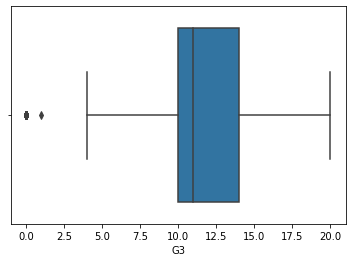

In [148]:
from seaborn import boxplot
boxplot(data['G3'])

Произведем encoding и рассмотрим корреляции между признаками и G3

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return (res) 

le = LabelEncoder()

In [151]:
cat = ['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','romantic']
for col in cat:
    data = encode_and_bind(data, col)

data['Subject'] = le.fit_transform(data['Subject'])

Для регрессий

In [152]:
#Для линейной регрессии лучше убрать выбросы, которыми у нас яыляются значения 0,1,4,20, 19
regData = data[~data['G3'].isin([0,1,4,20, 19])].copy()
regDataG3 = regData.G3
regData.drop(columns = 'G3', inplace = True)

In [153]:
correlations = []
for column in regData:
    correlations.append([column, regData[column].corr(regDataG3)])   
sorted(correlations, key = lambda x: abs(x[1]), reverse = True)

[['G1', 0.8754180170215391],
 ['failures', -0.32350663529810014],
 ['higher', 0.25094282872050927],
 ['Medu', 0.21972125870553932],
 ['absences', -0.21704223155833632],
 ['Ualc', -0.183382143599824],
 ['studytime', 0.18249003476285683],
 ['Fedu', 0.17890073059304828],
 ['schoolsup', -0.1583490539547632],
 ['Fjob_teacher', 0.1480542101503269],
 ['school_GP', 0.14804303343739383],
 ['school_MS', -0.14804303343739383],
 ['reason_reputation', 0.13061316032577525],
 ['Subject', 0.12516513535108056],
 ['Mjob_at_home', -0.12329157018336714],
 ['internet', 0.1206123688294044],
 ['address_R', -0.11886303742252363],
 ['address_U', 0.11886303742252363],
 ['goout', -0.11687722267586019],
 ['traveltime', -0.111958488991919],
 ['Mjob_health', 0.10941262338732569],
 ['Mjob_teacher', 0.10009525974170344],
 ['reason_course', -0.09915746736204607],
 ['paid', -0.08840254095570477],
 ['guardian_other', -0.07909124192129095],
 ['health', -0.07700189010948684],
 ['age', -0.07530541949607451],
 ['freetime', 

Видим, что признак G3 сильно связан с признаком G1. Остальные слабо коррелируют с G3. Оставим только те признаки, которые коррелируют по модулю >= .12

In [154]:
regData = regData[[x[0] for x in correlations if abs(x[1]) > .12]]

In [156]:
regData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 1042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Subject            944 non-null    int64  
 1   Medu               944 non-null    int64  
 2   Fedu               944 non-null    int64  
 3   studytime          944 non-null    int64  
 4   failures           944 non-null    int64  
 5   schoolsup          944 non-null    bool   
 6   higher             944 non-null    bool   
 7   internet           944 non-null    bool   
 8   absences           944 non-null    int64  
 9   G1                 944 non-null    int64  
 10  Ualc               944 non-null    float64
 11  school_GP          944 non-null    uint8  
 12  school_MS          944 non-null    uint8  
 13  Mjob_at_home       944 non-null    uint8  
 14  Fjob_teacher       944 non-null    uint8  
 15  reason_reputation  944 non-null    uint8  
dtypes: bool(3), float64(1), i

In [159]:
regData

Subject  Medu  Fedu  studytime  failures  schoolsup  higher  internet  \
0           1     3     4          1         0      False    True      True   
1           1     3     2          2         0      False    True      True   
2           1     1     2          1         2      False    True      True   
3           1     2     3          2         0      False    True      True   
5           1     3     1          1         0      False    True      True   
...       ...   ...   ...        ...       ...        ...     ...       ...   
1037        1     3     3          2         0      False    True      True   
1038        1     2     2          2         0      False    True      True   
1039        0     3     3          3         2      False    True      True   
1040        1     2     1          2         0      False    True      True   
1042        1     2     1          1         0      False    True     False   

      absences  G1  Ualc  school_GP  school_MS  Mjob_at_home  Fjob_teacher  \
0           12  15   5.0          1          0             0             0   
1            2  17   4.0          1          0             0             0   
2            0   9   8.0          1          0             0             0   
3            4  14   2.0          0          1             0             0   
5            2  11   9.0          1          0             0             0   
...        ...  ..   ...        ...        ...           ...           ...   
1037         4  13   2.0          0          1             0             0   
1038         0  13   2.0          1          0             0             0   
1039         8  10   5.0          1          0             0             0   
1040         4  10   2.0          1          0             0             0   
1042         4   9   2.0          1          0             1             0   

      reason_reputation  
0                     0  
1                     0  
2                     0  
3                     0  
5                     0  
...                 ...  
1037                  1  
1038                  0  
1039                  1  
1040                  1  
1042                  0  

[944 rows x 16 columns]

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
regData.loc[:,['failures','Medu','Fedu','studytime','absences','G1','Ualc']] = scaler.fit_transform(regData.loc[:,['failures','Medu','Fedu','studytime','absences','G1','Ualc']])

In [166]:
regData

Subject      Medu      Fedu  studytime  failures  schoolsup  higher  \
0           1  0.345888  1.460117  -1.166426 -0.346919      False    True   
1           1  0.345888 -0.364305   0.029129 -0.346919      False    True   
2           1 -1.438363 -0.364305  -1.166426  2.382180      False    True   
3           1 -0.546238  0.547906   0.029129 -0.346919      False    True   
5           1  0.345888 -1.276516  -1.166426 -0.346919      False    True   
...       ...       ...       ...        ...       ...        ...     ...   
1037        1  0.345888  0.547906   0.029129 -0.346919      False    True   
1038        1 -0.546238 -0.364305   0.029129 -0.346919      False    True   
1039        0  0.345888  0.547906   1.224684  2.382180      False    True   
1040        1 -0.546238 -1.276516   0.029129 -0.346919      False    True   
1042        1 -0.546238 -1.276516  -1.166426 -0.346919      False    True   

      internet  absences        G1      Ualc  school_GP  school_MS  \
0         True  1.154903  1.275834  0.601301          1          0   
1         True -0.428811  1.976262  0.101628          1          0   
2         True -0.745553 -0.825452  2.100319          1          0   
3         True -0.112068  0.925619 -0.897717          0          1   
5         True -0.428811 -0.125024  2.599992          1          0   
...        ...       ...       ...       ...        ...        ...   
1037      True -0.112068  0.575405 -0.897717          0          1   
1038      True -0.745553  0.575405 -0.897717          1          0   
1039      True  0.521418 -0.475238  0.601301          1          0   
1040      True -0.112068 -0.475238 -0.897717          1          0   
1042     False -0.112068 -0.825452 -0.897717          1          0   

      Mjob_at_home  Fjob_teacher  reason_reputation  
0                0             0                  0  
1                0             0                  0  
2                0             0                  0  
3                0             0                  0  
5                0             0                  0  
...            ...           ...                ...  
1037             0             0                  1  
1038             0             0                  0  
1039             0             0                  1  
1040             0             0                  1  
1042             1             0                  0  

[944 rows x 16 columns]

Для остальных методов

In [167]:
G3 = data.G3 
data.drop(columns = 'G3', inplace = True)

correlations = []
for column in data:
    correlations.append([column, data[column].corr(G3)])   
sorted(correlations, key = lambda x: abs(x[1]), reverse = True)

[['G1', 0.8076097968263931],
 ['failures', -0.36329640450576184],
 ['higher', 0.23153453764000498],
 ['Medu', 0.20781391625940507],
 ['Subject', 0.19442543754880548],
 ['Fedu', 0.16477613382008788],
 ['studytime', 0.1587754372283737],
 ['Ualc', -0.12909727178645086],
 ['reason_reputation', 0.12330472108929658],
 ['age', -0.11797584913846447],
 ['school_GP', 0.11634447943901252],
 ['school_MS', -0.11634447943901252],
 ['internet', 0.11493652630010179],
 ['address_R', -0.11285241158215013],
 ['address_U', 0.11285241158215013],
 ['traveltime', -0.11251883479615843],
 ['Mjob_at_home', -0.1112116173946048],
 ['Mjob_health', 0.10483516548284588],
 ['romantic_no', 0.10257371537511924],
 ['romantic_yes', -0.10257371537511924],
 ['Fjob_teacher', 0.1017177760465127],
 ['Mjob_teacher', 0.09337591165040414],
 ['goout', -0.09276975039606328],
 ['guardian_other', -0.08544663898183566],
 ['reason_course', -0.08510686198045787],
 ['Mjob_other', -0.07273985567491294],
 ['health', -0.07005432311570207],

Видим, что признак G3 сильно связан с признаком G1. Остальные слабо коррелируют с G3. Оставим только те признаки, которые коррелируют по модулю >= .11

In [168]:
data = data[[x[0] for x in correlations if abs(x[1]) > .11]]

Нормализуем данные

In [171]:
data.loc[:,['failures','Medu','Fedu','studytime', 'G1', 'Ualc', 'traveltime','age']] = scaler.fit_transform(data.loc[:,['failures','Medu','Fedu','studytime', 'G1', 'Ualc', 'traveltime','age']])

In [172]:
data

Subject       age      Medu      Fedu  traveltime  studytime  failures  \
0           1 -0.597432  0.354688  1.467840   -0.712769  -1.156950 -0.373205   
1           1  0.208780  0.354688 -0.354932   -0.712769   0.031973 -0.373205   
2           1 -0.597432 -1.430307 -0.354932    0.647725  -1.156950  2.167120   
3           1  0.208780 -0.537810  0.556454    0.647725   0.031973 -0.373205   
5           1  1.014992  0.354688 -1.266319    0.647725  -1.156950 -0.373205   
...       ...       ...       ...       ...         ...        ...       ...   
1037        1 -1.403643  0.354688  0.556454   -0.712769   0.031973 -0.373205   
1038        1 -0.597432 -0.537810 -0.354932   -0.712769   0.031973 -0.373205   
1039        0 -1.403643  0.354688  0.556454    0.647725   1.220897  2.167120   
1040        1 -1.403643 -0.537810 -1.266319   -0.712769   0.031973 -0.373205   
1042        1 -0.597432 -0.537810 -1.266319    3.368712  -1.156950 -0.373205   

      higher  internet        G1      Ualc  school_GP  school_MS  address_R  \
0       True      True  1.272141  0.608972          1          0          0   
1       True      True  1.941548  0.107818          1          0          0   
2       True      True -0.736081  2.112433          1          0          0   
3       True      True  0.937437 -0.894490          0          1          0   
5       True      True -0.066674  2.613587          1          0          0   
...      ...       ...       ...       ...        ...        ...        ...   
1037    True      True  0.602733 -0.894490          0          1          1   
1038    True      True  0.602733 -0.894490          1          0          0   
1039    True      True -0.401378  0.608972          1          0          1   
1040    True      True -0.401378 -0.894490          1          0          1   
1042    True     False -0.736081 -0.894490          1          0          0   

      address_U  Mjob_at_home  reason_reputation  
0             1             0                  0  
1             1             0                  0  
2             1             0                  0  
3             1             0                  0  
5             1             0                  0  
...         ...           ...                ...  
1037          0             0                  1  
1038          1             0                  0  
1039          0             0                  1  
1040          0             0                  1  
1042          1             1                  0  

[1004 rows x 17 columns]

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

Линейная регрессия + регуляризации

In [173]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [174]:
def regression_plotter(mse, rmse, mae, det, d, y_test, y_predicted, coefList):
    f, ax = plt.subplots(figsize=[40,10])
    ax.plot(y_predicted[:100], 'r-', label='Predicted')
    ax.plot(y_test.values[:100], 'b-', label='Correct')
    ax.set_xlabel("Observations")
    ax.set_ylabel("Scores")
    ax.legend()
    
    
    for i, x in enumerate(d):
        print(i,":",x)
    
    w = sum(x[0] for x in d)
    r = sum(x[1] for x in d)
    
    if len(coefList):
        f, ax = plt.subplots(figsize=[20,10])
        ax.set_xlabel("Features")
        ax.set_ylabel("Weights")
        for x in coefList:
            ax.scatter(x[0], x[1])
    
    
    print ("wrong:", w)
    print ("right:", r)
    print ("cf:", r/(w+r) * 100, "%")
    print ("Metrics:")
    print ("Среднеквадратичная ошибка:", mse)
    print ("Корень среднеквадратичной ошибки:", rmse)
    print ("Средняя абсолютная ошибка:", mae)
    print ("Кф детерминации:", det)

# Linear Regression

In [175]:
def linear_regression(df, var, num_shuffles):
    mse  = 0
    rmse = 0
    mae  = 0
    det  = 0
    for i in range (num_shuffles):       
        x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)
        
        model = LinearRegression()
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        tmpmse= metrics.mean_squared_error(y_pred=y_predicted, y_true=y_test)
        mse += tmpmse
        rmse+= np.sqrt(tmpmse)
        mae+= metrics.mean_absolute_error(y_pred=y_predicted, y_true=y_test)
        det+= metrics.r2_score(y_pred=y_predicted, y_true=y_test) 
        
    d = [[0,0] for x in range(21)]
    for x, y in zip(y_predicted, y_test):
        d[y][int(round(x) == y)] += 1
        
    mse /= num_shuffles
    rmse /= num_shuffles
    mae /= num_shuffles
    det /= num_shuffles
    
    coefList = []
    for cf, col in zip(model.coef_, df.columns):
        coefList.append([col, cf])
        
   
    return mse, rmse, mae, det, d, y_test, y_predicted, coefList

C G1

0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [3, 1]
6 : [5, 1]
7 : [7, 0]
8 : [13, 6]
9 : [14, 9]
10 : [29, 12]
11 : [36, 8]
12 : [18, 7]
13 : [15, 15]
14 : [22, 5]
15 : [11, 13]
16 : [11, 3]
17 : [8, 2]
18 : [6, 4]
19 : [0, 0]
20 : [0, 0]
wrong: 198
right: 86
cf: 30.28169014084507 %
Metrics:
Среднеквадратичная ошибка: 1.7805705657112667
Корень среднеквадратичной ошибки: 1.3330283691132006
Средняя абсолютная ошибка: 1.0483410591625748
Кф детерминации: 0.7795797345354355


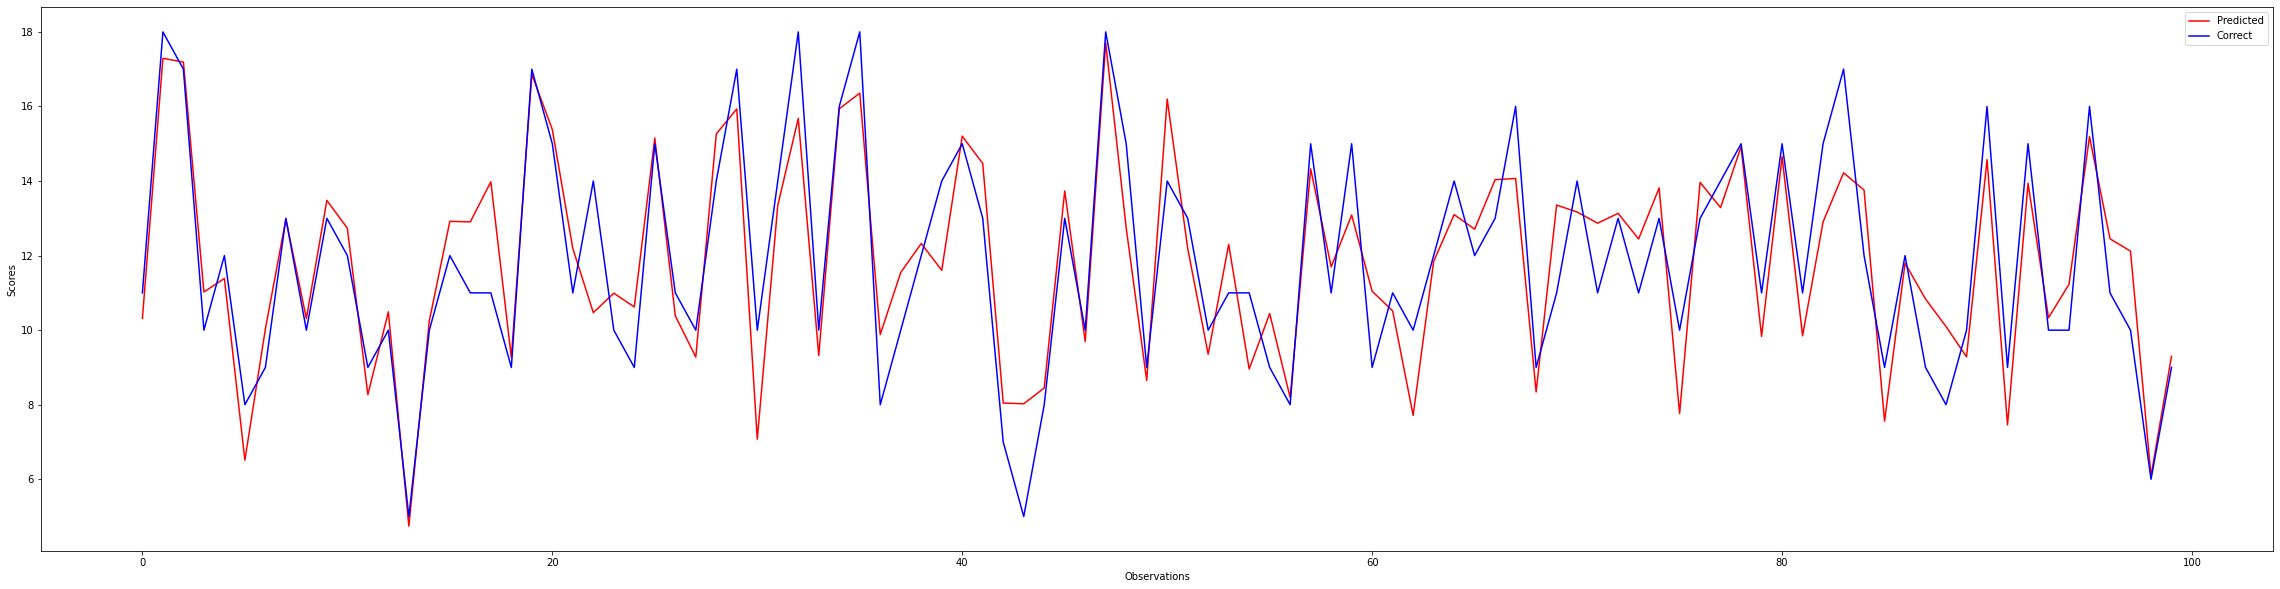

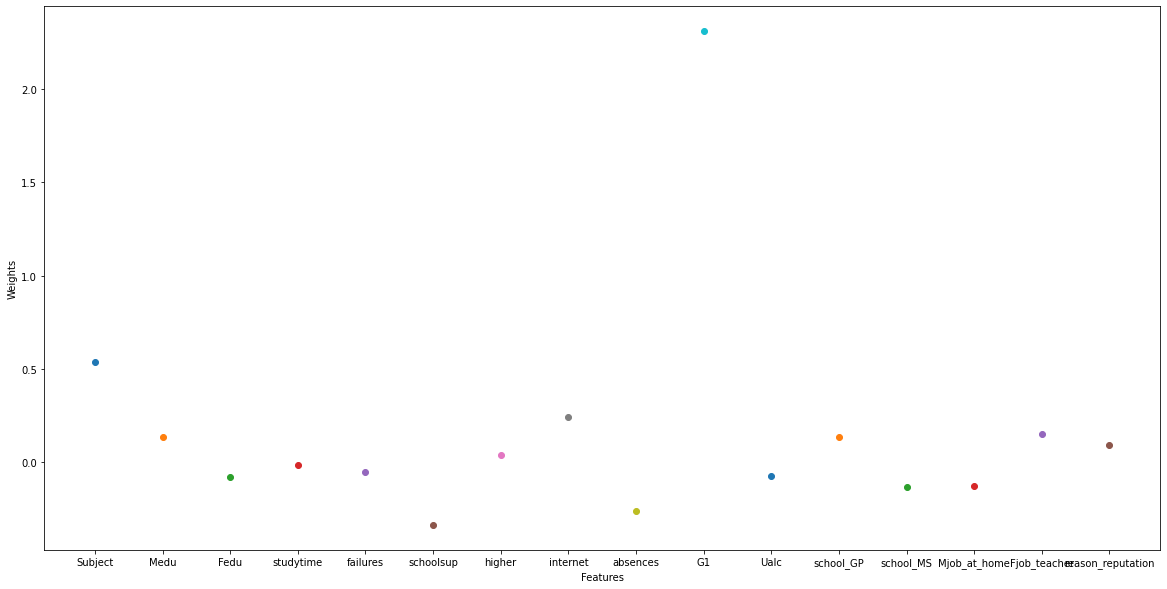

In [176]:
regression_plotter(*linear_regression(regData, regDataG3, 10))

Без G1

0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [3, 0]
6 : [5, 0]
7 : [4, 1]
8 : [15, 0]
9 : [17, 1]
10 : [50, 10]
11 : [37, 9]
12 : [26, 9]
13 : [24, 7]
14 : [13, 4]
15 : [18, 3]
16 : [9, 0]
17 : [9, 0]
18 : [10, 0]
19 : [0, 0]
20 : [0, 0]
wrong: 240
right: 44
cf: 15.492957746478872 %
Metrics:
Среднеквадратичная ошибка: 6.053605860328881
Корень среднеквадратичной ошибки: 2.4591624926493587
Средняя абсолютная ошибка: 1.9670749356777666
Кф детерминации: 0.23054505455871643


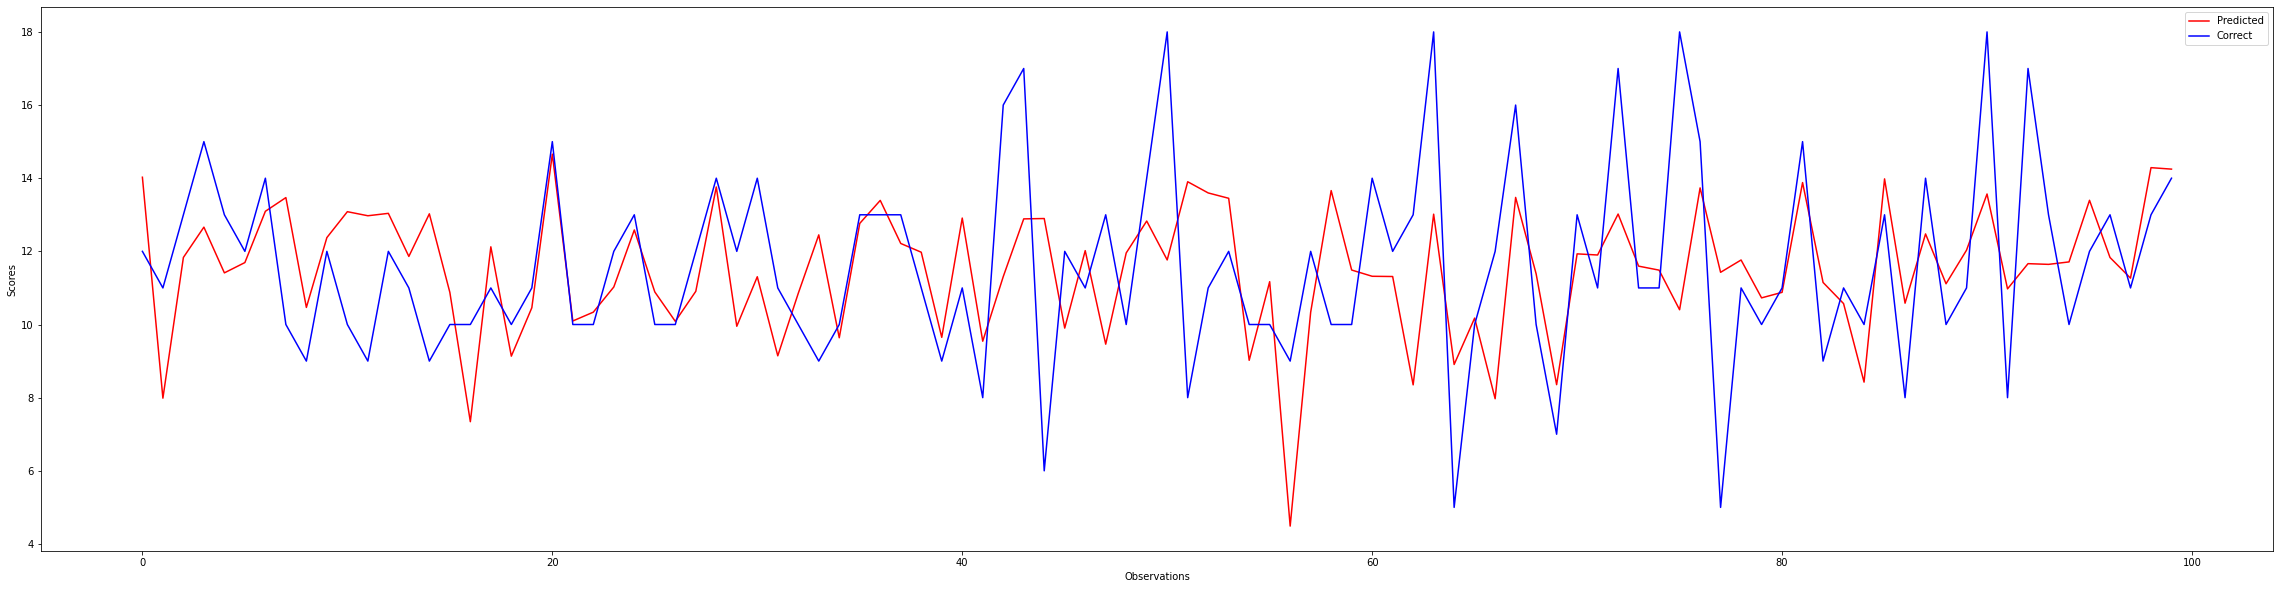

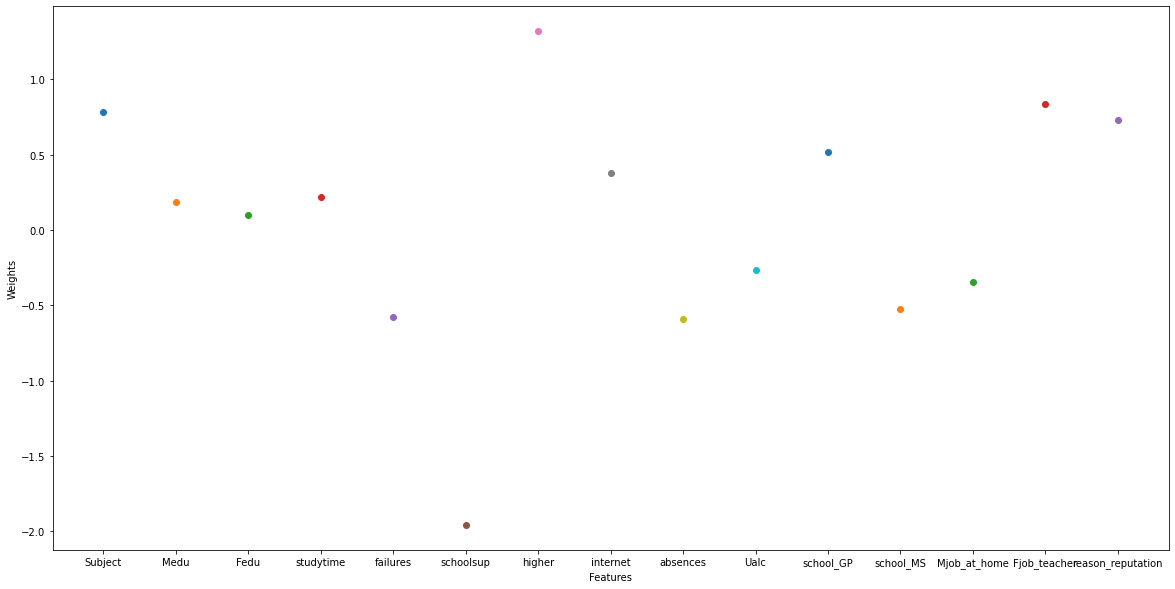

In [178]:
regression_plotter(*linear_regression(regData.drop(columns='G1'), regDataG3, 10))

Из полученных данных очевидно, что признак G1 дает значительный прирост как в точности угадывания оценок, так и в коофициенте детерминации; Процент точных попаданий ( когда предсказана точная оценка по 20бальной шкале ) в предсказании с G1 в среднем 30%, что очень неплохо для "точной оценки" при среднеквадратичной ошибке ~1.8балла. 

# Ridge Regression

In [179]:
def ridge_regression(df, var):
    model = RidgeCV(alphas = np.array(range(1, 50, 1)))
    model.fit(df, var)
    print("Оцененная alpha:", model.alpha_)
    y_predicted = model.predict(df)
    mse = metrics.mean_squared_error(y_pred=y_predicted, y_true=var)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred=y_predicted, y_true=var)
    det = metrics.r2_score(y_pred=y_predicted, y_true=var) 
        
    d = [[0,0] for x in range(21)]
    for x, y in zip(y_predicted, var):
        d[y][int(round(x) == y)] += 1
    
    coefList = []
    for cf, col in zip(model.coef_, df.columns):
        coefList.append([col, cf])
        
    return mse, rmse, mae, det, d, var, y_predicted, coefList

Оцененная alpha: 19
0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [7, 1]
6 : [17, 1]
7 : [18, 1]
8 : [44, 21]
9 : [41, 21]
10 : [106, 41]
11 : [102, 41]
12 : [66, 34]
13 : [67, 41]
14 : [57, 29]
15 : [47, 30]
16 : [37, 13]
17 : [26, 9]
18 : [20, 6]
19 : [0, 0]
20 : [0, 0]
wrong: 655
right: 289
cf: 30.614406779661017 %
Metrics:
Среднеквадратичная ошибка: 1.7327056783717205
Корень среднеквадратичной ошибки: 1.3163227865427691
Средняя абсолютная ошибка: 1.0384210992935283
Кф детерминации: 0.7844793133547175


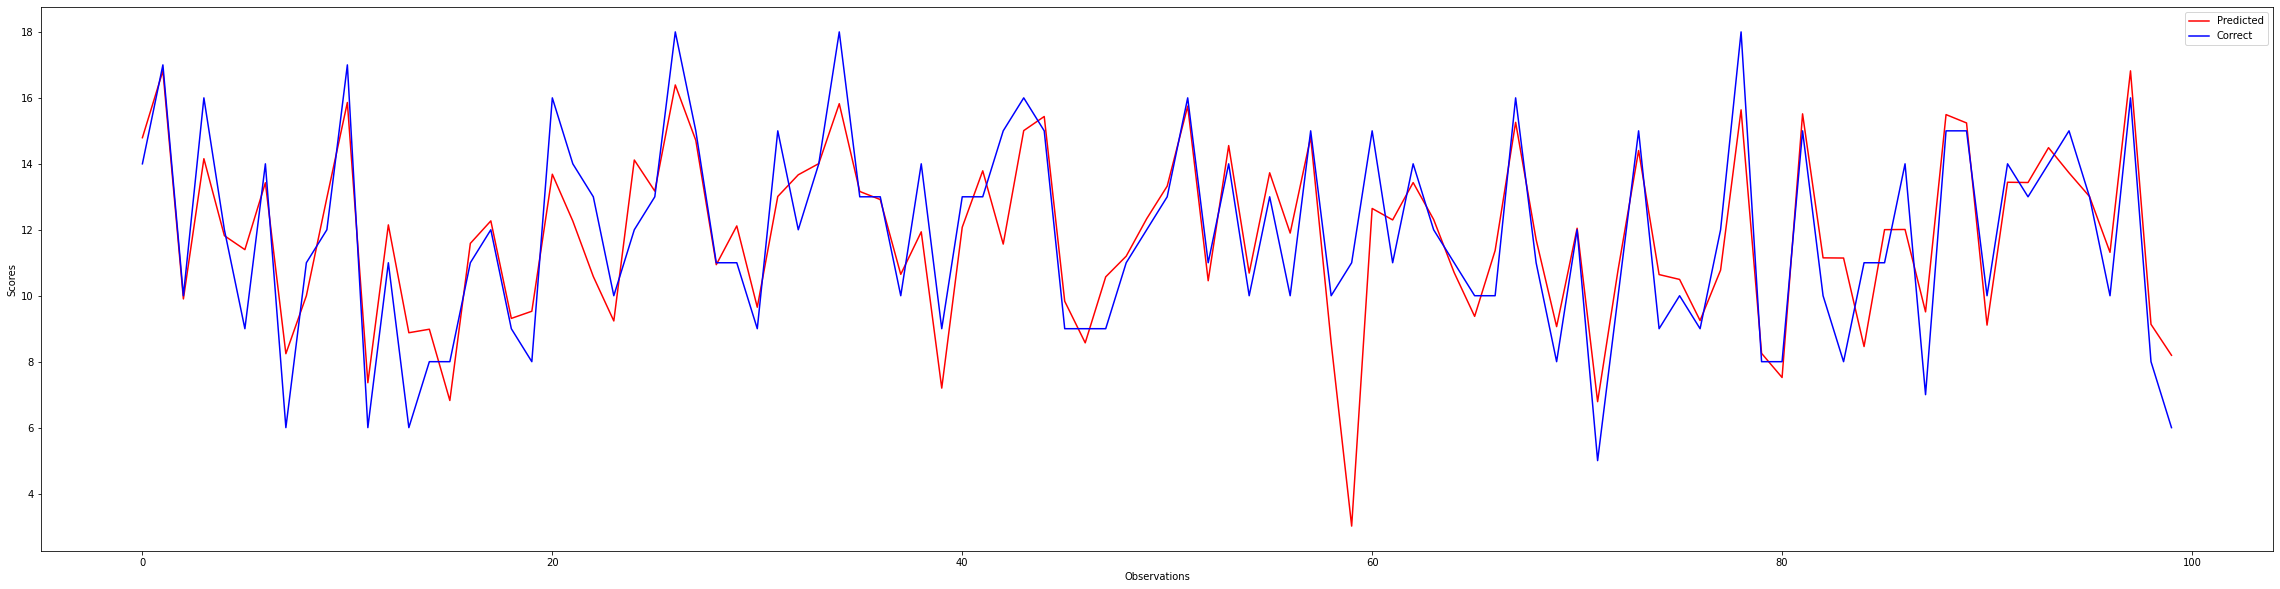

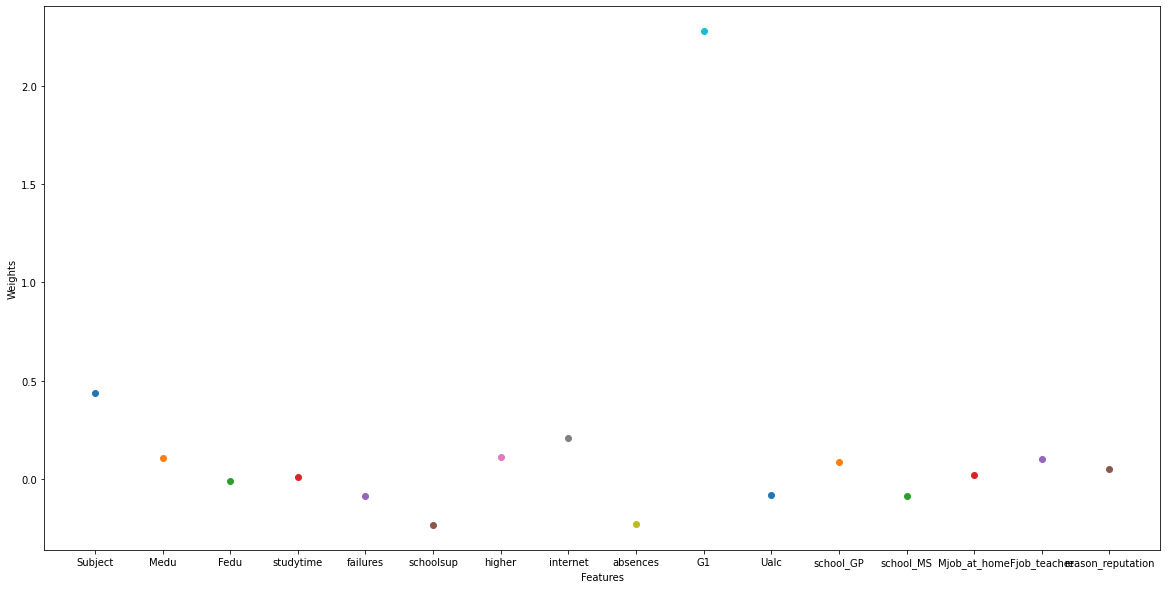

In [180]:
regression_plotter(*ridge_regression(regData, regDataG3))

Оцененная alpha: 6
0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [8, 0]
6 : [18, 0]
7 : [17, 2]
8 : [61, 4]
9 : [56, 6]
10 : [120, 27]
11 : [115, 28]
12 : [74, 26]
13 : [74, 34]
14 : [64, 22]
15 : [75, 2]
16 : [50, 0]
17 : [35, 0]
18 : [26, 0]
19 : [0, 0]
20 : [0, 0]
wrong: 793
right: 151
cf: 15.995762711864407 %
Metrics:
Среднеквадратичная ошибка: 5.723777962091103
Корень среднеквадратичной ошибки: 2.3924418409004433
Средняя абсолютная ошибка: 1.9194783262590995
Кф детерминации: 0.28805418485483547


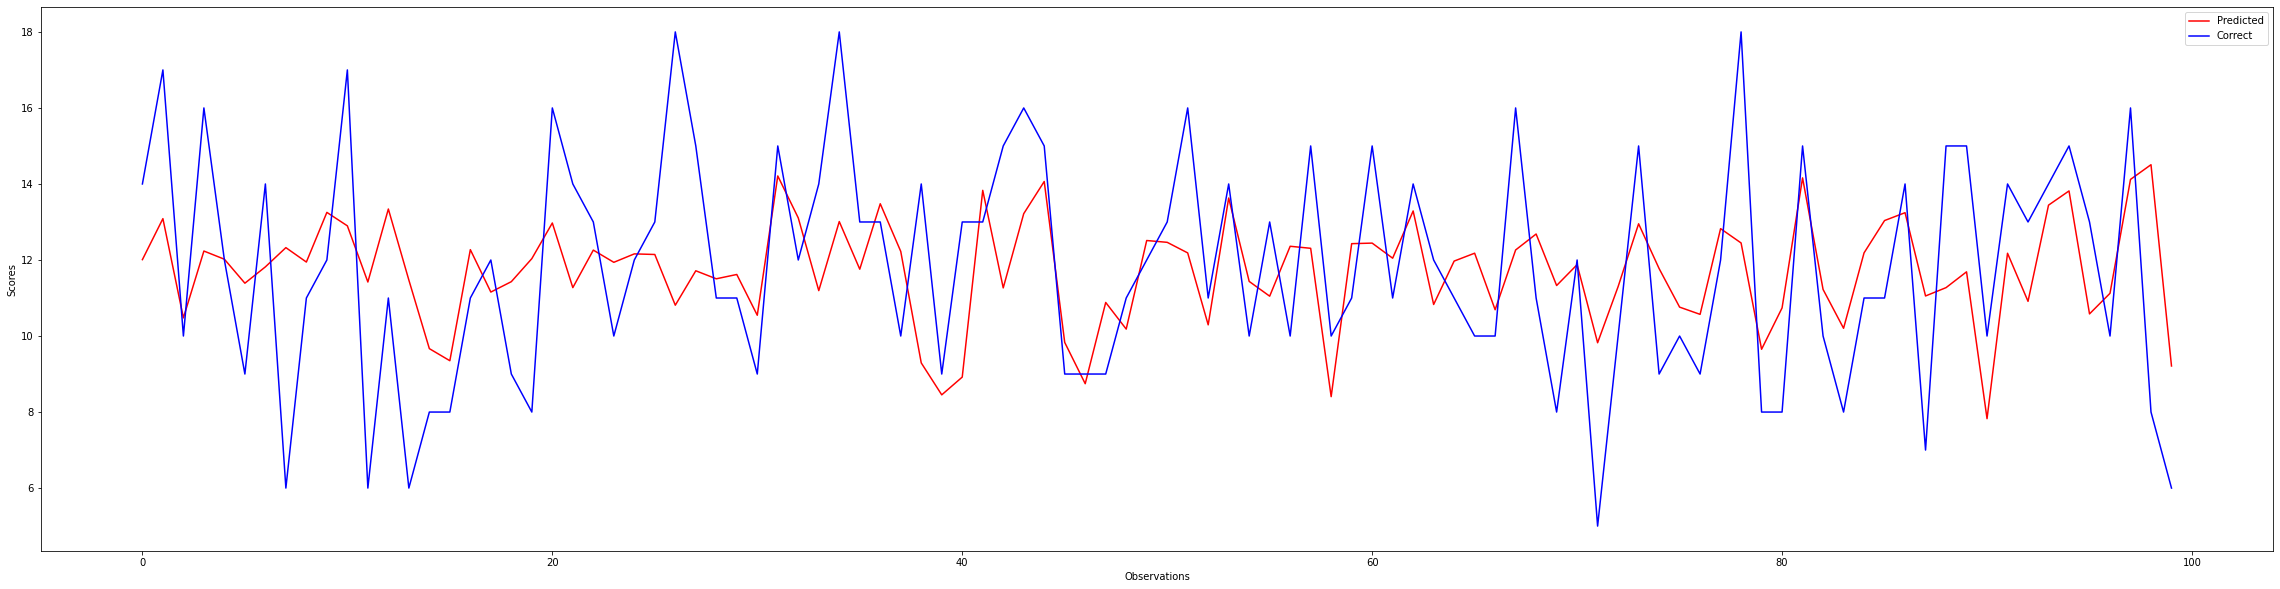

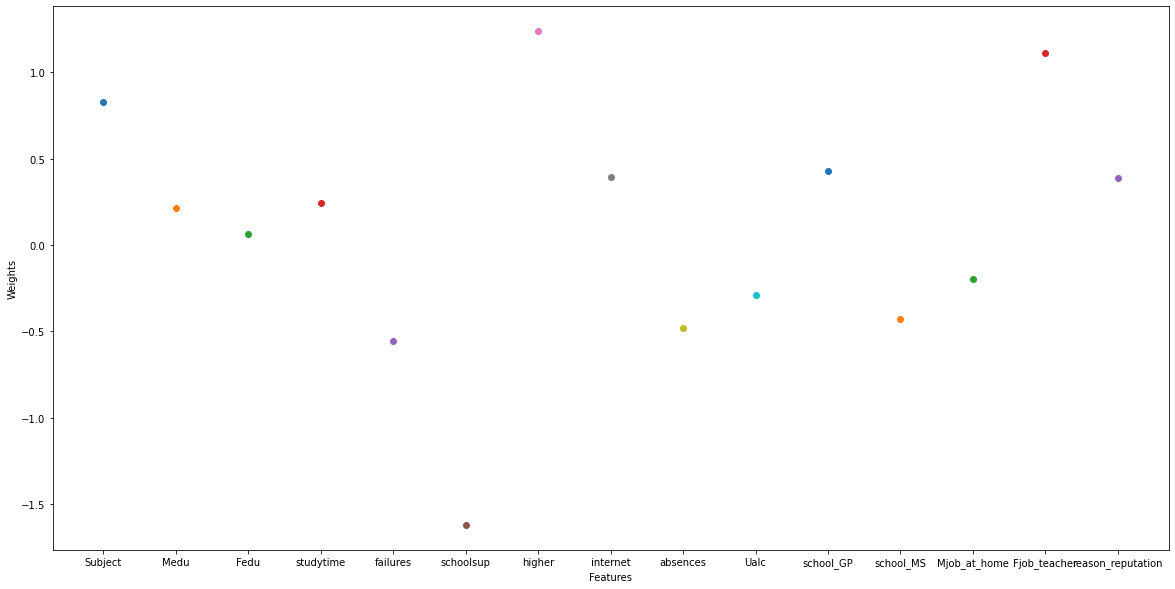

In [181]:
regression_plotter(*ridge_regression(regData.drop(columns='G1'), regDataG3))

# Lasso Regression

In [182]:
def lasso_regression(df, var):
    model = LassoCV(alphas = np.array(range(0, 500, 1))/1000)
    model.fit(df, var)
    print("Оцененная alpha:", model.alpha_)
    y_predicted = model.predict(df)
    mse = metrics.mean_squared_error(y_pred=y_predicted, y_true=var)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred=y_predicted, y_true=var)
    det = metrics.r2_score(y_pred=y_predicted, y_true=var) 
        
    d = [[0,0] for x in range(21)]
    for x, y in zip(y_predicted, var):
        d[y][int(round(x) == y)] += 1
        
    coefList = []
    for cf, col in zip(model.coef_, df.columns):
        coefList.append([col, cf])
        
    return mse, rmse, mae, det, d, var, y_predicted, coefList

Оцененная alpha: 0.015
0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [7, 1]
6 : [16, 2]
7 : [18, 1]
8 : [46, 19]
9 : [41, 21]
10 : [109, 38]
11 : [102, 41]
12 : [65, 35]
13 : [67, 41]
14 : [57, 29]
15 : [47, 30]
16 : [37, 13]
17 : [26, 9]
18 : [19, 7]
19 : [0, 0]
20 : [0, 0]
wrong: 657
right: 287
cf: 30.402542372881356 %
Metrics:
Среднеквадратичная ошибка: 1.7390643358107578
Корень среднеквадратичной ошибки: 1.3187358855399203
Средняя абсолютная ошибка: 1.0371821487595057
Кф детерминации: 0.783688398755366


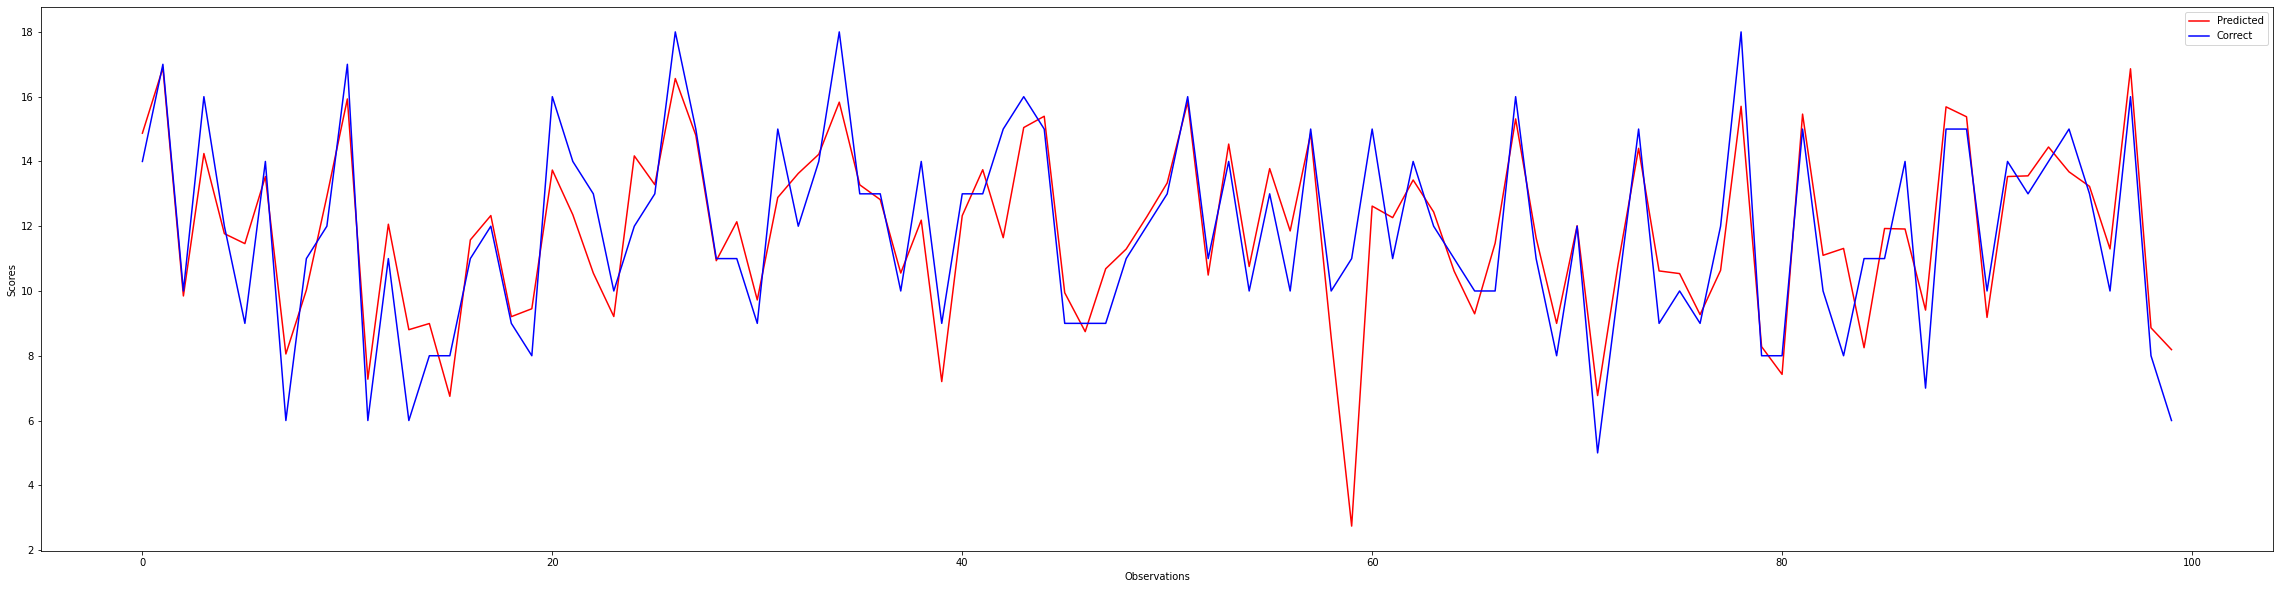

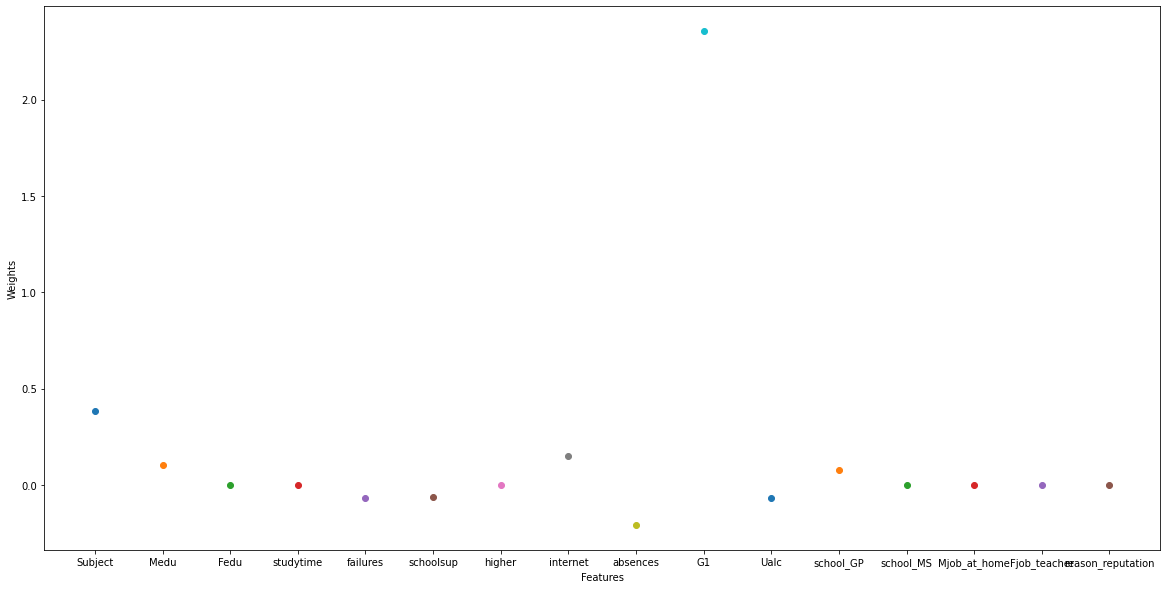

In [183]:
regression_plotter(*lasso_regression(regData, regDataG3))

Оцененная alpha: 0.004
0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [8, 0]
6 : [18, 0]
7 : [17, 2]
8 : [61, 4]
9 : [55, 7]
10 : [123, 24]
11 : [113, 30]
12 : [73, 27]
13 : [73, 35]
14 : [64, 22]
15 : [75, 2]
16 : [50, 0]
17 : [35, 0]
18 : [26, 0]
19 : [0, 0]
20 : [0, 0]
wrong: 791
right: 153
cf: 16.20762711864407 %
Metrics:
Среднеквадратичная ошибка: 5.721278974556312
Корень среднеквадратичной ошибки: 2.3919195167388705
Средняя абсолютная ошибка: 1.9201582889861015
Кф детерминации: 0.28836501866587383


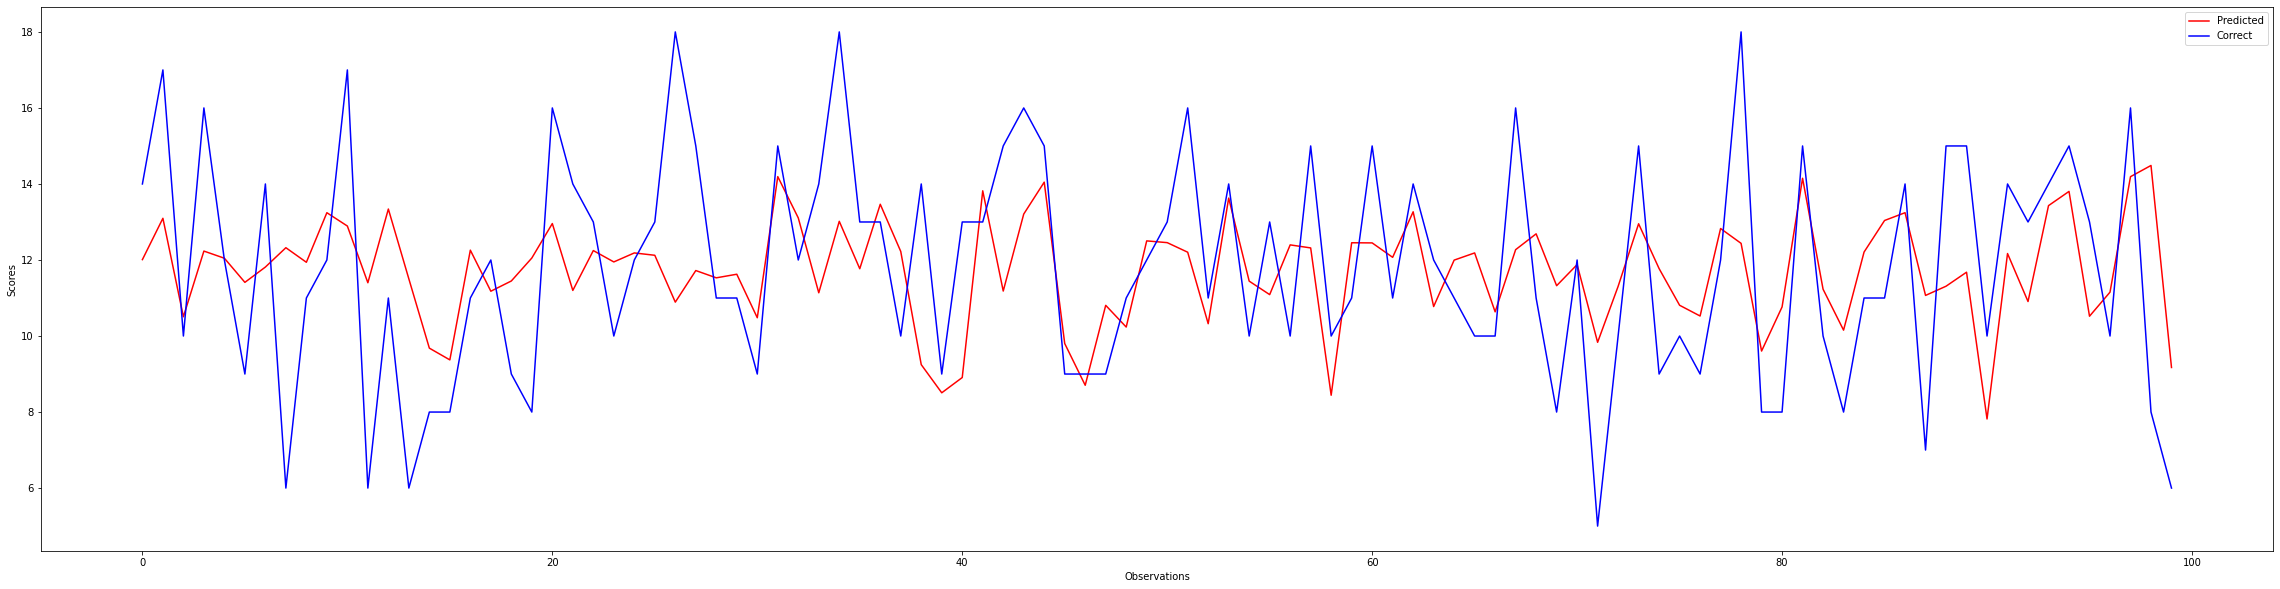

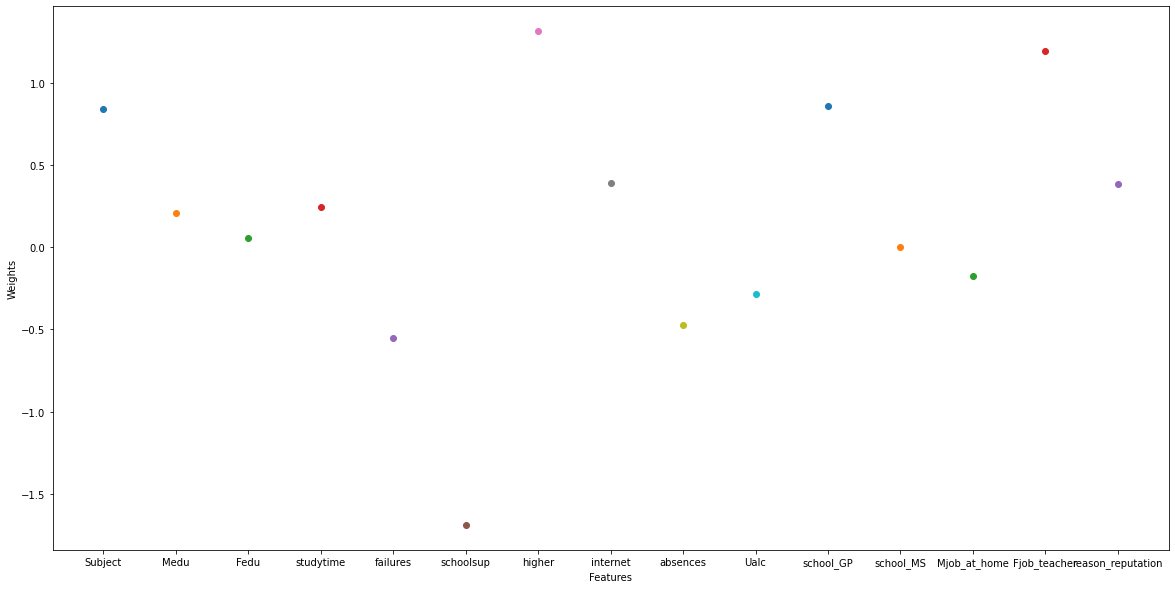

In [184]:
regression_plotter(*lasso_regression(regData.drop(columns='G1'), regDataG3))

В целом, оценки близки к обычной регрессии, Ridge и Lasso немного уменьшили ошибки.

### Общий вывод по линейной регрессии: 
G1 дает существенный прирост в прогнозировании итоговой оценки. Однако, если не учитывать признак G1, то основными оценками являются образование матери (прямая корреляция), желание получить высшее образование (прямая корреляция), работает ли отец учителем (прямая корреляция),количество провалов на прошлых экзаменах (обратная корреляция), нуждается ли в помощи в учебе(обратная корреляция), кол-во выпиваемого алкоголя(обратная корреляция). Также стоит заметить, что все типы регрессий имели практически одинаковые распределения весов
##### Без признака G1 коэфициент детерминации ~ 0.3, что не дает сделать вывод о состоятельности модели

# Полиномиальная регрессия

In [185]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(df, var, degree):
    model = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)
    
    poly = PolynomialFeatures(degree=degree)
    x_train = poly.fit_transform(x_train)
    
    model.fit(x_train, y_train)
    
    x_test = poly.fit_transform(x_test)

    y_predicted =  model.predict(x_test)
    
    
    mse  = metrics.mean_squared_error(y_pred=y_predicted, y_true=y_test)
    rmse = np.sqrt(mse)
    mae  = metrics.mean_absolute_error(y_pred=y_predicted, y_true=y_test)
    det  = metrics.r2_score(y_pred=y_predicted, y_true=y_test) 
        
    d = [[0,0] for x in range(21)]
    for x, y in zip(y_predicted, y_test):
        d[y][int(round(x) == y)] += 1
        
    coefList = []
    for cf, col in zip(model.coef_, df.columns):
        coefList.append([col, cf])
        
   
    return mse, rmse, mae, det, d, var, y_predicted, coefList

0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [2, 0]
6 : [5, 1]
7 : [2, 1]
8 : [19, 5]
9 : [7, 6]
10 : [33, 12]
11 : [27, 12]
12 : [20, 5]
13 : [20, 14]
14 : [23, 10]
15 : [15, 8]
16 : [11, 7]
17 : [10, 1]
18 : [5, 3]
19 : [0, 0]
20 : [0, 0]
wrong: 199
right: 85
cf: 29.929577464788732 %
Metrics:
Среднеквадратичная ошибка: 2.2452157533803905
Корень среднеквадратичной ошибки: 1.4984044024829848
Средняя абсолютная ошибка: 1.1557478367442815
Кф детерминации: 0.7265932784406832


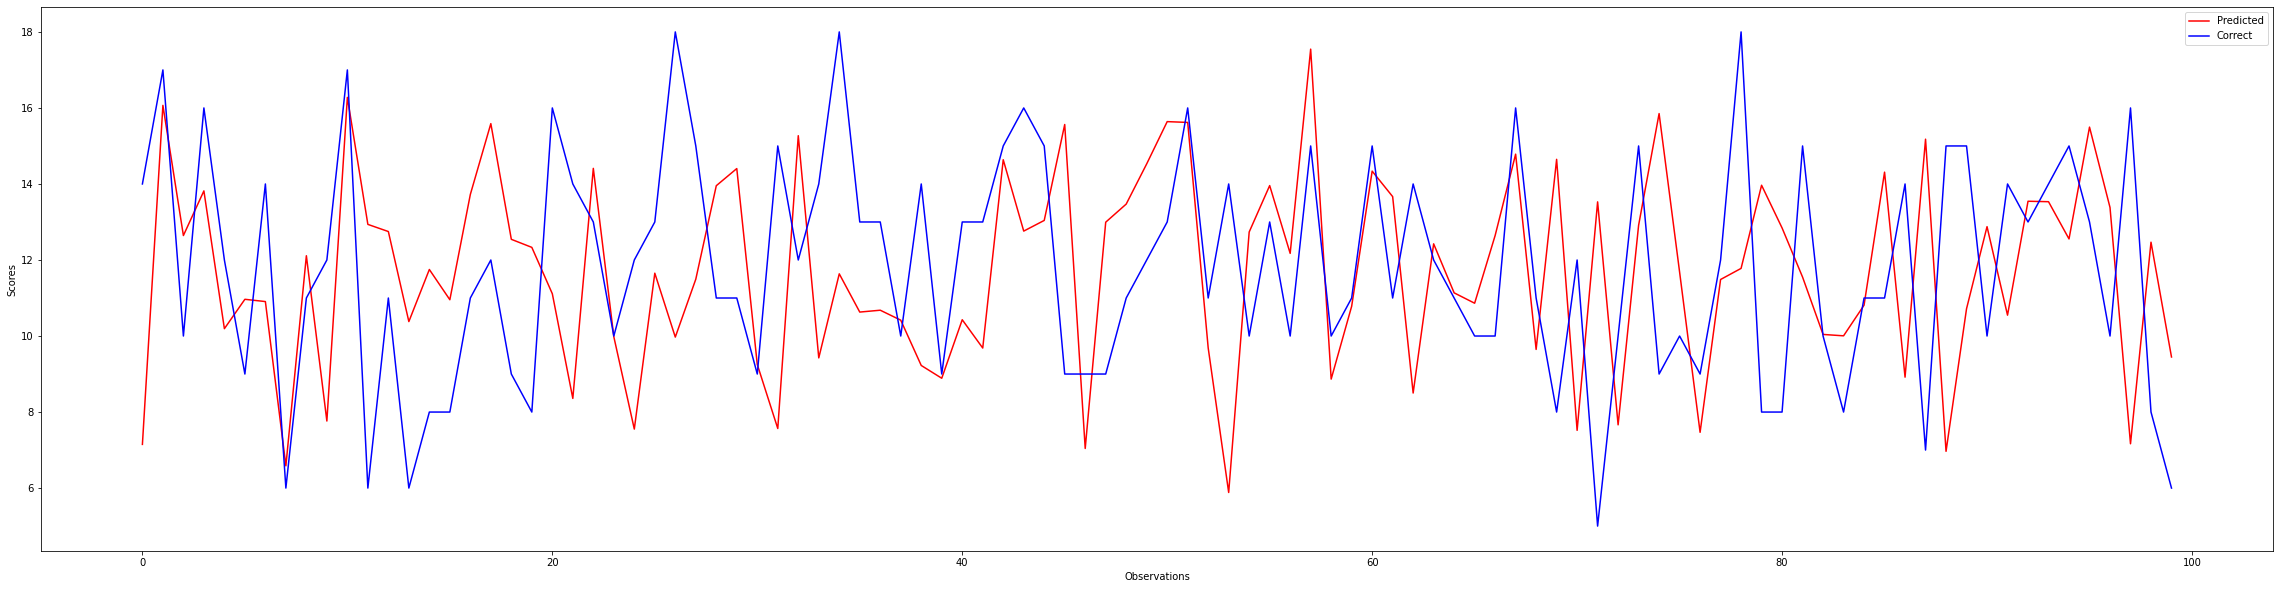

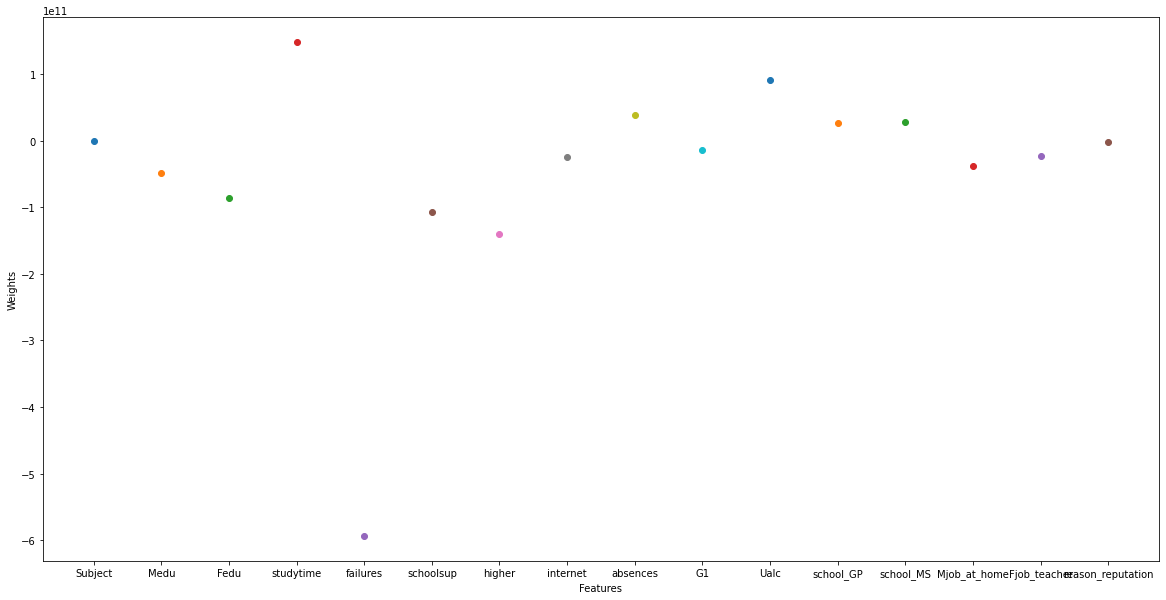

In [192]:
regression_plotter(*polynomial_regression(regData, regDataG3, 2))

0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [4, 0]
6 : [7, 0]
7 : [5, 0]
8 : [12, 4]
9 : [18, 2]
10 : [33, 9]
11 : [37, 3]
12 : [23, 9]
13 : [28, 8]
14 : [23, 6]
15 : [21, 2]
16 : [13, 0]
17 : [9, 0]
18 : [8, 0]
19 : [0, 0]
20 : [0, 0]
wrong: 241
right: 43
cf: 15.140845070422534 %
Metrics:
Среднеквадратичная ошибка: 6.094704663266205
Корень среднеквадратичной ошибки: 2.4687455647081586
Средняя абсолютная ошибка: 1.9456743052307988
Кф детерминации: 0.24503588520080077


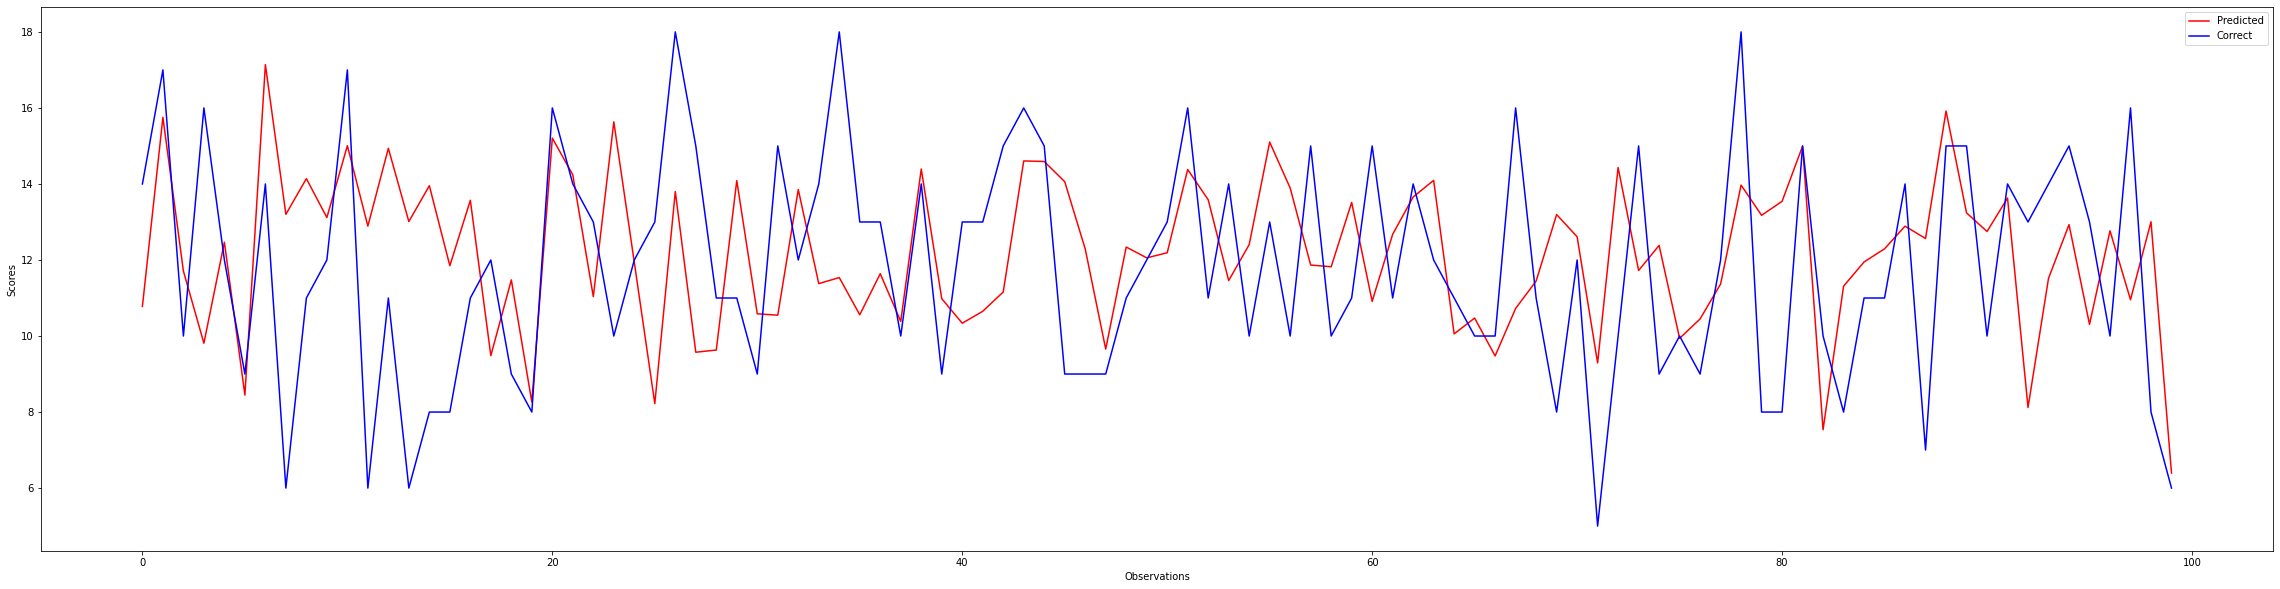

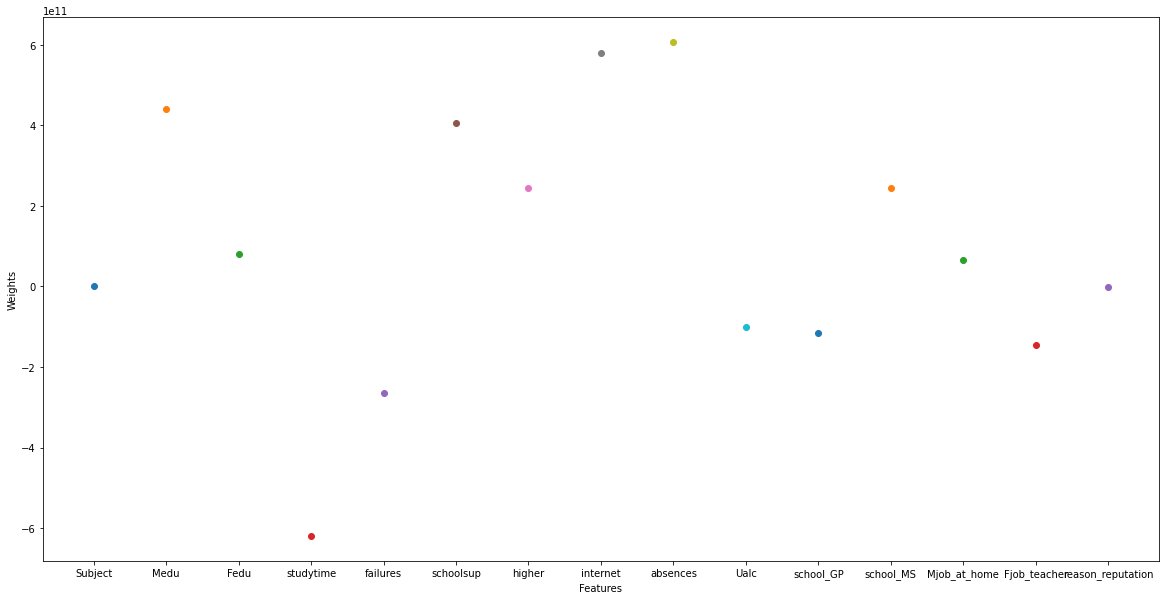

In [193]:
regression_plotter(*polynomial_regression(regData.drop(columns='G1'), regDataG3, 2))

#### Перебор степеней показал, что лучшая степень для регрессии - 1 степень 2 чуть ухудшила результаты, а при степени >=3 и вовсе ошибки стали огромными.

# KNN

### Используем все данные ( с 0, 1, 20 ...)

In [194]:
from sklearn.neighbors import KNeighborsRegressor

In [195]:
def KNN(df, var, num_shuffles, n_neighbors):
    mse  = 0
    rmse = 0
    mae  = 0
    det  = 0
    for i in range (num_shuffles):       
        x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)       
        model = KNeighborsRegressor(n_neighbors=n_neighbors)
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        tmpmse= metrics.mean_squared_error(y_pred=y_predicted, y_true=y_test)
        mse += tmpmse
        rmse+= np.sqrt(tmpmse)
        mae+= metrics.mean_absolute_error(y_pred=y_predicted, y_true=y_test)
        det+= metrics.r2_score(y_pred=y_predicted, y_true=y_test) 
        
    d = [[0,0] for x in range(21)]
    for x, y in zip(y_predicted, y_test):
        d[y][int(round(x) == y)] += 1
        
    mse /= num_shuffles
    rmse /= num_shuffles
    mae /= num_shuffles
    det /= num_shuffles
    
    coefList = []
   
    return mse, rmse, mae, det, d, y_test, y_predicted, coefList

C G1

0 : [14, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [1, 0]
6 : [3, 1]
7 : [1, 2]
8 : [14, 4]
9 : [16, 5]
10 : [42, 7]
11 : [31, 14]
12 : [22, 13]
13 : [16, 11]
14 : [20, 10]
15 : [13, 3]
16 : [17, 1]
17 : [8, 0]
18 : [11, 0]
19 : [2, 0]
20 : [0, 0]
wrong: 231
right: 71
cf: 23.509933774834437 %
Metrics:
Среднеквадратичная ошибка: 6.324813813332112
Корень среднеквадратичной ошибки: 2.508708120430005
Средняя абсолютная ошибка: 1.704382547721075
Кф детерминации: 0.5732564132521755
best_n: 17


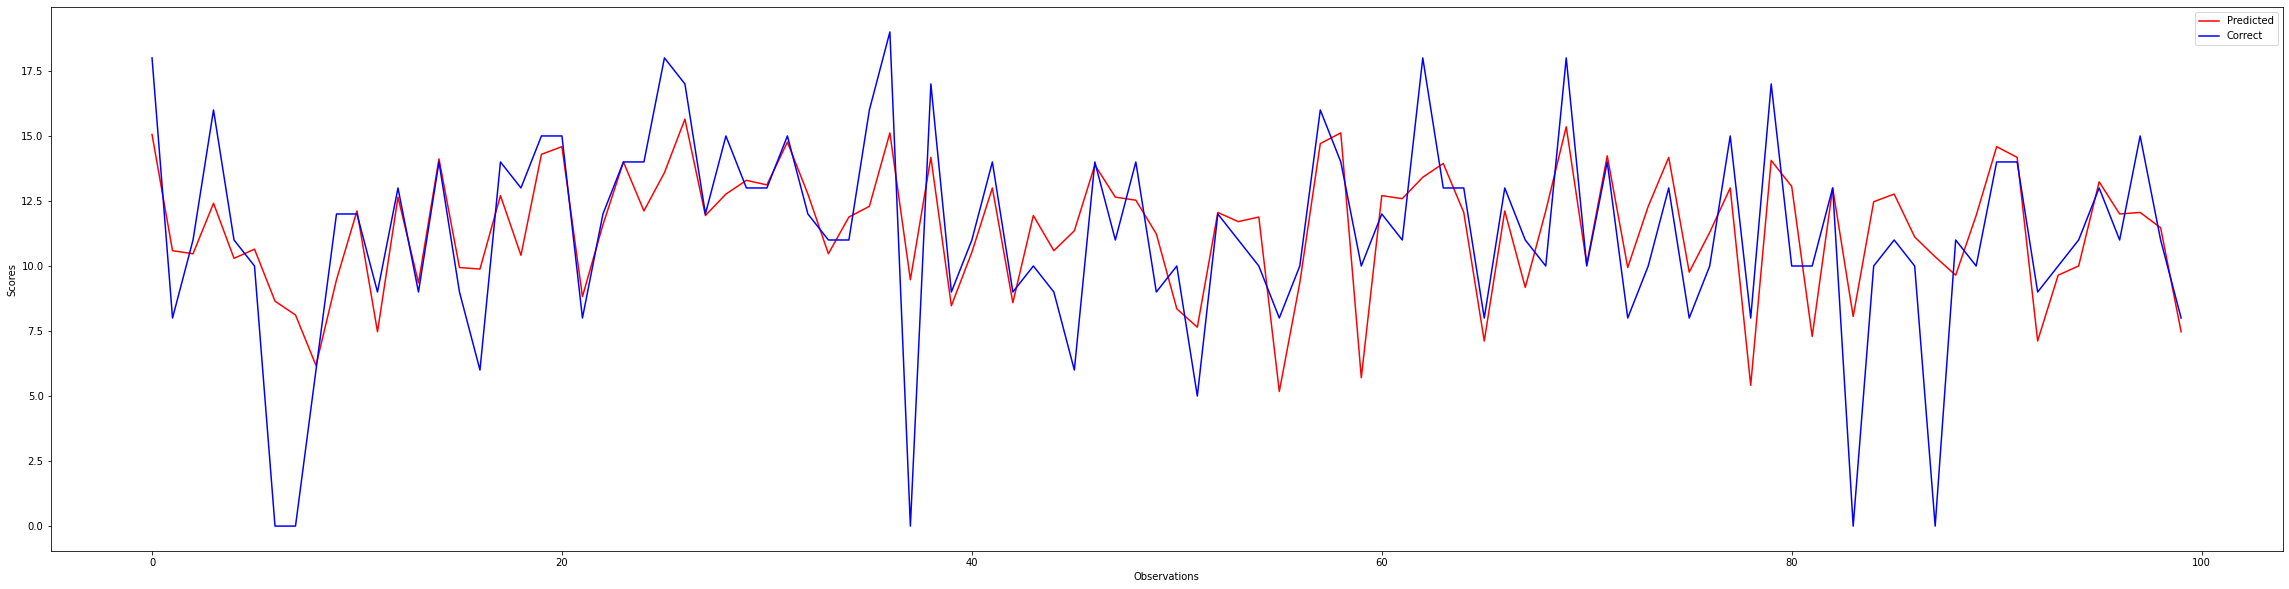

In [199]:
z = KNN(data, G3, 10, 1)

best_n = 1
# смотрим, для какого n будет лучший кф. детерминации
for i in range(10, 60):
    x = KNN(data, G3, 10, i)
    if x[3] > z[3]:
        z = x
        best_n = i
regression_plotter(*z)
print('best_n:', best_n)

Без G1

0 : [13, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [1, 0]
5 : [4, 0]
6 : [5, 0]
7 : [6, 2]
8 : [22, 1]
9 : [12, 0]
10 : [30, 5]
11 : [33, 12]
12 : [18, 14]
13 : [29, 11]
14 : [23, 4]
15 : [24, 0]
16 : [14, 0]
17 : [11, 0]
18 : [4, 0]
19 : [3, 0]
20 : [1, 0]
wrong: 253
right: 49
cf: 16.225165562913908 %
Metrics:
Среднеквадратичная ошибка: 11.68106033848418
Корень среднеквадратичной ошибки: 3.4129096385218474
Средняя абсолютная ошибка: 2.462516556291391
Кф детерминации: 0.19735184358662838
best_n: 30


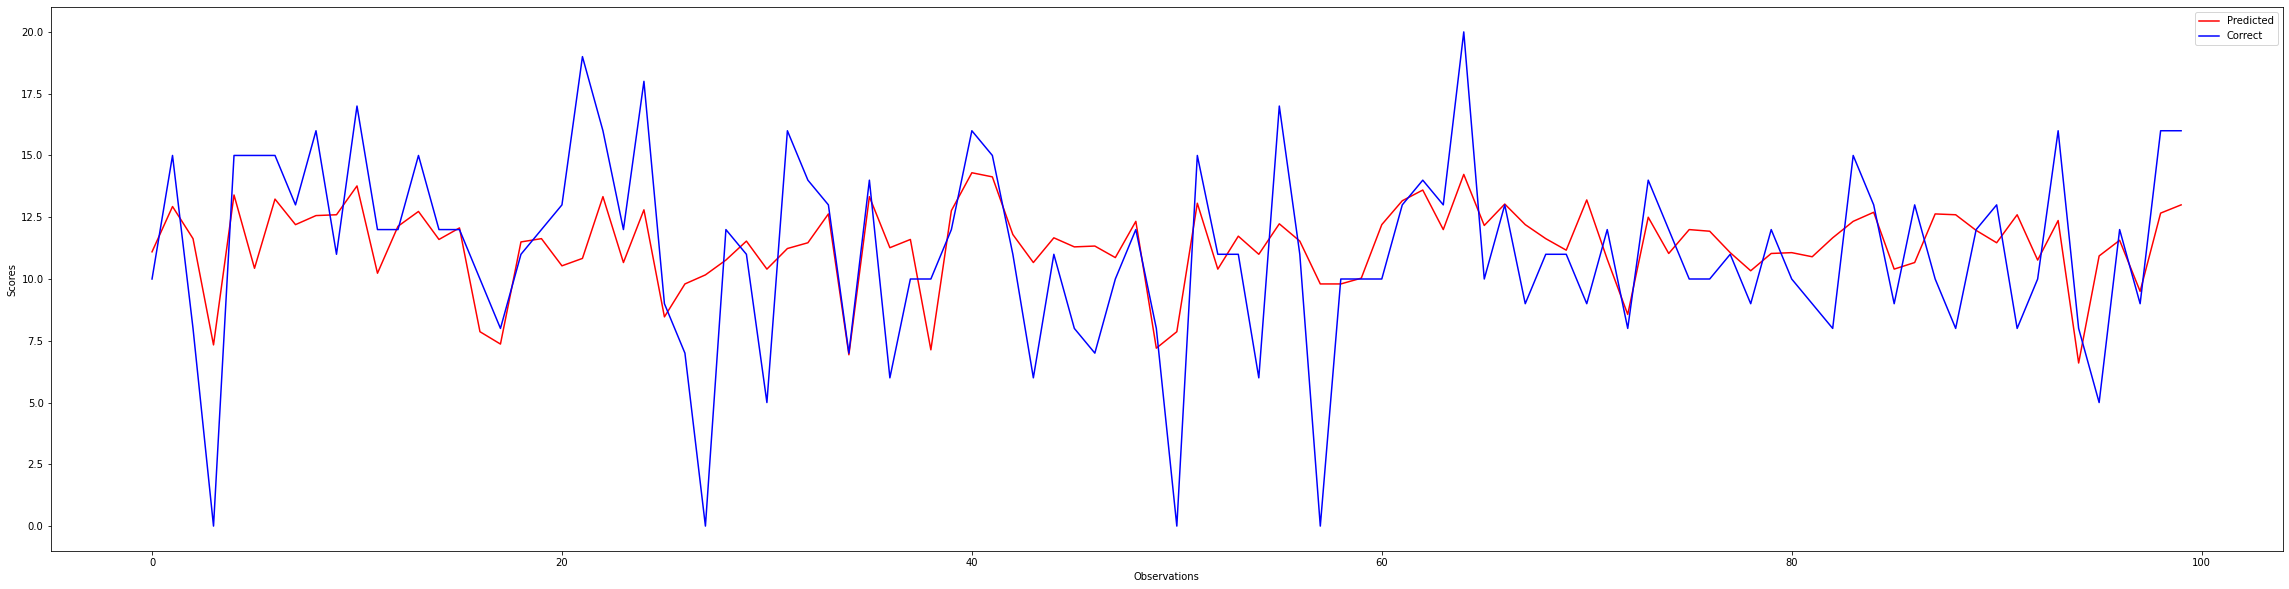

In [200]:
z = KNN(data.drop(columns='G1'), G3, 10, 1)

best_n = 1
# смотрим, для какого n будет лучший кф. детерминации
for i in range(2, 100):
    x = KNN(data.drop(columns='G1'), G3, 10, i)
    if x[3] > z[3]:
        z = x
        best_n = i
regression_plotter(*z)
print('best_n:', best_n)

### Из полученных  данных видно, что KNN справился хуже регрессий в обоих случаях

# Radius NN

In [201]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [202]:
def RadiusNN(df, var, num_shuffles, radius):
    mse  = 0
    rmse = 0
    mae  = 0
    det  = 0
    for i in range (num_shuffles):       
        x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)       
        model = RadiusNeighborsRegressor(radius)
        
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        tmpmse= metrics.mean_squared_error(y_pred=y_predicted, y_true=y_test)
        mse += tmpmse
        rmse+= np.sqrt(tmpmse)
        mae+= metrics.mean_absolute_error(y_pred=y_predicted, y_true=y_test)
        det+= metrics.r2_score(y_pred=y_predicted, y_true=y_test) 
        
    d = [[0,0] for x in range(21)]
    for x, y in zip(y_predicted, y_test):
        d[y][int(round(x) == y)] += 1
        
    mse /= num_shuffles
    rmse /= num_shuffles
    mae /= num_shuffles
    det /= num_shuffles
    
    coefList = []
   
    return mse, rmse, mae, det, d, y_test, y_predicted, coefList

0 : [17, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [5, 0]
6 : [5, 0]
7 : [5, 0]
8 : [23, 2]
9 : [15, 0]
10 : [38, 6]
11 : [23, 21]
12 : [8, 16]
13 : [28, 3]
14 : [21, 0]
15 : [23, 0]
16 : [15, 0]
17 : [15, 0]
18 : [8, 0]
19 : [5, 0]
20 : [0, 0]
wrong: 254
right: 48
cf: 15.894039735099339 %
Metrics:
Среднеквадратичная ошибка: 9.840119294408094
Корень среднеквадратичной ошибки: 3.1332878492390352
Средняя абсолютная ошибка: 2.208635504243735
Кф детерминации: 0.3350904153635792
best_n: 4.0


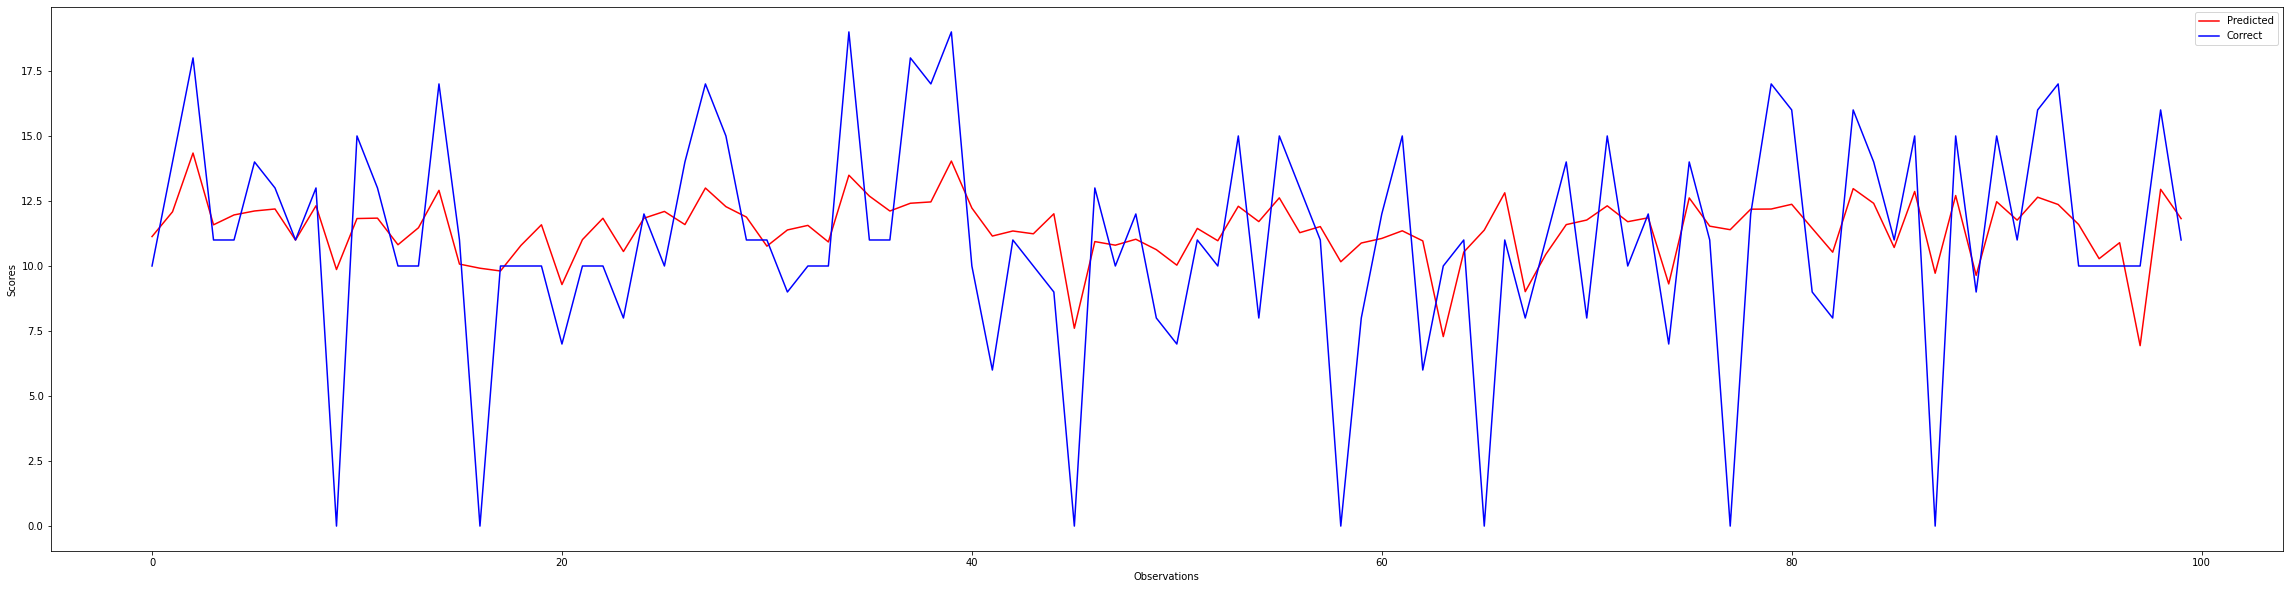

In [203]:
z = RadiusNN(data, G3, 10, 1)

best_n = 1
# смотрим, для какого radius будет лучший кф. детерминации
for i in range(2, 60):
    x = RadiusNN(data, G3, 10, i/10)
    if x[3] > z[3]:
        z = x
        best_n = i/10
regression_plotter(*z)
print('best_n:', best_n)

0 : [20, 0]
1 : [1, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [3, 0]
6 : [4, 0]
7 : [5, 0]
8 : [24, 1]
9 : [20, 0]
10 : [46, 2]
11 : [30, 8]
12 : [5, 24]
13 : [33, 2]
14 : [25, 0]
15 : [20, 0]
16 : [12, 0]
17 : [6, 0]
18 : [9, 0]
19 : [2, 0]
20 : [0, 0]
wrong: 265
right: 37
cf: 12.251655629139073 %
Metrics:
Среднеквадратичная ошибка: 13.1919584367326
Корень среднеквадратичной ошибки: 3.626803360103113
Средняя абсолютная ошибка: 2.607450015197084
Кф детерминации: 0.10496676946227237
best_n: 4.0


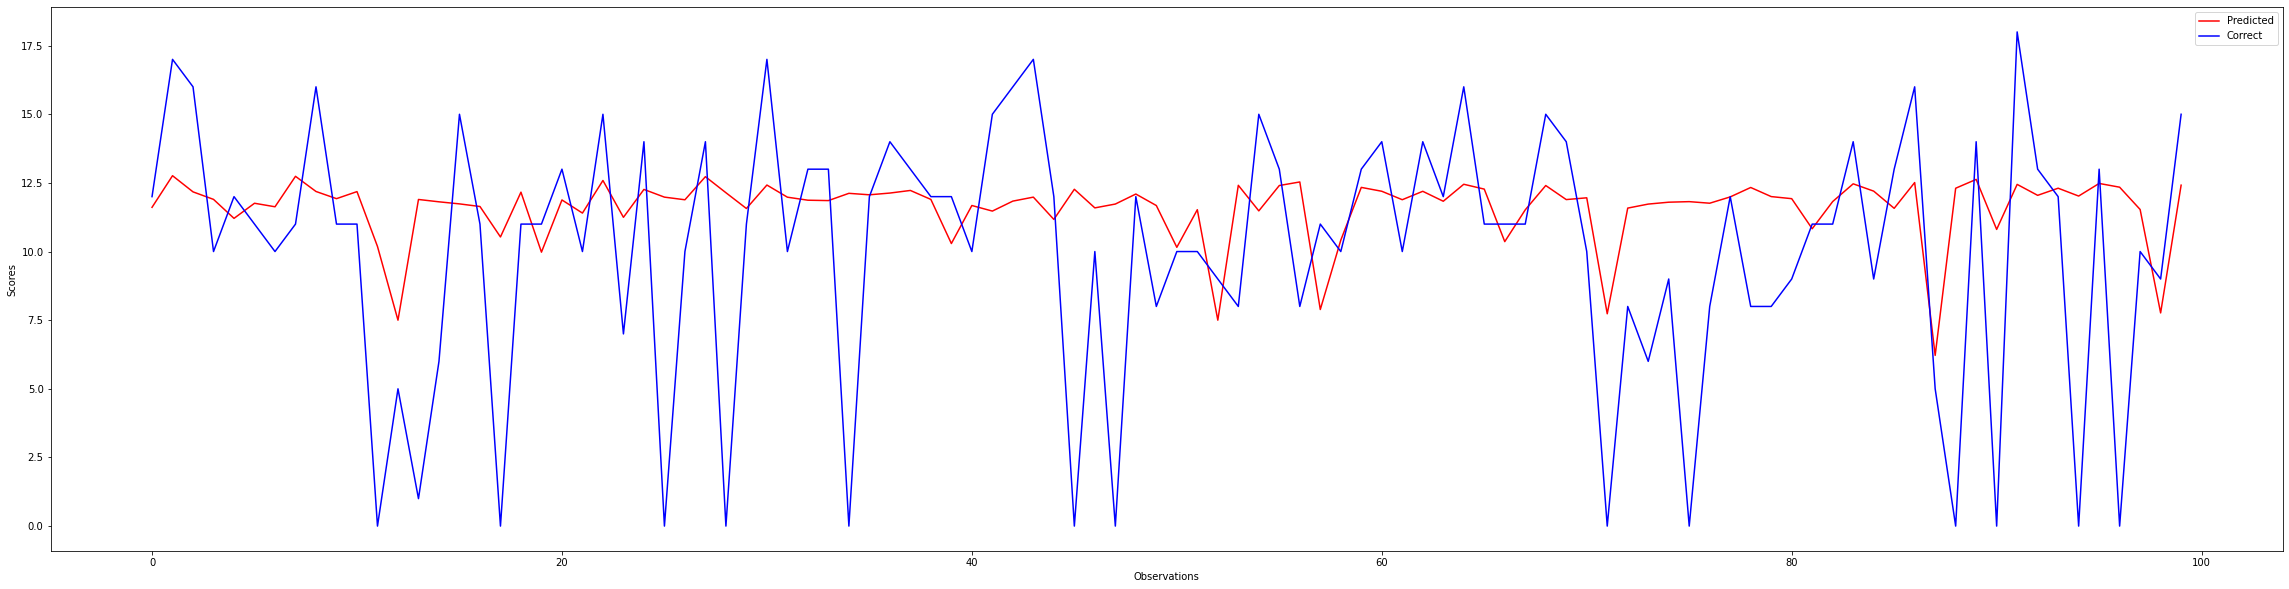

In [204]:
z = RadiusNN(data.drop(columns='G1'), G3, 10, 1)

best_n = 1
# смотрим, для какого radius будет лучший кф. детерминации
for i in range(2, 50, 1):
    x = RadiusNN(data.drop(columns='G1'), G3, 10, i / 10)
    if x[3] > z[3]:
        z = x
        best_n = i /10
regression_plotter(*z)
print('best_n:', best_n)

### Даже для датасета с G1 Radius NN показал плохой результат. 
#### Параметр weights = 'distance' только ухудшил результат

# Дерево решений

In [205]:
from sklearn.tree import DecisionTreeRegressor

In [206]:
from sklearn.tree import plot_tree

In [207]:
def decTree(df, var, num_shuffles, max_depth, min_samples_split, shouldPlot = False):
    mse  = 0
    rmse = 0
    mae  = 0
    det  = 0
    for i in range (num_shuffles):       
        x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)       
        model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split)
        
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        tmpmse= metrics.mean_squared_error(y_pred=y_predicted, y_true=y_test)
        mse += tmpmse
        rmse+= np.sqrt(tmpmse)
        mae+= metrics.mean_absolute_error(y_pred=y_predicted, y_true=y_test)
        det+= metrics.r2_score(y_pred=y_predicted, y_true=y_test) 
    
    

    if shouldPlot:
        plt.figure(figsize = (40,20))
        plot_tree(model, filled=True, fontsize=22)
        plt.show()

    
    d = [[0,0] for x in range(21)]
    for x, y in zip(y_predicted, y_test):
        d[y][int(round(x) == y)] += 1
        
    mse /= num_shuffles
    rmse /= num_shuffles
    mae /= num_shuffles
    det /= num_shuffles
    
    coefList = []
   
    return mse, rmse, mae, det, d, y_test, y_predicted, coefList



[Warning] Запускать с осторожностью, работает долго

In [208]:
z = decTree(data, G3, 10, 2, 2)

best_d = 2
best_split = 2
# смотрим, для какой глубины дерева и числа элементов для разделения будет лучший кф. детерминации
for i in range(4, 50, 2):
    for j in range (2,50,2):
        x = decTree(data, G3, 20, i, j)
        if x[3] > z[3]:
            z = x
            best_d = i
            best_split = j
            
print('best_d:', best_d)
print('best_split:', best_split)

best_d: 4
best_split: 30


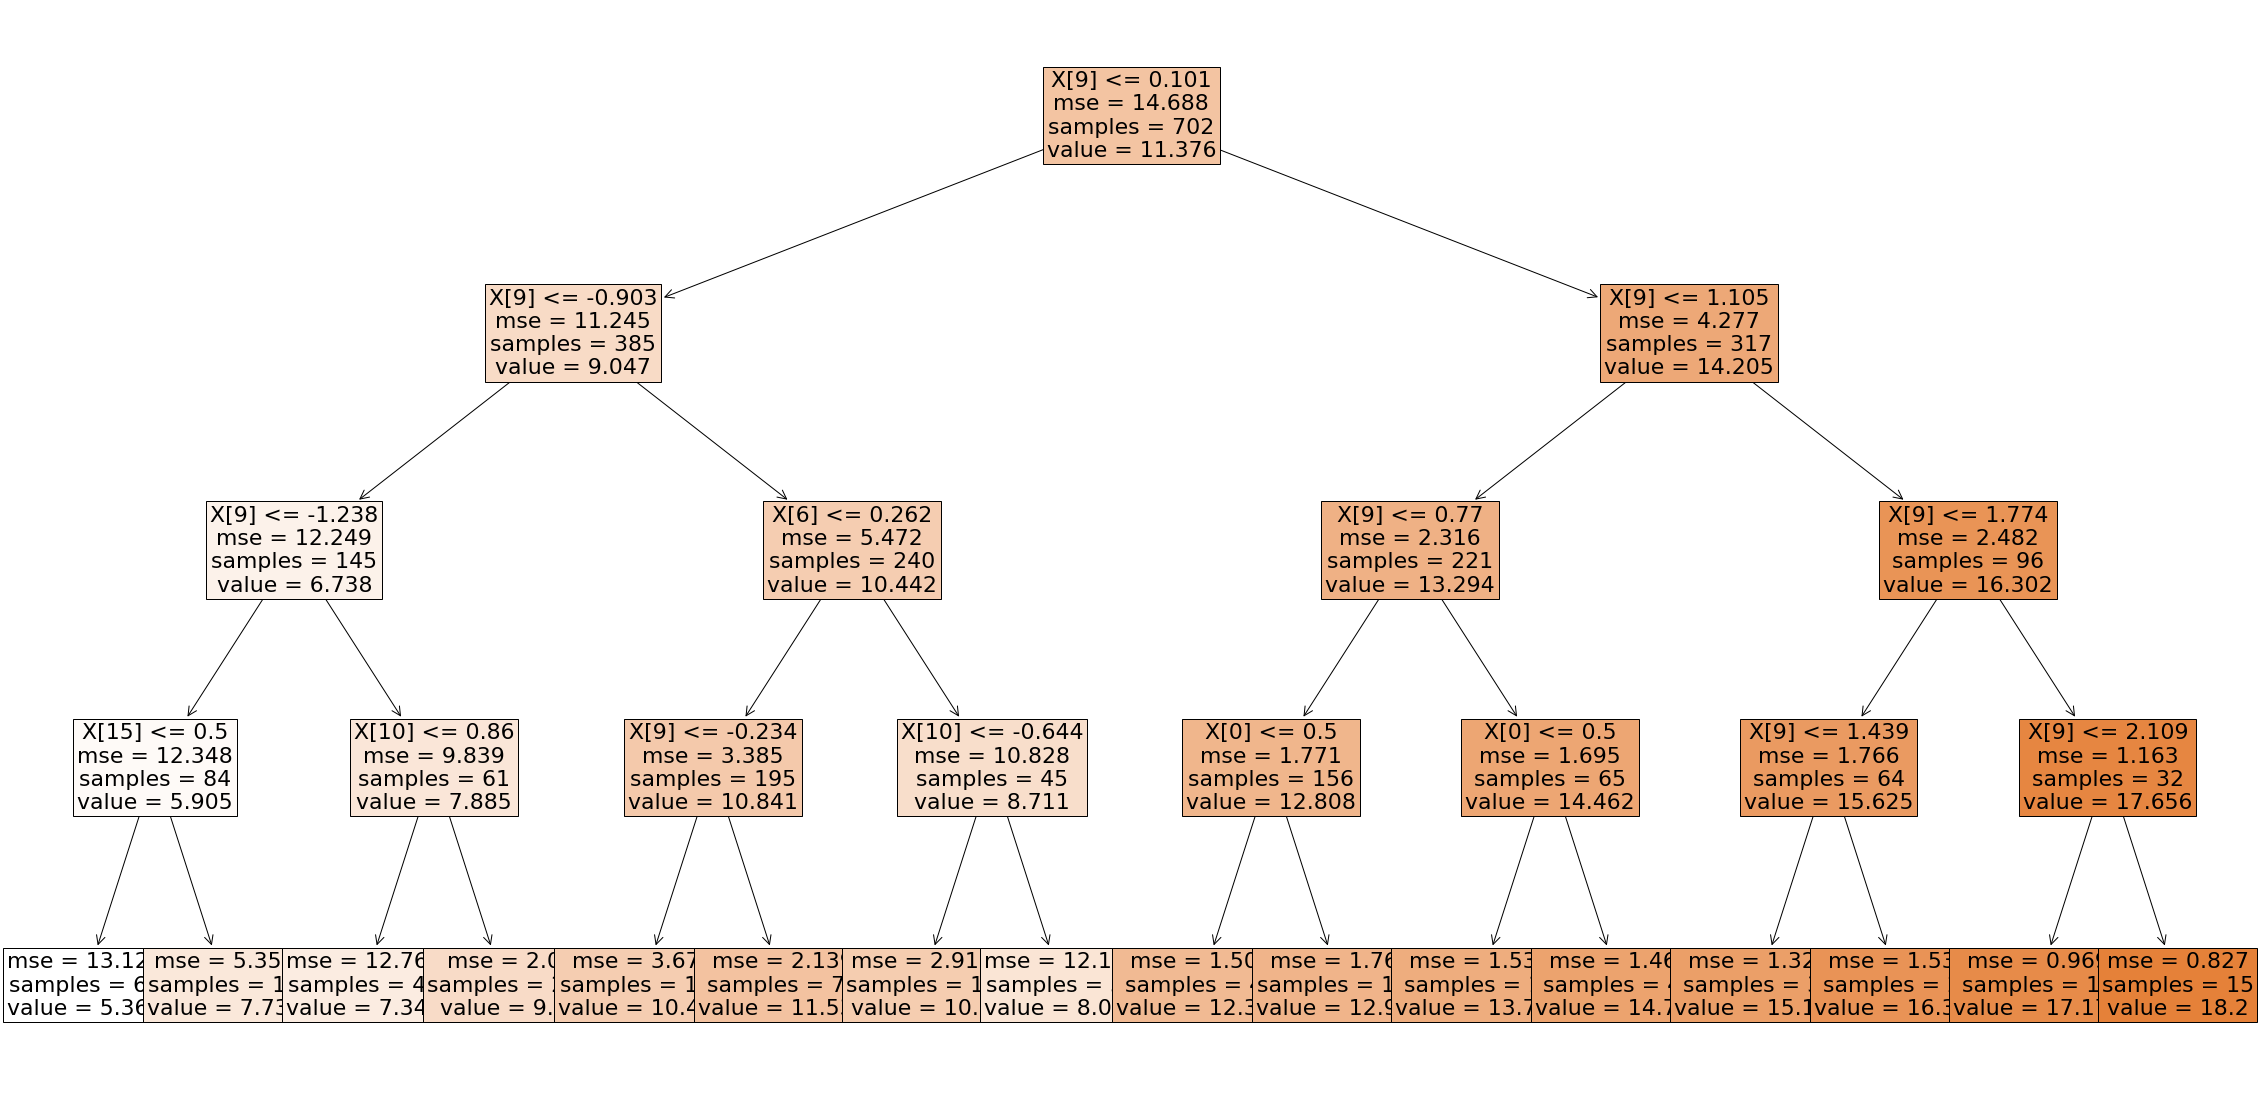

0 : [19, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [0, 0]
6 : [4, 0]
7 : [6, 0]
8 : [16, 2]
9 : [19, 0]
10 : [27, 24]
11 : [45, 0]
12 : [16, 11]
13 : [21, 12]
14 : [22, 0]
15 : [12, 10]
16 : [11, 5]
17 : [9, 4]
18 : [3, 3]
19 : [1, 0]
20 : [0, 0]
wrong: 231
right: 71
cf: 23.509933774834437 %
Metrics:
Среднеквадратичная ошибка: 5.657669953789549
Корень среднеквадратичной ошибки: 2.3732368051819384
Средняя абсолютная ошибка: 1.5911194940787112
Кф детерминации: 0.622301149681062


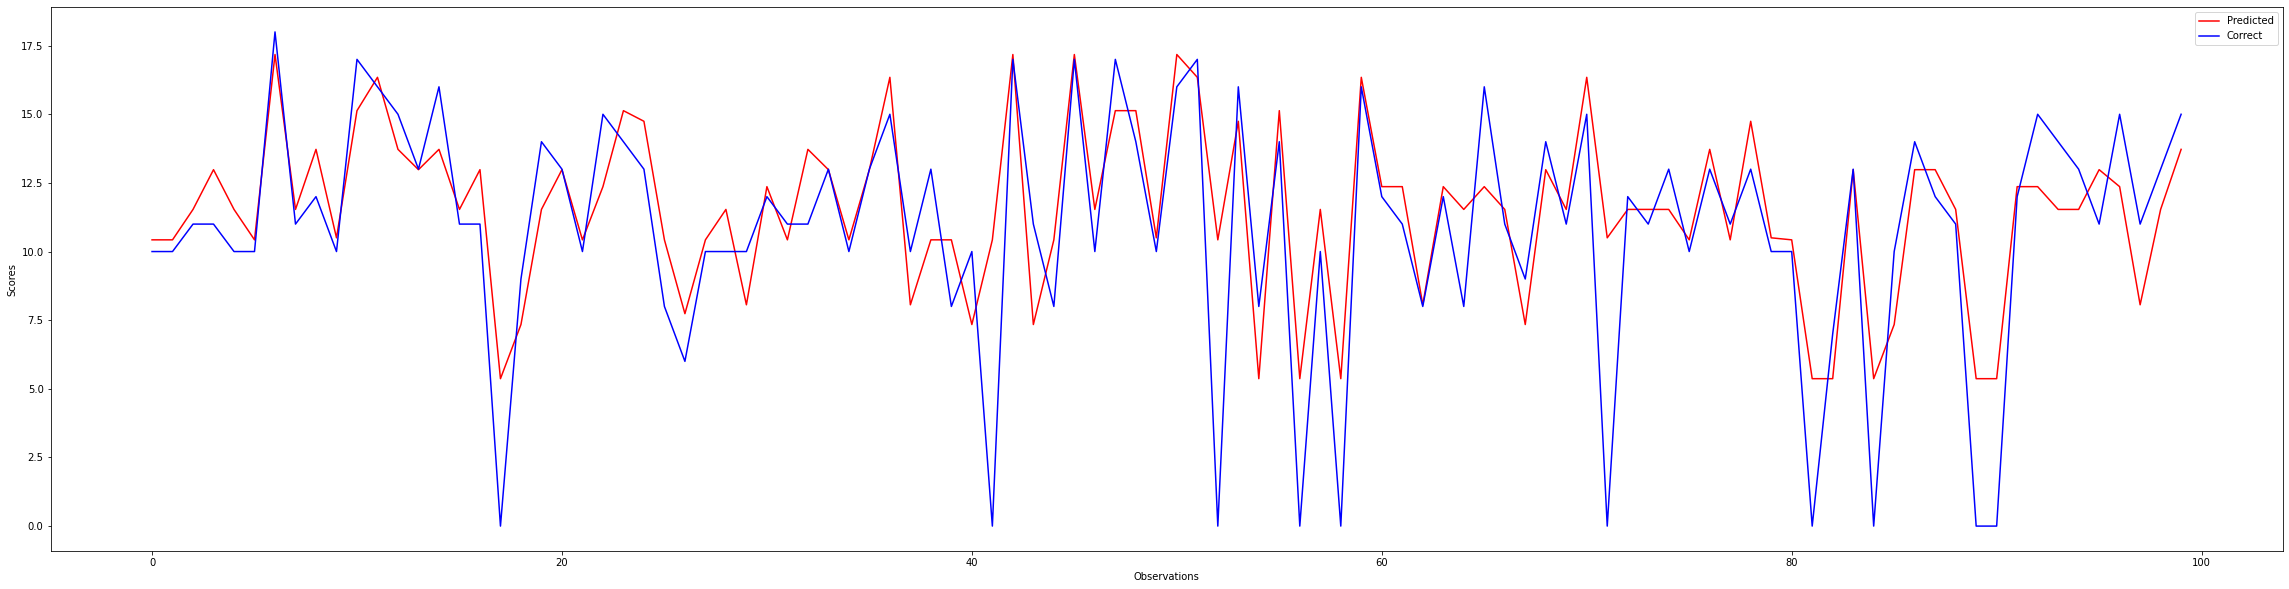

In [209]:
regression_plotter(*decTree(data,G3, 20, 4, 30, shouldPlot = True))

In [51]:
data.columns

Index(['Subject', 'Medu', 'Fedu', 'studytime', 'failures', 'higher', 'G1',
       'Ualc', 'reason_reputation'],
      dtype='object')

Без G1

In [210]:
z = decTree(data.drop(columns = 'G1'), G3, 10, 2, 2)

best_d = 2
best_split = 2
# смотрим, для какой глубины дерева и числа элементов для разделения будет лучший кф. детерминации
for i in range(4, 50, 2):
    for j in range (2,50,2):
        x = decTree(data.drop(columns = 'G1'), G3, 20, i, j)
        if x[3] > z[3]:
            z = x
            best_d = i
            best_split = j
            
print('best_d:', best_d)
print('best_split:', best_split)

best_d: 4
best_split: 40


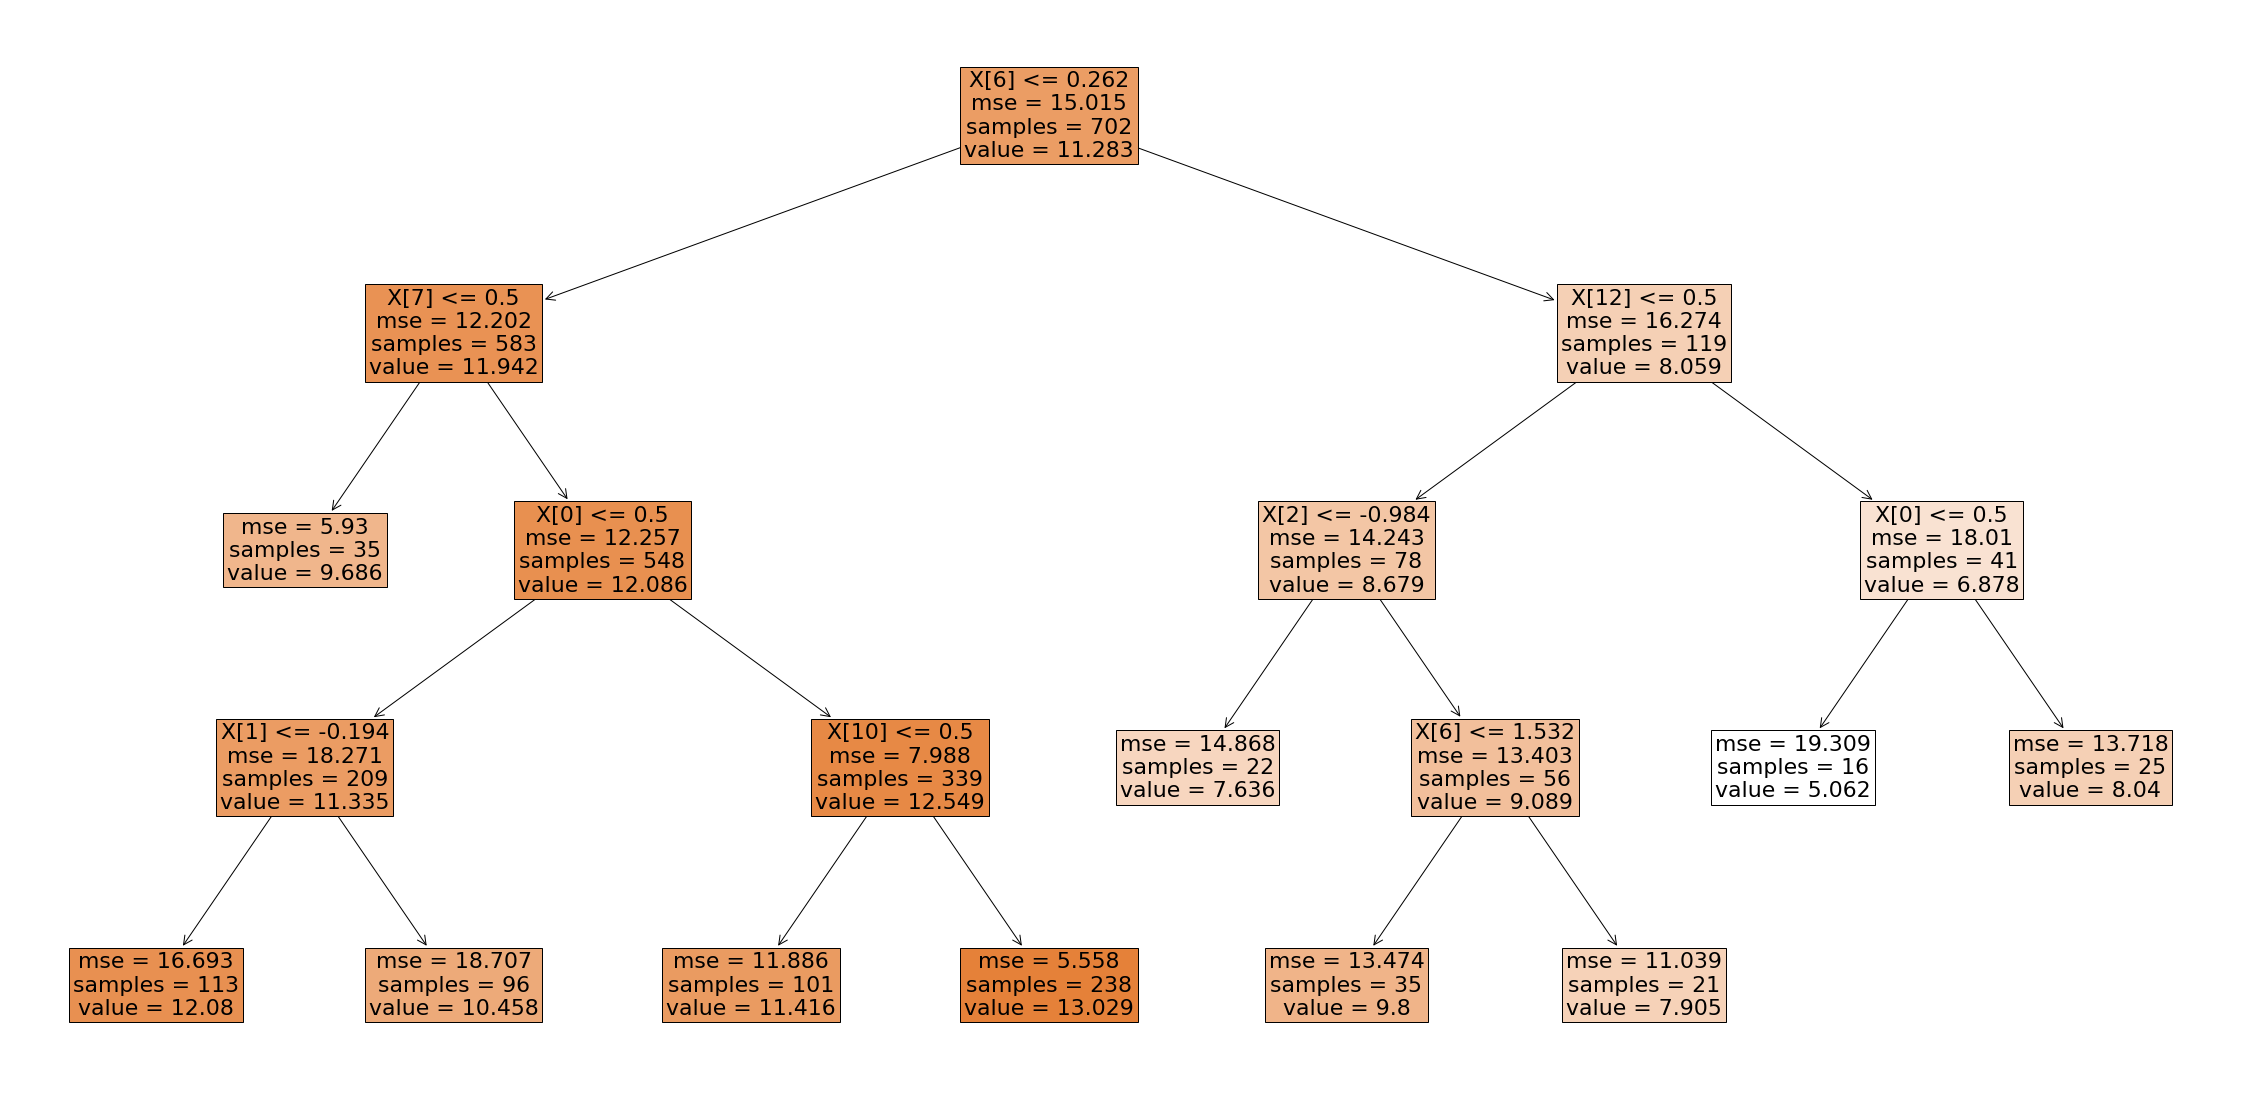

0 : [16, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [1, 0]
5 : [0, 1]
6 : [7, 0]
7 : [4, 0]
8 : [13, 6]
9 : [14, 0]
10 : [27, 17]
11 : [30, 7]
12 : [26, 5]
13 : [17, 22]
14 : [32, 0]
15 : [24, 0]
16 : [15, 0]
17 : [10, 0]
18 : [7, 0]
19 : [1, 0]
20 : [0, 0]
wrong: 244
right: 58
cf: 19.205298013245034 %
Metrics:
Среднеквадратичная ошибка: 12.682711655205553
Корень среднеквадратичной ошибки: 3.5566229688502995
Средняя абсолютная ошибка: 2.619897756331858
Кф детерминации: 0.1349529513414932


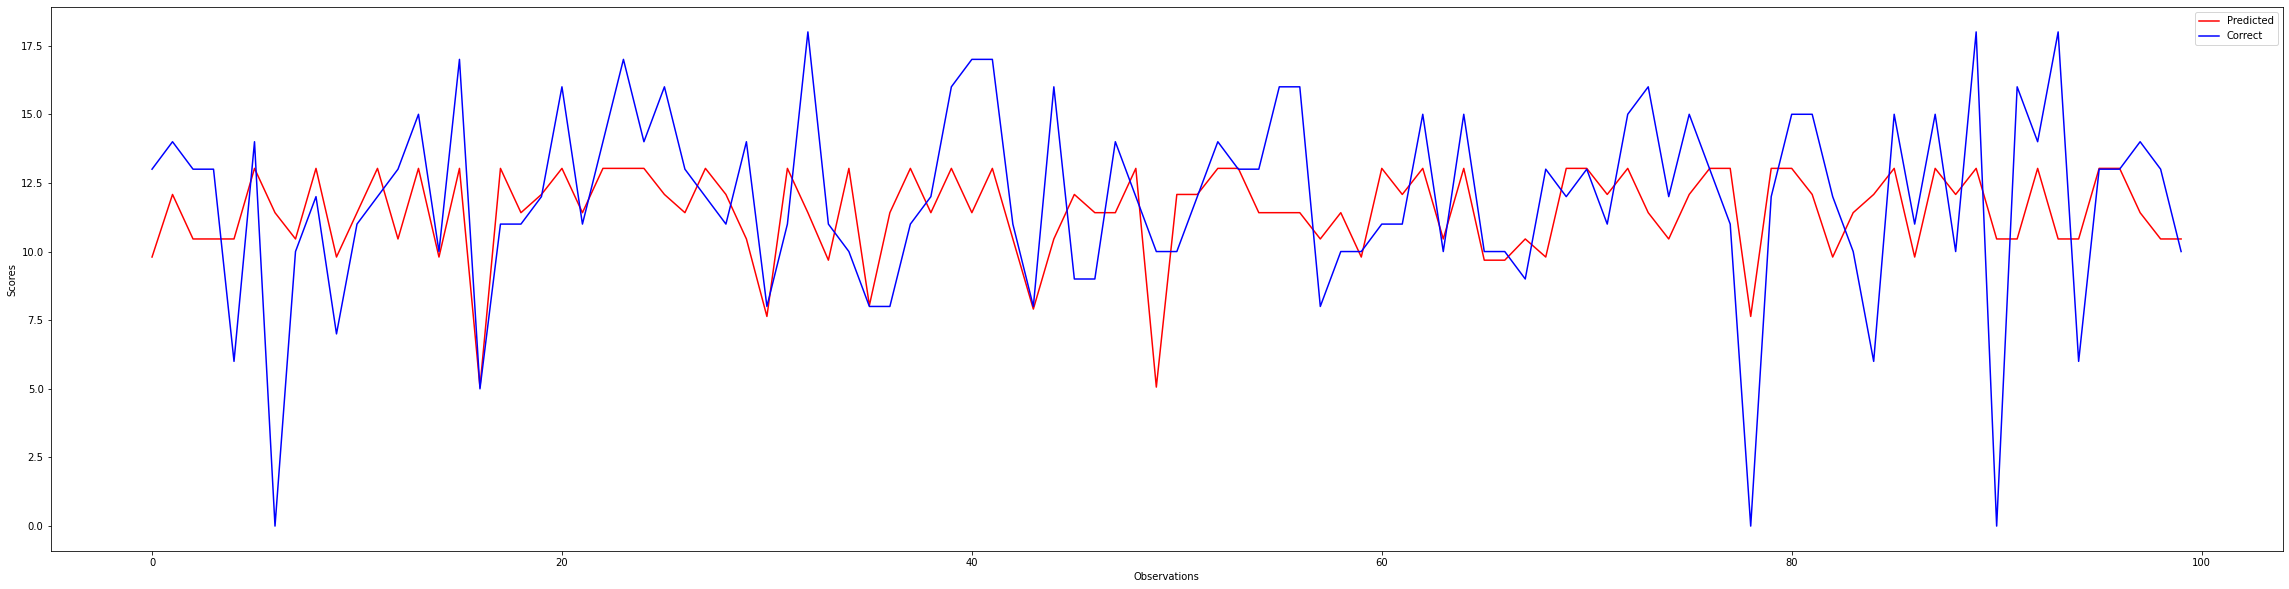

In [212]:
regression_plotter(*decTree(data.drop(columns = 'G1'),G3, 50, 4, 40, shouldPlot = True))

In [219]:
data.drop(columns='G1').columns

Index(['Subject', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'higher', 'internet', 'Ualc', 'school_GP', 'school_MS', 'address_R',
       'address_U', 'Mjob_at_home', 'reason_reputation'],
      dtype='object')

### Дата для регрессий

In [214]:
z = decTree(regData, regDataG3, 10, 2, 2)

best_d = 2
best_split = 2
# смотрим, для какой глубины дерева и числа элементов для разделения будет лучший кф. детерминации
for i in range(4, 10, 2):
    for j in range (10,50,2):
        x = decTree(regData, regDataG3, 20, i, j)
        if x[3] > z[3]:
            z = x
            best_d = i
            best_split = j
            
print('best_d:', best_d)
print('best_split:', best_split)

best_d: 4
best_split: 22


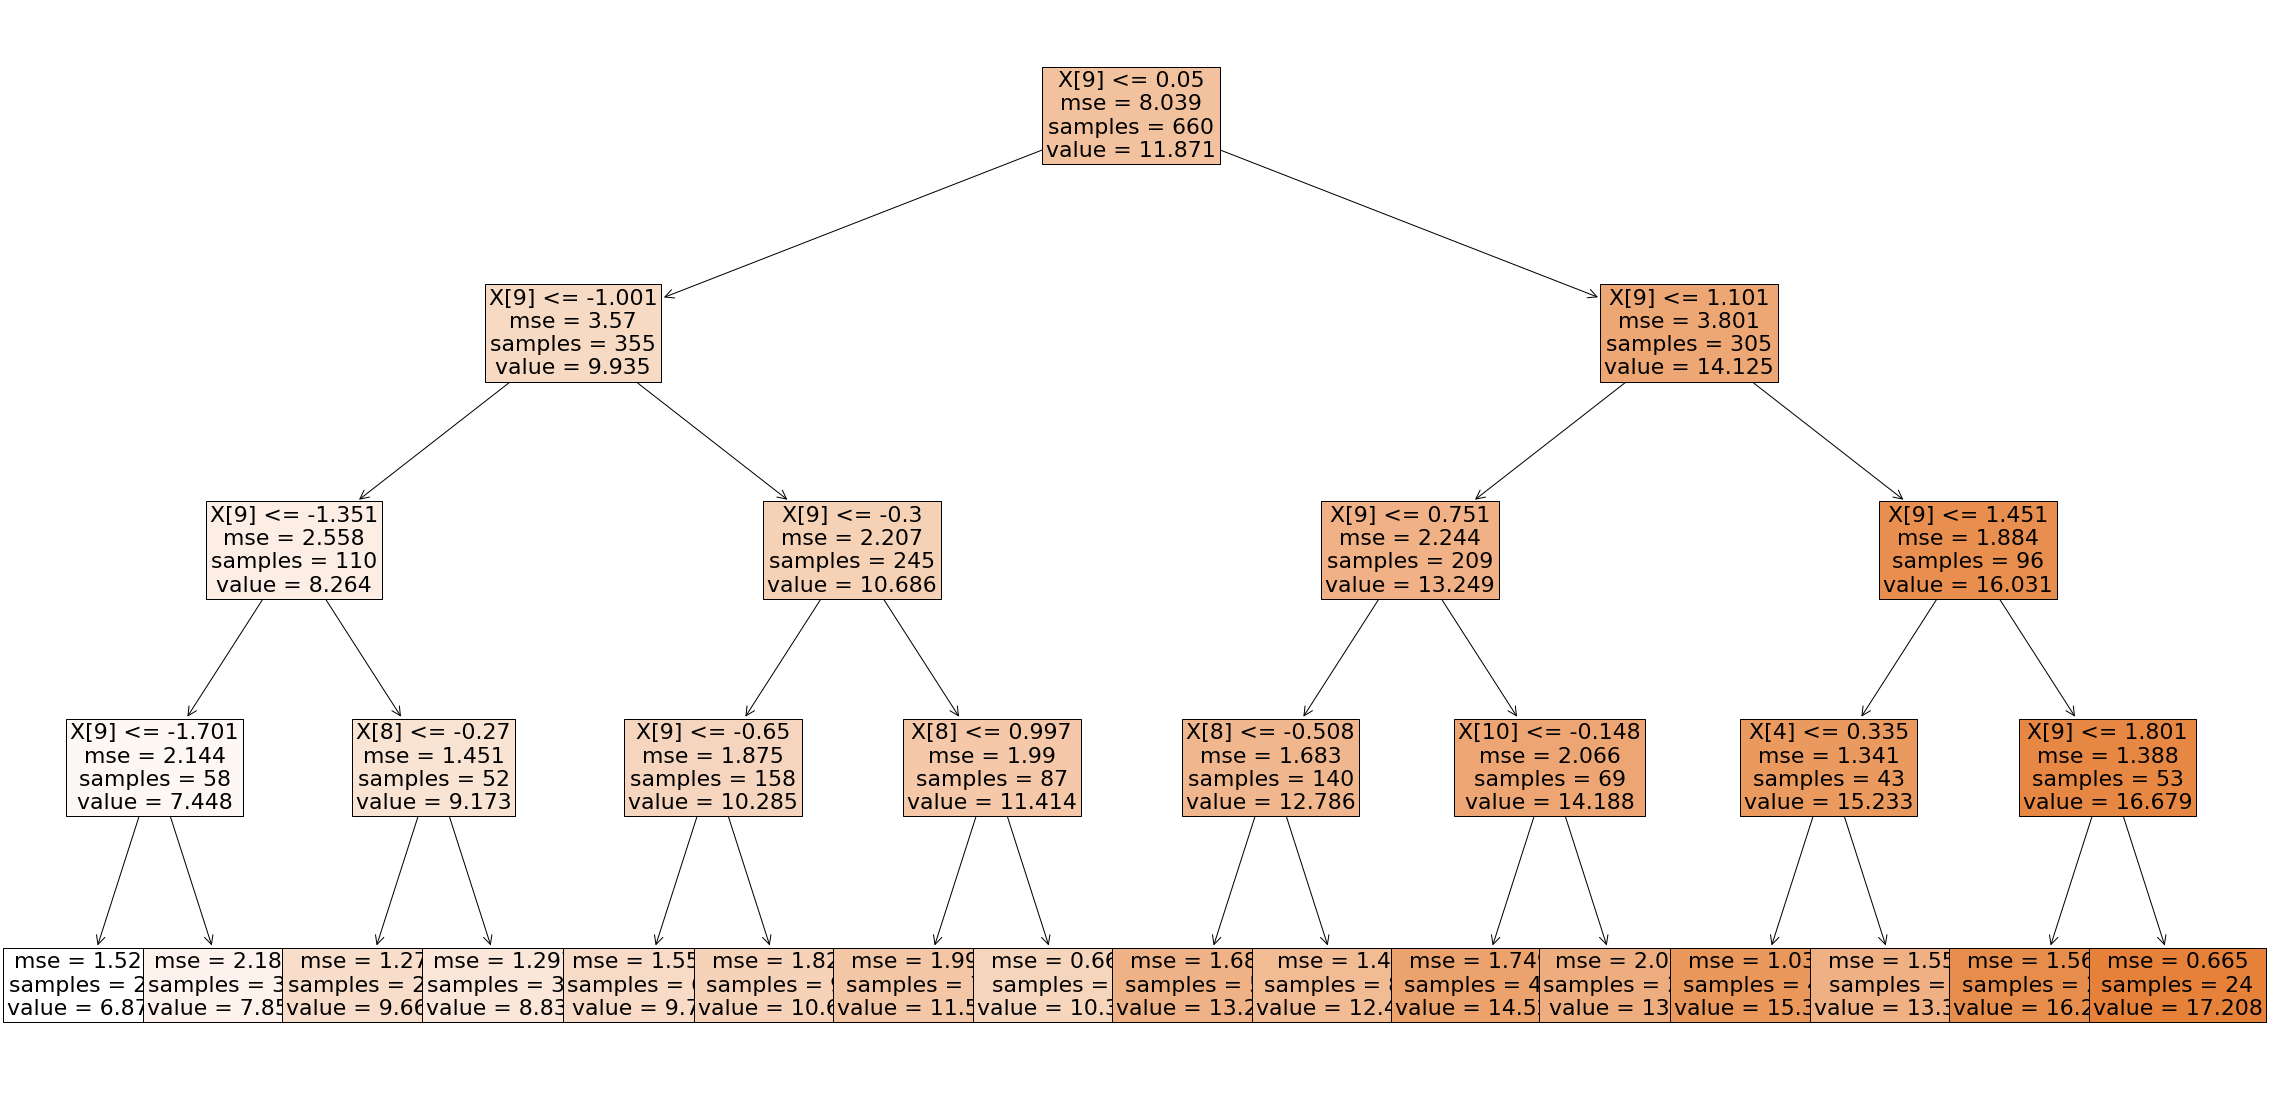

0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [2, 0]
6 : [4, 0]
7 : [6, 1]
8 : [13, 4]
9 : [18, 3]
10 : [34, 9]
11 : [39, 8]
12 : [17, 15]
13 : [12, 9]
14 : [31, 1]
15 : [14, 9]
16 : [13, 3]
17 : [9, 1]
18 : [9, 0]
19 : [0, 0]
20 : [0, 0]
wrong: 221
right: 63
cf: 22.183098591549296 %
Metrics:
Среднеквадратичная ошибка: 1.9930734109887618
Корень среднеквадратичной ошибки: 1.4104082906205175
Средняя абсолютная ошибка: 1.122769549339162
Кф детерминации: 0.7478026148968717


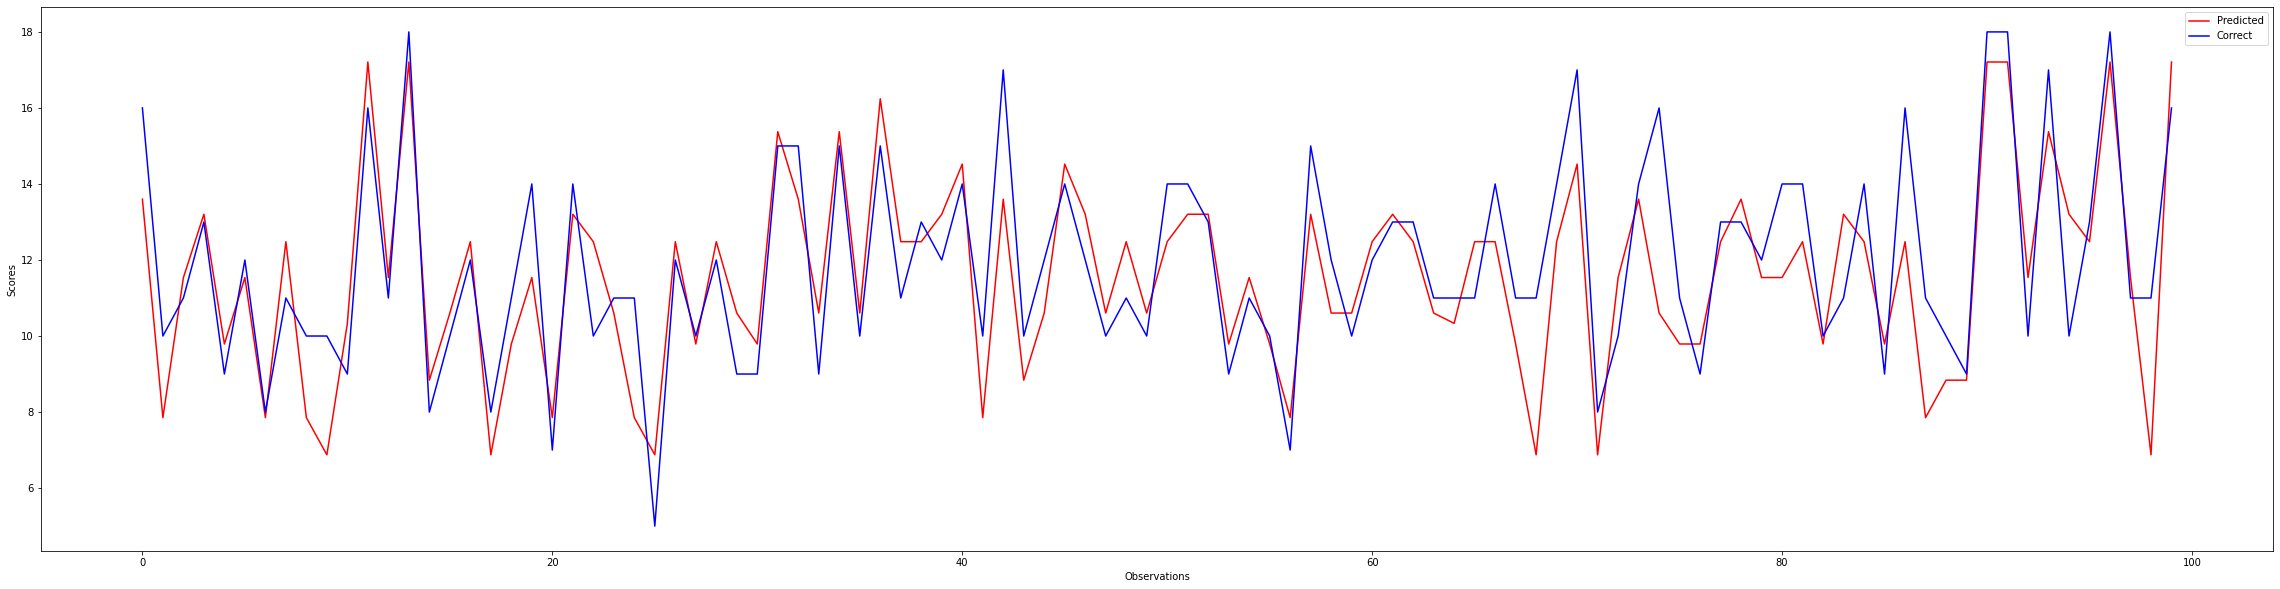

In [215]:
regression_plotter(*decTree(regData,regDataG3, 50, 4, 22, shouldPlot = True))

In [217]:
z = decTree(regData.drop(columns='G1'), regDataG3, 10, 2, 2)

best_d = 2
best_split = 2
# смотрим, для какой глубины дерева и числа элементов для разделения будет лучший кф. детерминации
for i in range(4, 50, 2):
    for j in range (20,50,2):
        x = decTree(regData.drop(columns='G1'), regDataG3, 20, i, j)
        if x[3] > z[3]:
            z = x
            best_d = i
            best_split = j
            
print('best_d:', best_d)
print('best_split:', best_split)

best_d: 44
best_split: 48


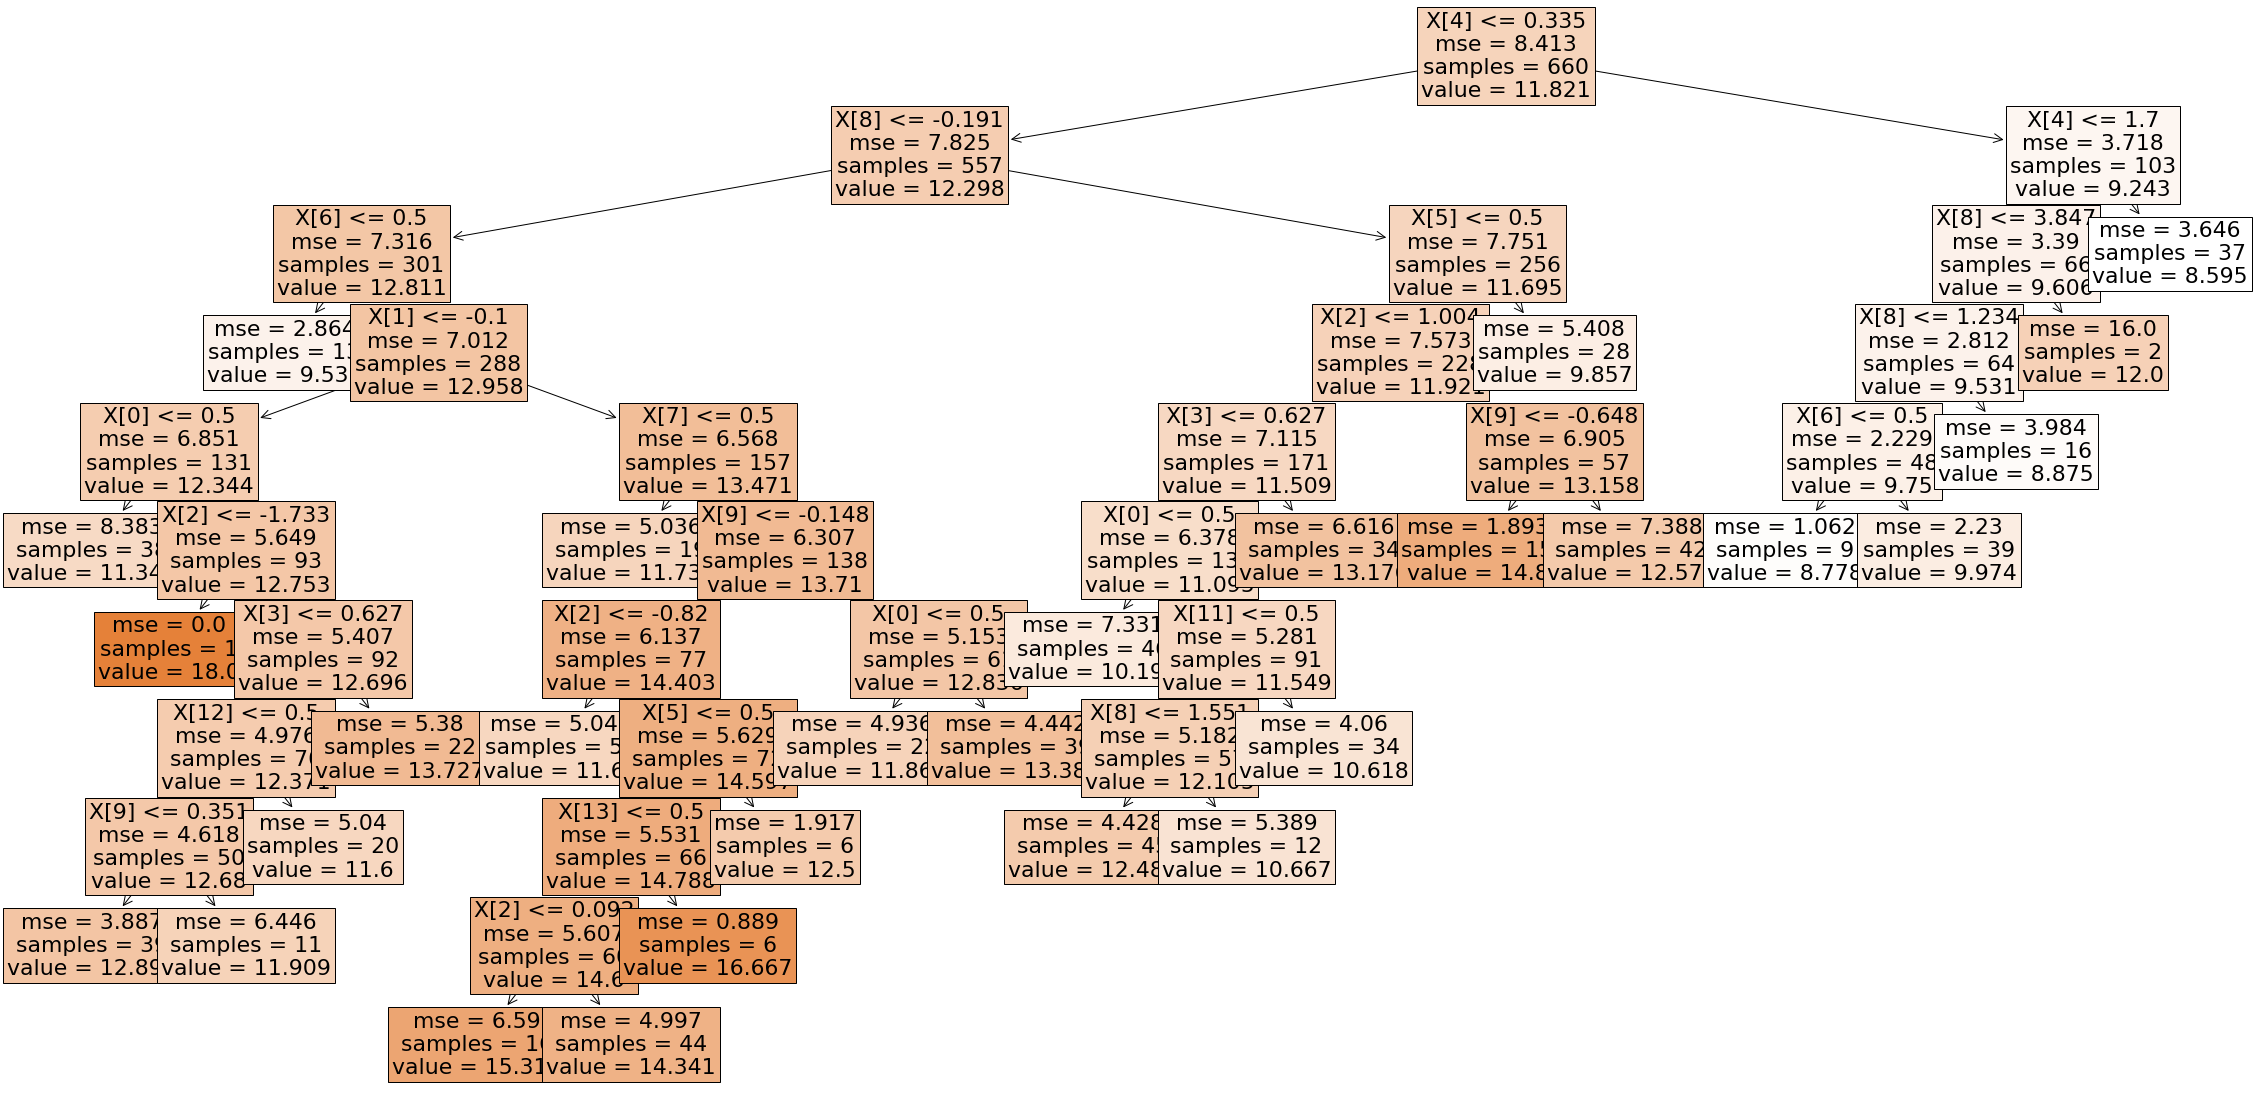

0 : [0, 0]
1 : [0, 0]
2 : [0, 0]
3 : [0, 0]
4 : [0, 0]
5 : [1, 0]
6 : [3, 0]
7 : [6, 0]
8 : [15, 0]
9 : [14, 4]
10 : [28, 9]
11 : [42, 8]
12 : [32, 3]
13 : [28, 14]
14 : [18, 4]
15 : [20, 2]
16 : [16, 0]
17 : [7, 0]
18 : [10, 0]
19 : [0, 0]
20 : [0, 0]
wrong: 240
right: 44
cf: 15.492957746478872 %
Metrics:
Среднеквадратичная ошибка: 6.95687372036503
Корень среднеквадратичной ошибки: 2.635080074880368
Средняя абсолютная ошибка: 2.077741466014294
Кф детерминации: 0.1419404584881624


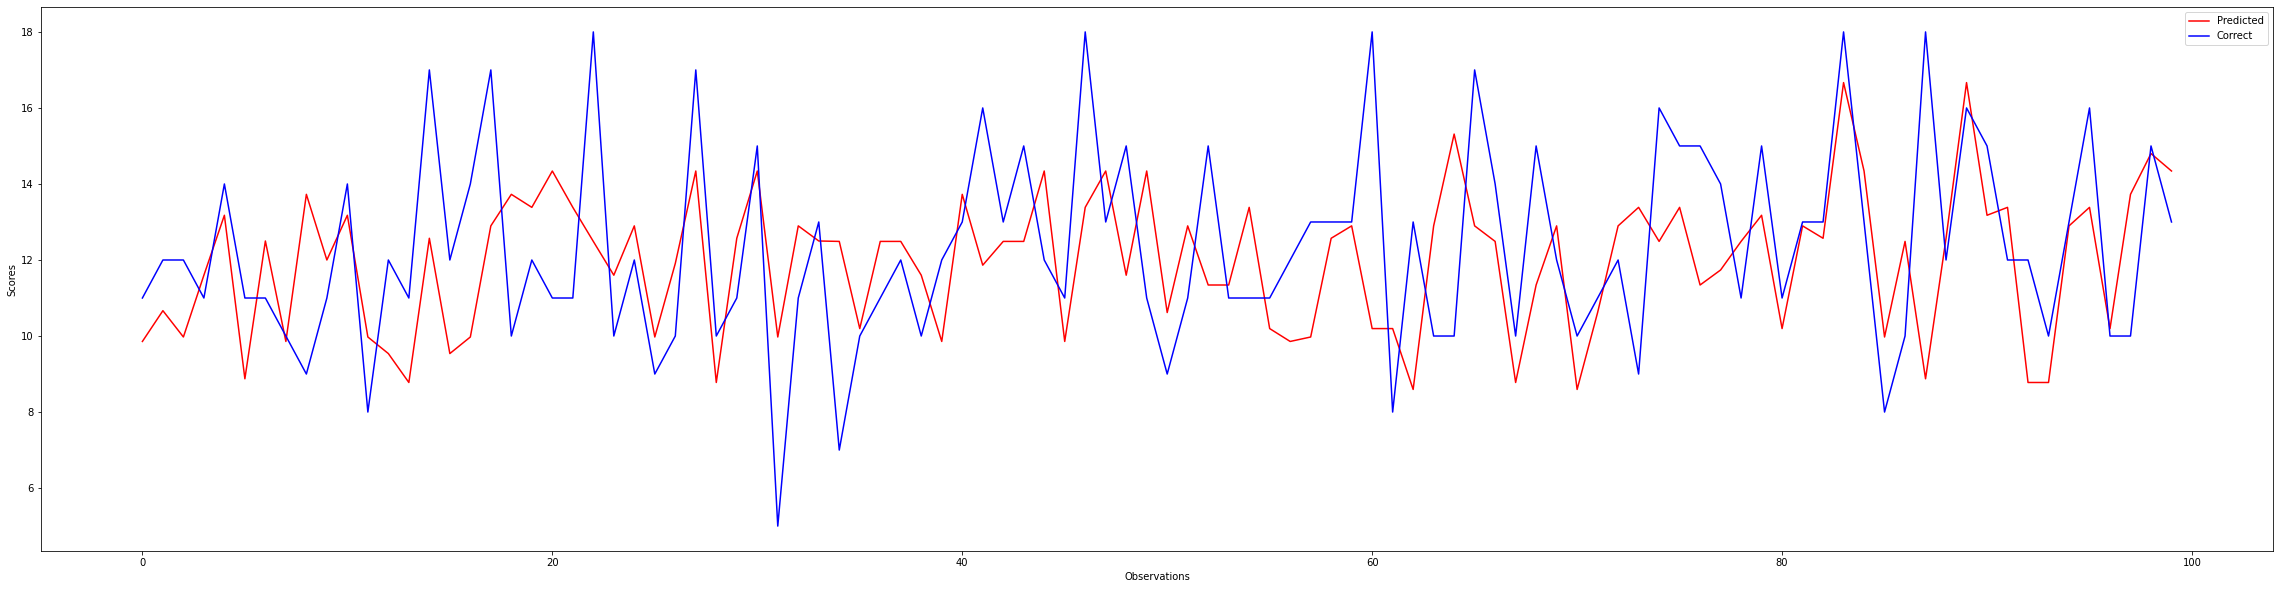

In [218]:
regression_plotter(*decTree(regData.drop(columns='G1'),regDataG3, 50, 44, 48, shouldPlot = True))

####  Анализ для деревьев показал, что очищенные от выбросов (с оценкой 0) данные чуть лучше для предсказаний. Однако для предсказаний без G1 дерево работает так же плохо как и остальные методы
#### Также стоит отметить, что для данных с оценкой 0 лучшей глубиной стала 4  в обоих случаях, причем для данных без G1 определяющим критерием был признак failures

## Часть 3. Классификация

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


### Далее будем использовать датафрейм с оценками-выбросами, так как 0 составляют значительную часть оценок < 8

In [220]:
binG3 = G3.apply(lambda x: x >=8 )

Сначала определим долю сдач и незачетов

In [221]:
pos = binG3[binG3 == True].shape[0]
total = binG3.shape[0]

print("Всего:", total)
print("Положительных:", pos)
print("Отрицательных:", total - pos)
print("Доля положительных:" , pos/total)

Всего: 1004
Положительных: 906
Отрицательных: 98
Доля положительных: 0.9023904382470119


Это значит, что наша модель должны выдавать результат >= 91%

In [222]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [223]:
def plot_rocauc(x, probs):
    fpr, tpr, threshold = roc_curve(x, probs)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'auc: ' + str(round(roc_auc, 2 )))
    plt.plot([0, 1], [0, 1],'g--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC')
    plt.legend(loc = 'lower right')
    plt.show()

In [224]:
def logistic_regression(df, var, num_shuffles):
    for i in range (num_shuffles):       
        x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)
        
        model = LogisticRegression()
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        display(pd.DataFrame(confusion_matrix(y_test, y_predicted)))
        print(classification_report(y_test, y_predicted))

        plot_rocauc(y_test, model.predict_proba(x_test)[:,1])
        

0    1
0  4   27
1  3  268

              precision    recall  f1-score   support

       False       0.57      0.13      0.21        31
        True       0.91      0.99      0.95       271

    accuracy                           0.90       302
   macro avg       0.74      0.56      0.58       302
weighted avg       0.87      0.90      0.87       302



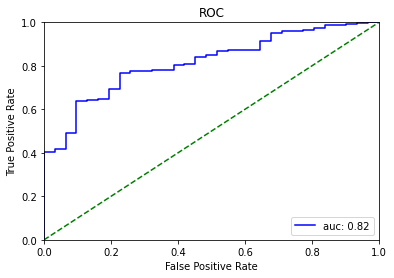

0    1
0  3   18
1  4  277

              precision    recall  f1-score   support

       False       0.43      0.14      0.21        21
        True       0.94      0.99      0.96       281

    accuracy                           0.93       302
   macro avg       0.68      0.56      0.59       302
weighted avg       0.90      0.93      0.91       302



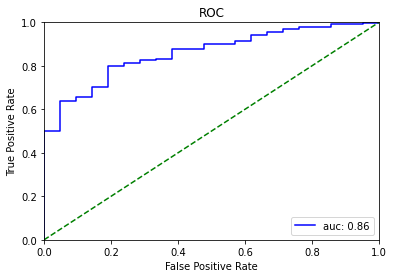

0    1
0  4   23
1  4  271

              precision    recall  f1-score   support

       False       0.50      0.15      0.23        27
        True       0.92      0.99      0.95       275

    accuracy                           0.91       302
   macro avg       0.71      0.57      0.59       302
weighted avg       0.88      0.91      0.89       302



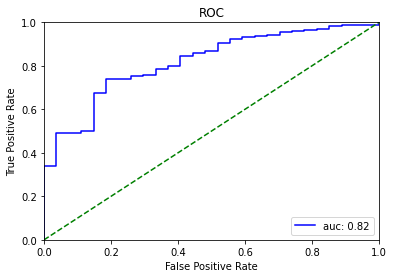

In [231]:
logistic_regression(data.drop(columns='G1'), binG3, 3)

Заметим, что все оценки на очень высоком уровне, а также кривая roc значительно выше прямой fpr = tpr на всех графиках. Хотя precision чуть отстает от остальных, это не так страшно , ведь лучше поставить двоешнику хорошую оценку, чем старающемуся ученику незачет. 
accuracy ~ 91 говорит о том, что пользуясь моделью, мы будем угадывать чуть больше, чем если бы мы всегда говорили студенту что экзамен сдан

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

In [233]:
def binaryKNN(df, var):
    x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)
    kf = KFold(n_splits=5, shuffle=True)
    gsv = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1, 50, 1)} , cv=kf, scoring='f1')
    gsv.fit(df, var)
    
    model = KNeighborsClassifier(n_neighbors=gsv.best_params_.get("n_neighbors"))
    
    model.fit(x_train, y_train)
    
    y_predicted = model.predict(x_test)

    display(pd.DataFrame(confusion_matrix(y_test, y_predicted)))
    print(classification_report(y_test, y_predicted))

    
    plot_rocauc(y_test, model.predict_proba(x_test)[:,1])

0    1
0  0   33
1  0  269

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        33
        True       0.89      1.00      0.94       269

    accuracy                           0.89       302
   macro avg       0.45      0.50      0.47       302
weighted avg       0.79      0.89      0.84       302



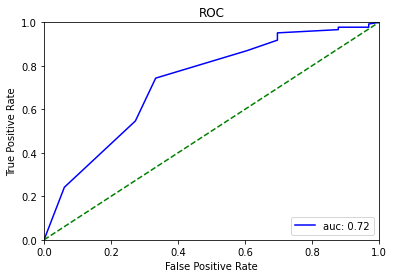

In [234]:
binaryKNN(data.drop(columns='G1'), binG3)

# Radius Classifier

In [241]:
def binaryRNN(df, var, num_shuffles):
    x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.7, shuffle = True)
    
    kf = KFold(n_splits=num_shuffles, shuffle=True)
    gsv = GridSearchCV(RadiusNeighborsClassifier(), {'radius': np.arange(43, 50, 1)/10} , cv=kf, scoring='f1')
    gsv.fit(x_train, y_train)
    
    model = RadiusNeighborsClassifier(radius=gsv.best_params_.get("radius"))
    
    model.fit(x_train, y_train)

    y_predicted = model.predict(x_test)

    display(pd.DataFrame(confusion_matrix(y_test, y_predicted)))
    print(classification_report(y_test, y_predicted))


    plot_rocauc(y_test, model.predict_proba(x_test)[:,1])

0    1
0  2   69
1  4  628

              precision    recall  f1-score   support

       False       0.33      0.03      0.05        71
        True       0.90      0.99      0.95       632

    accuracy                           0.90       703
   macro avg       0.62      0.51      0.50       703
weighted avg       0.84      0.90      0.85       703



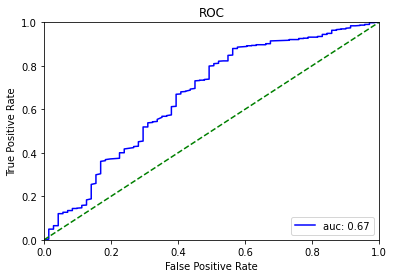

In [242]:
binaryRNN(data.drop(columns='G1'), binG3,50)

В radius nn было специально смещено количество данных с тренировочных к тестируемым, чтобы показать, что confusion matrix работает правильно, так как для маленькой тестовой выборки алгоритм всегда указывал что студент сдал, т.к это являлось оптимальным решением

# Дерево решений

In [243]:
from sklearn.tree import DecisionTreeClassifier

In [257]:
def binaryDTC(df, var, num_shuffles):
    kf = KFold(n_splits=num_shuffles, shuffle=True)
    
    for train_index, test_index in kf.split(df):
        x_train, x_test = df.iloc[train_index], df.iloc[test_index]
        y_train, y_test = var.iloc[train_index], var.iloc[test_index]
               
        model = DecisionTreeClassifier(max_depth = 5)

        model.fit(x_train, y_train)

        y_predicted = model.predict(x_test)

        display(pd.DataFrame(confusion_matrix(y_test, y_predicted)))
        print(classification_report(y_test, y_predicted))

        plt.figure(figsize = (40,20))
        plot_tree(model, filled=True, fontsize=22)
        plt.show()

        plot_rocauc(y_test, model.predict_proba(x_test)[:,1])

0    1
0  4   20
1  4  173

              precision    recall  f1-score   support

       False       0.50      0.17      0.25        24
        True       0.90      0.98      0.94       177

    accuracy                           0.88       201
   macro avg       0.70      0.57      0.59       201
weighted avg       0.85      0.88      0.85       201



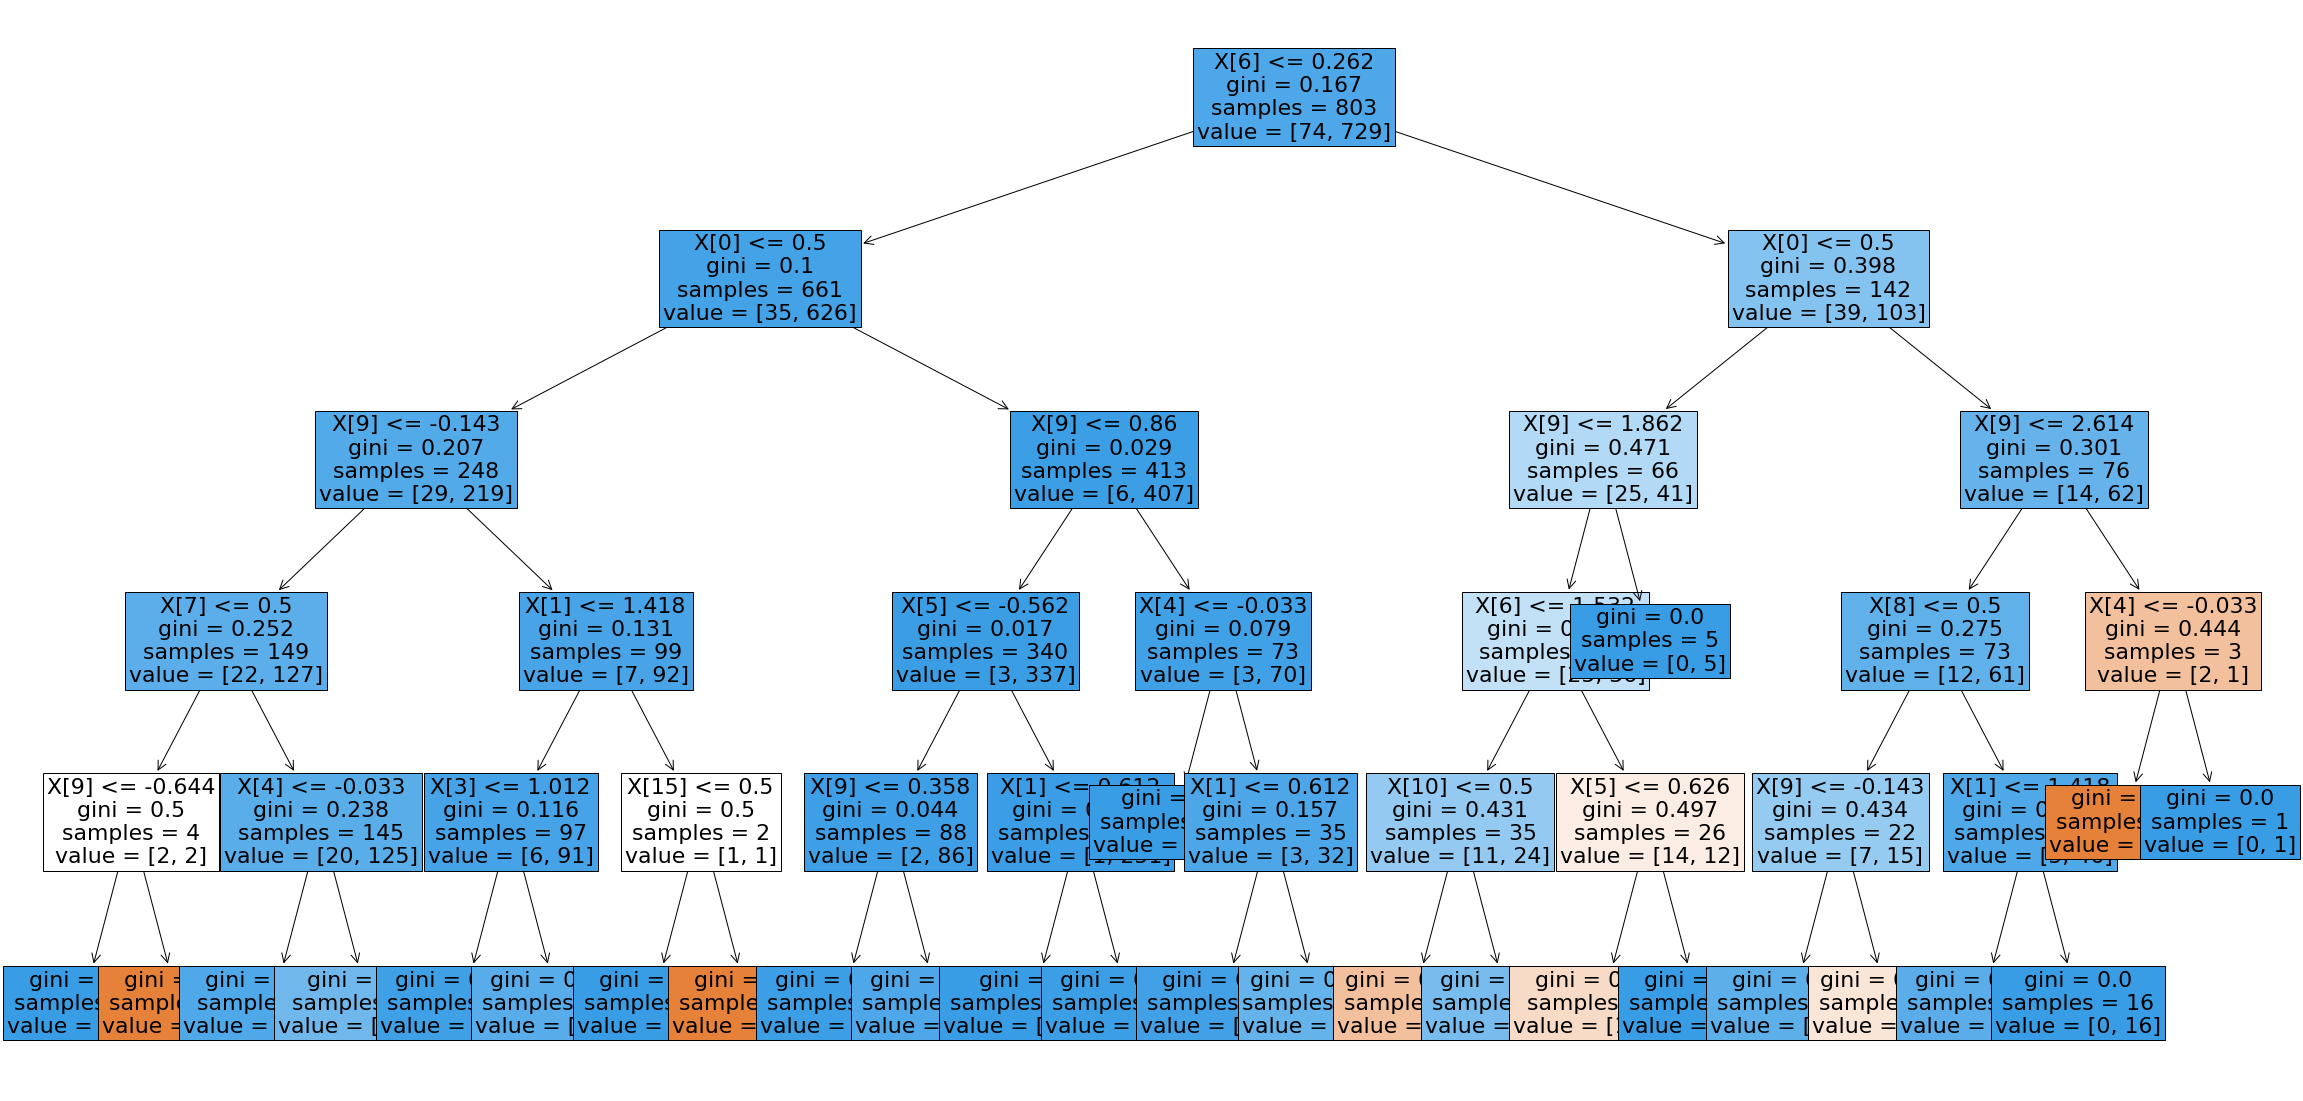

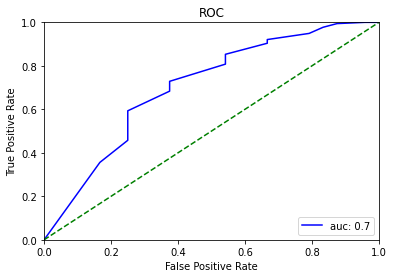

0    1
0  2   14
1  8  177

              precision    recall  f1-score   support

       False       0.20      0.12      0.15        16
        True       0.93      0.96      0.94       185

    accuracy                           0.89       201
   macro avg       0.56      0.54      0.55       201
weighted avg       0.87      0.89      0.88       201



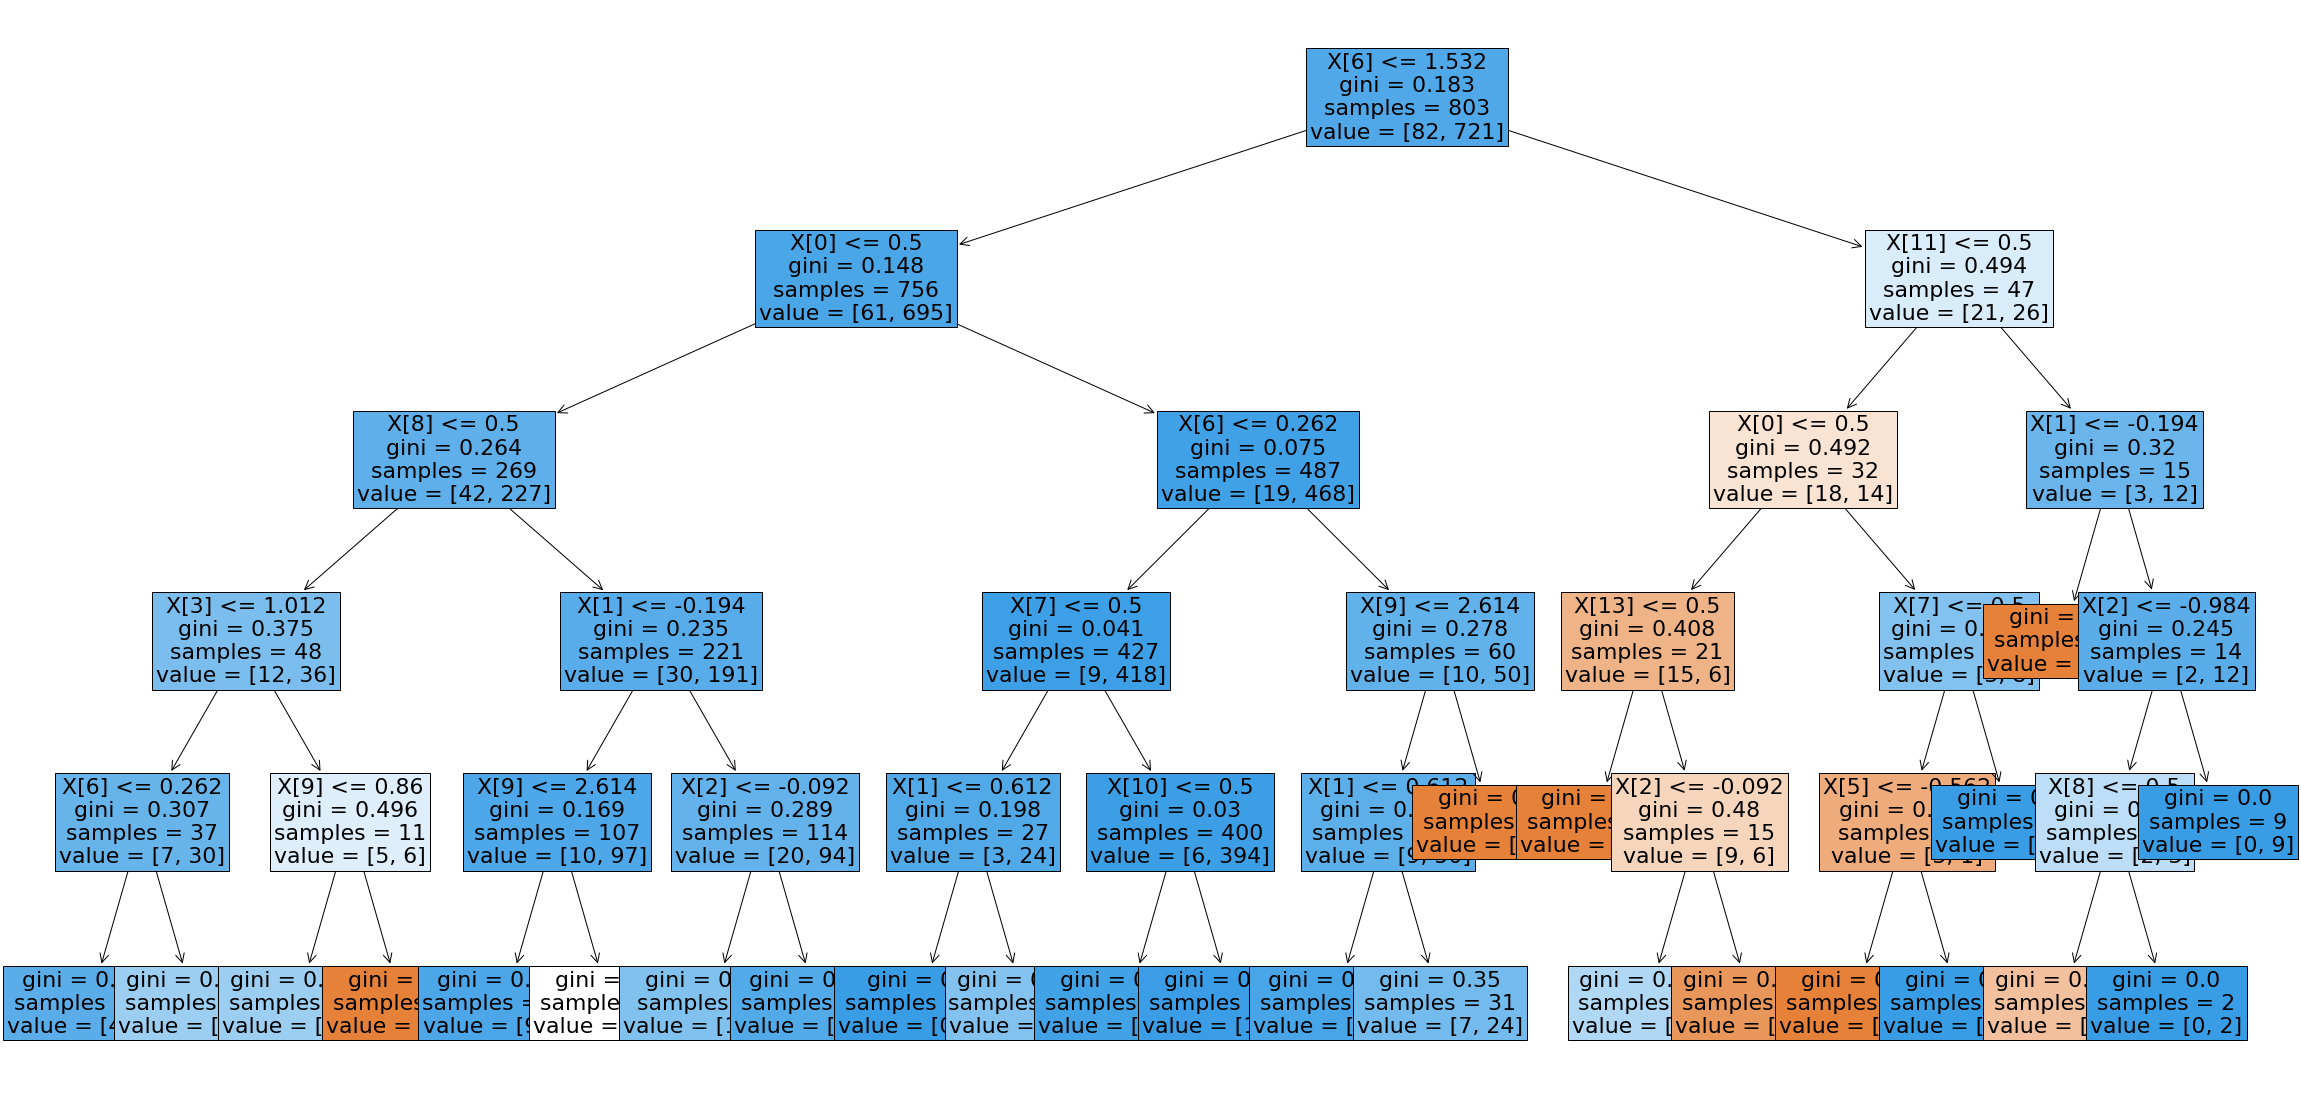

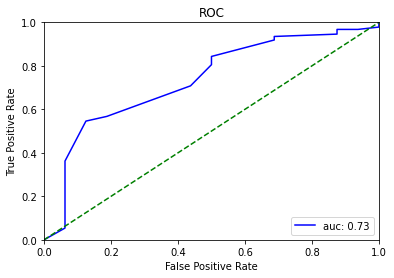

0    1
0  2   16
1  7  176

              precision    recall  f1-score   support

       False       0.22      0.11      0.15        18
        True       0.92      0.96      0.94       183

    accuracy                           0.89       201
   macro avg       0.57      0.54      0.54       201
weighted avg       0.85      0.89      0.87       201



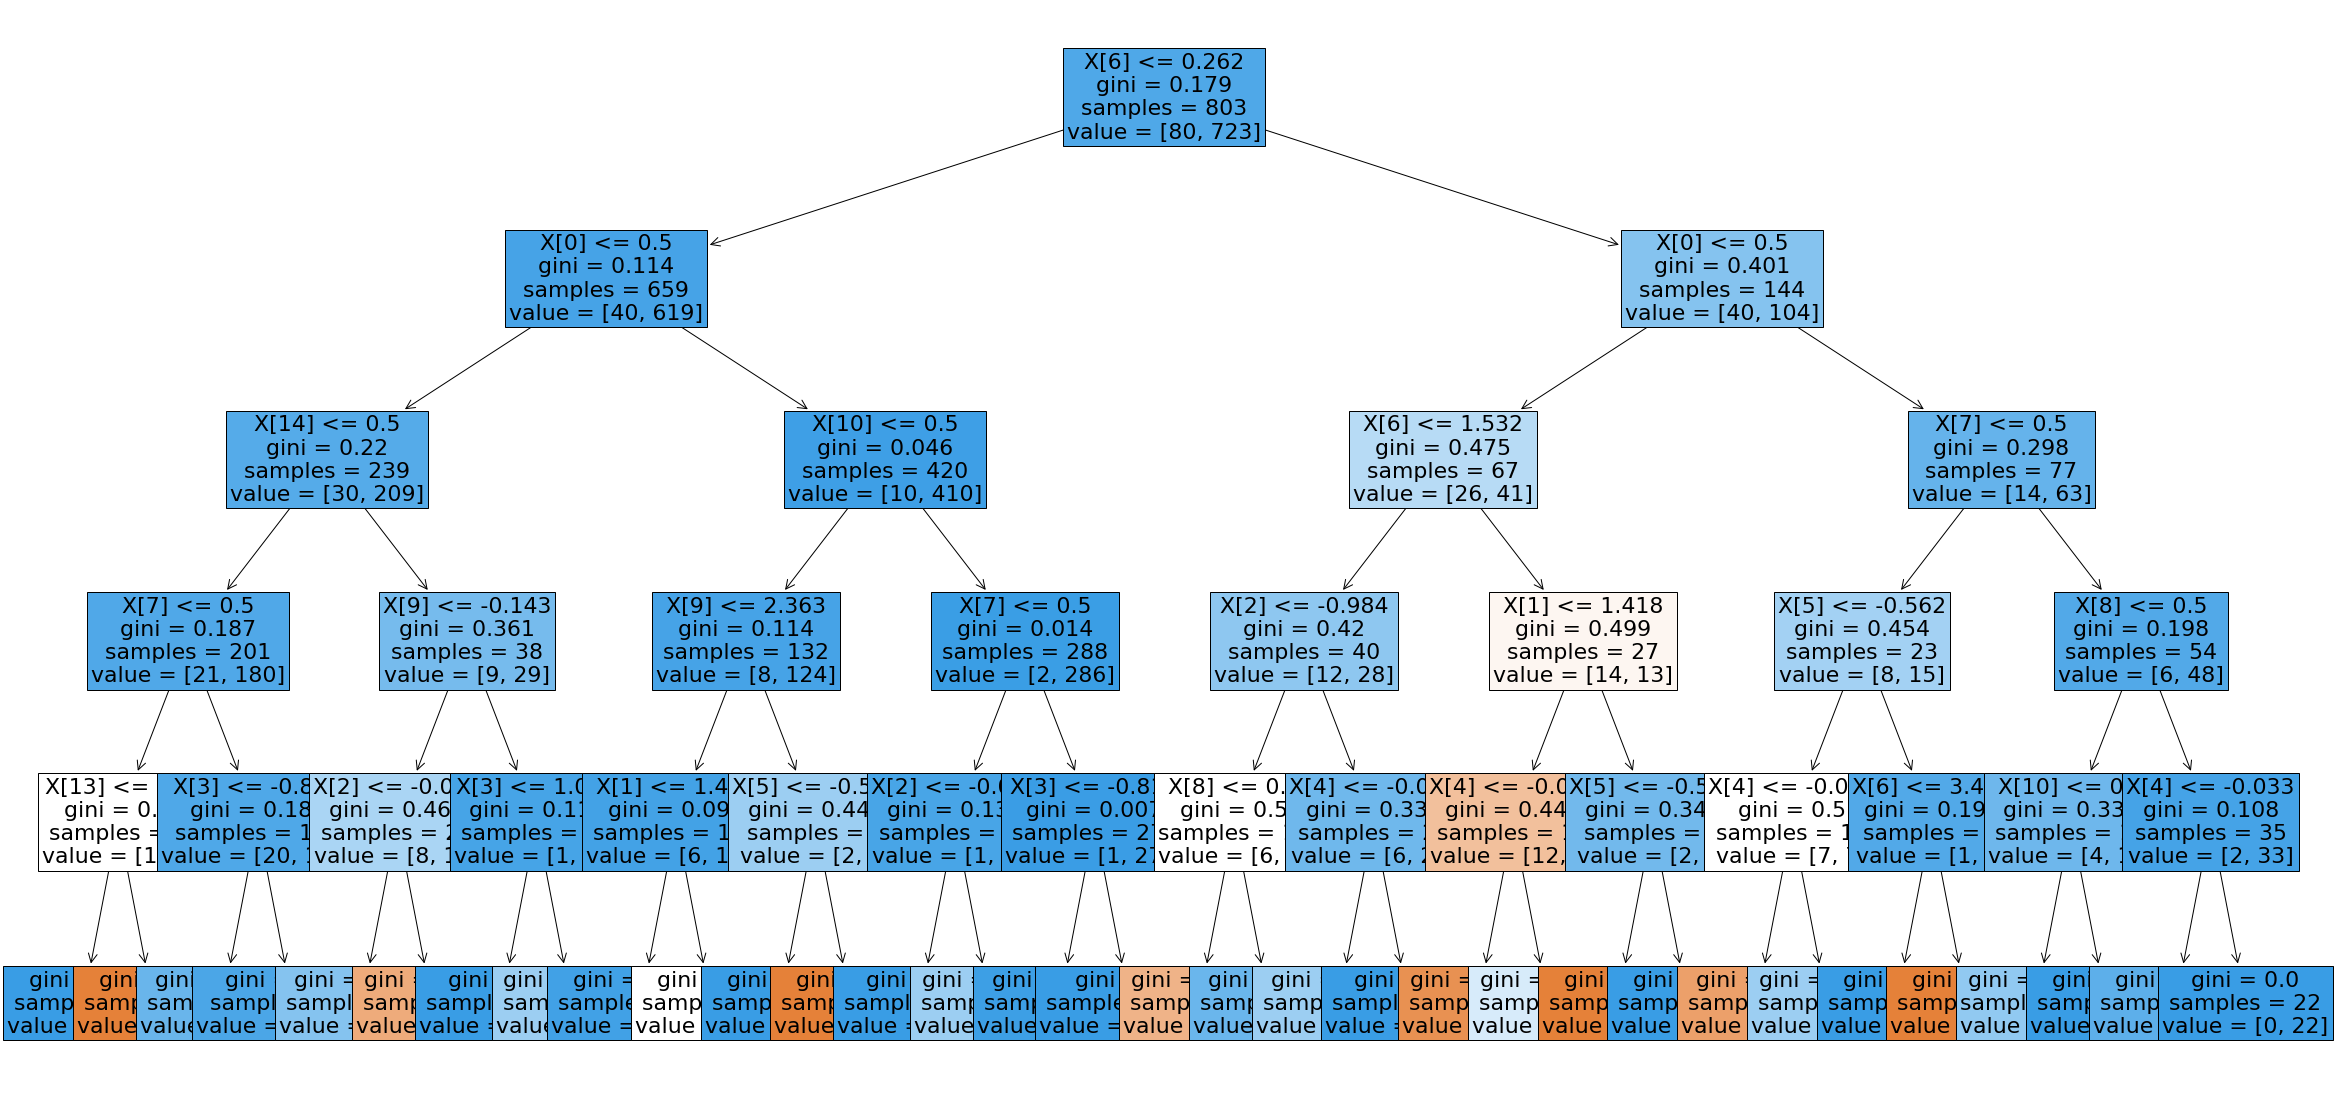

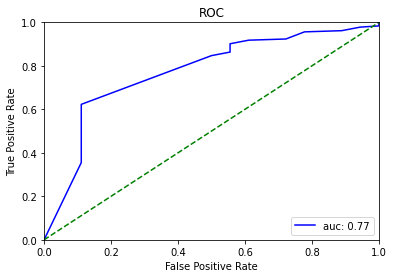

0    1
0   4   15
1  10  172

              precision    recall  f1-score   support

       False       0.29      0.21      0.24        19
        True       0.92      0.95      0.93       182

    accuracy                           0.88       201
   macro avg       0.60      0.58      0.59       201
weighted avg       0.86      0.88      0.87       201



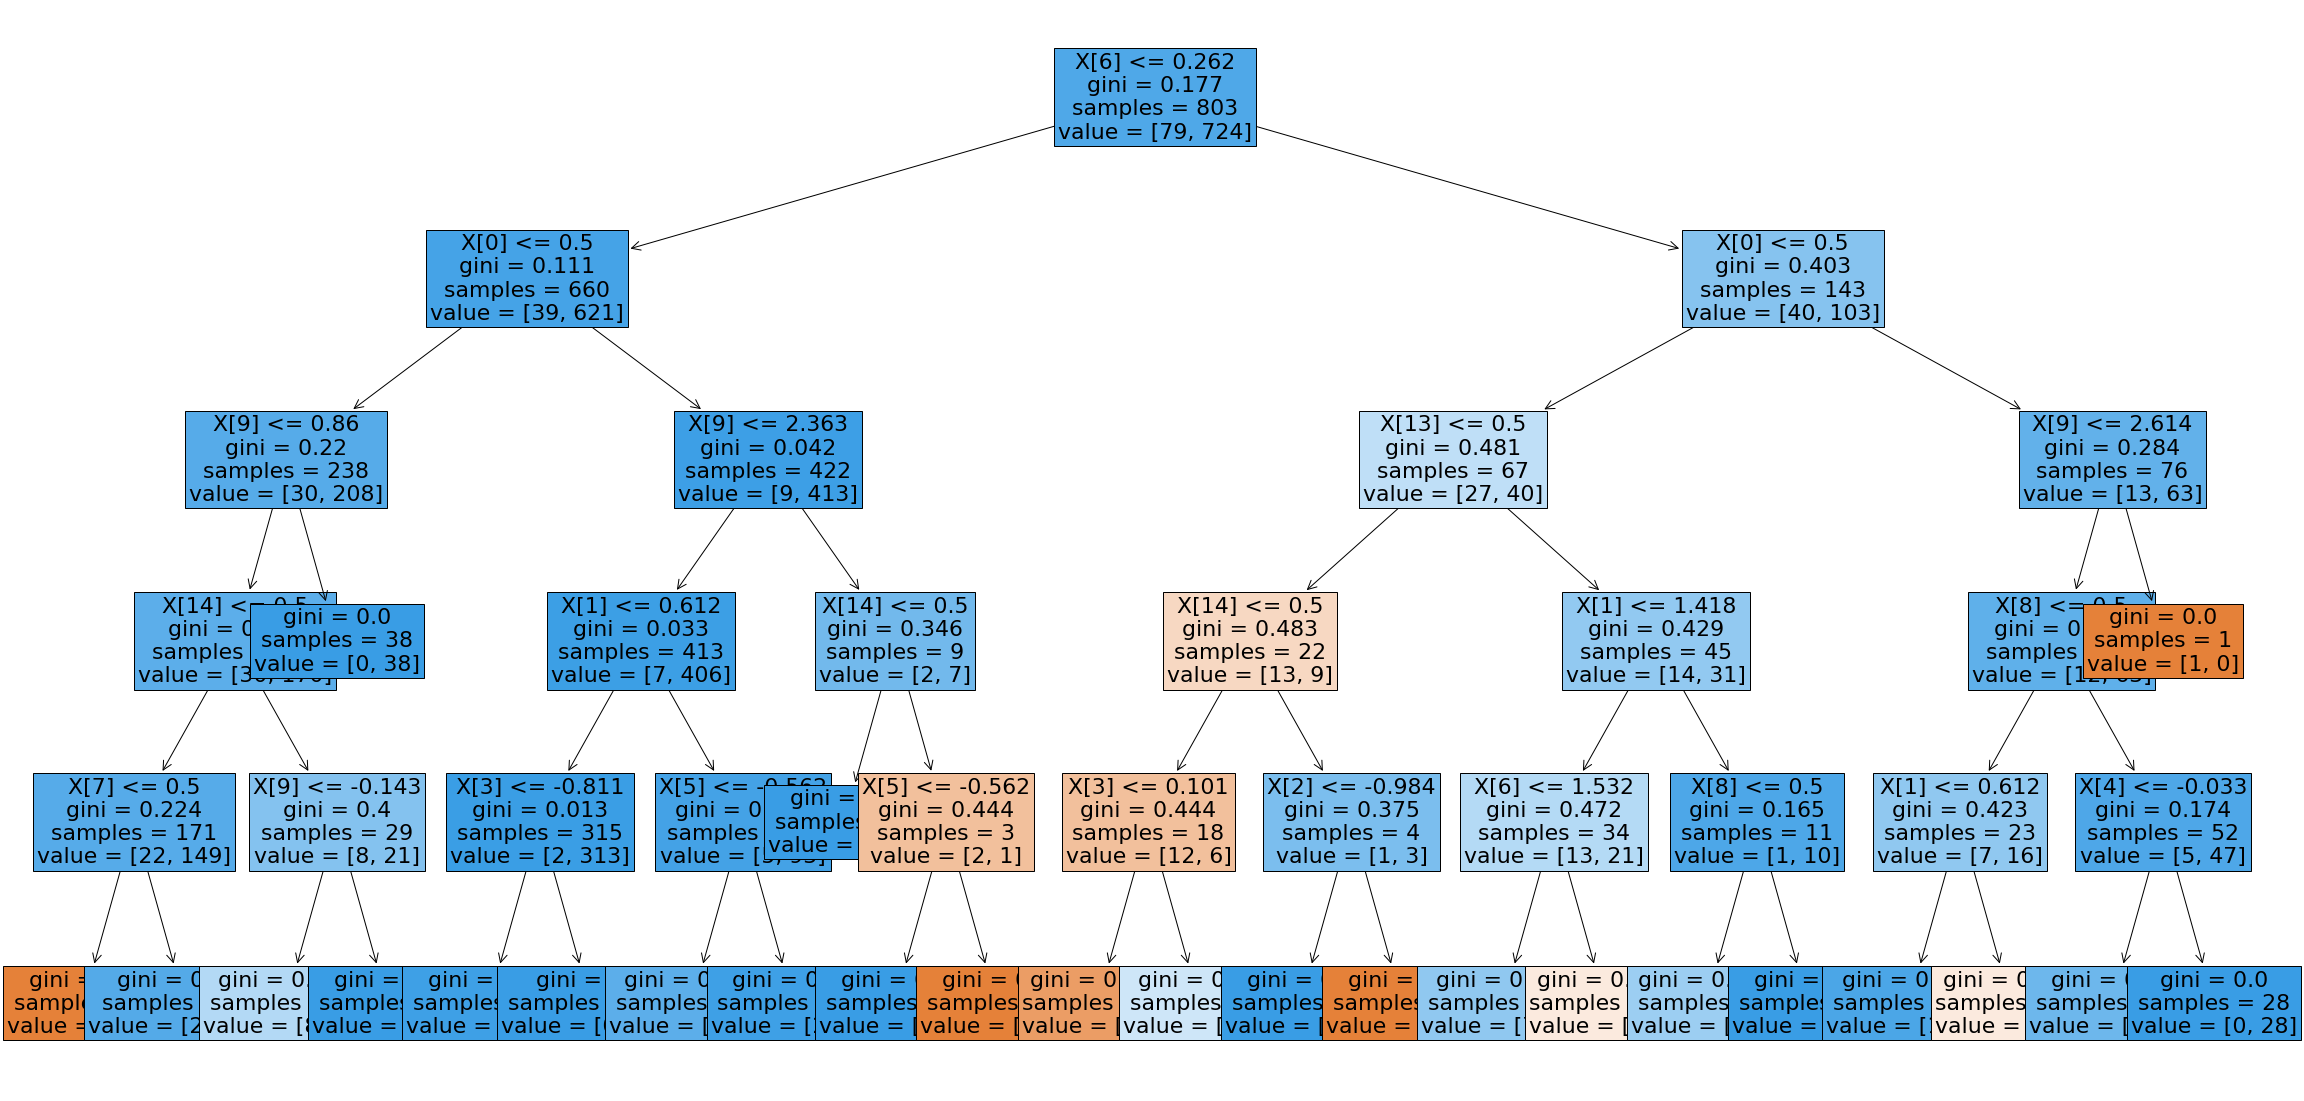

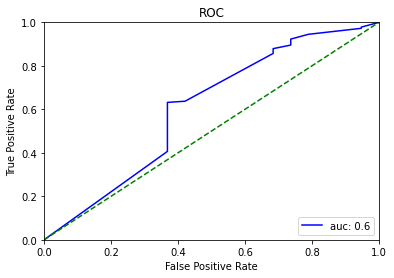

0    1
0  3   18
1  4  175

              precision    recall  f1-score   support

       False       0.43      0.14      0.21        21
        True       0.91      0.98      0.94       179

    accuracy                           0.89       200
   macro avg       0.67      0.56      0.58       200
weighted avg       0.86      0.89      0.86       200



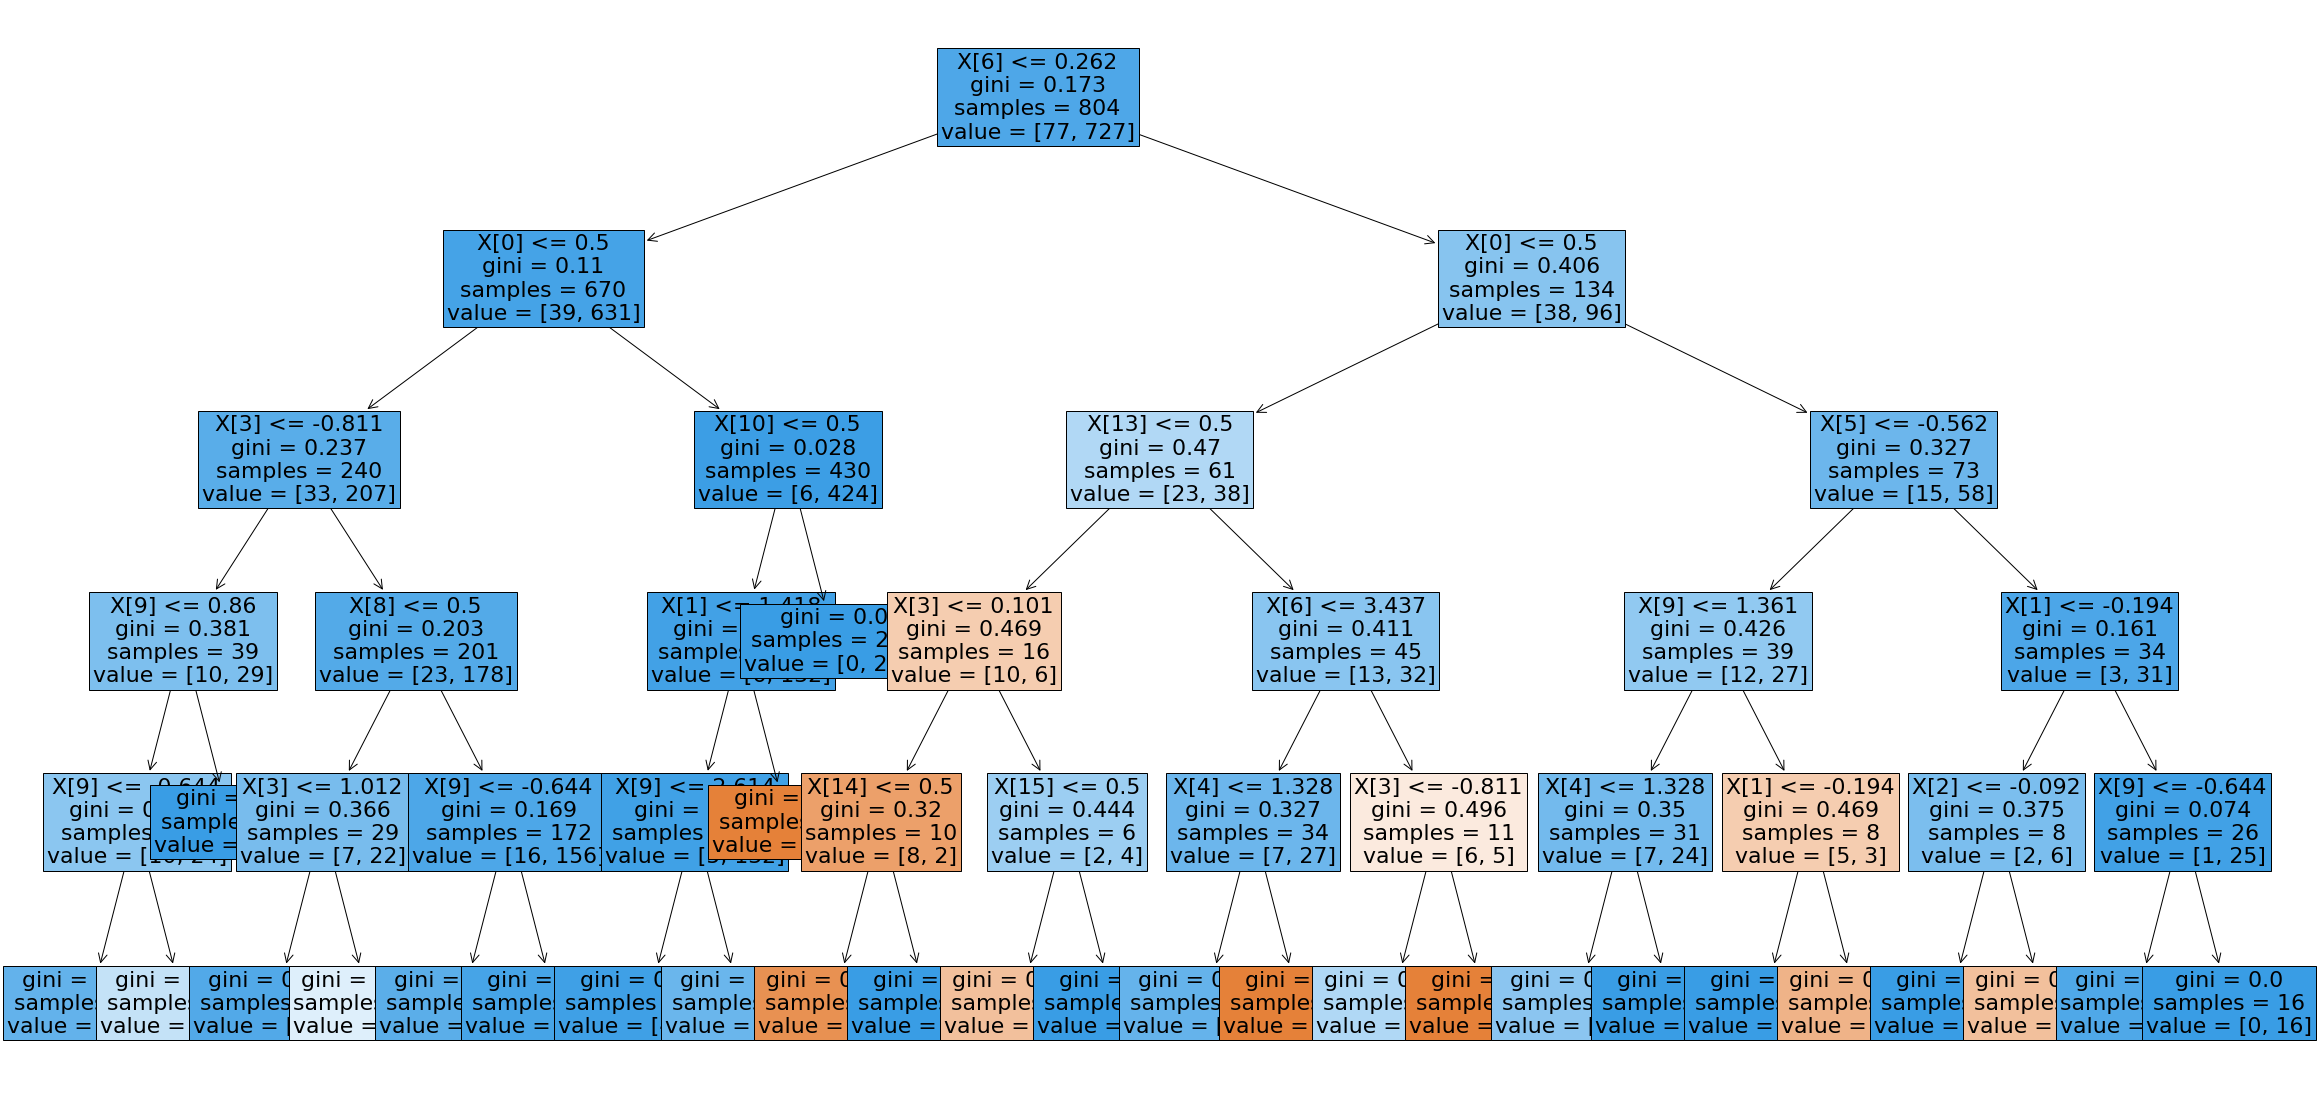

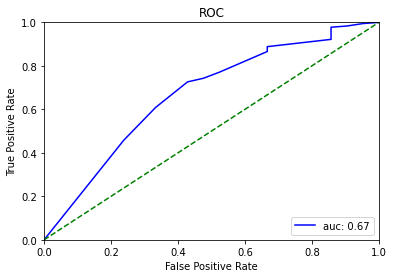

In [258]:
binaryDTC(data.drop(columns='G1'), binG3, 5)

Для количество оценок < 8 для каждого предмета

In [268]:
data[data.index.isin(G3[G3 < 8].index)].groupby('Subject')['Subject'].count()

Subject
0    70
1    28
Name: Subject, dtype: int64

Сравнивая деревья на каждой итерации kfold можно сделать вывод, что основным разделяющим фактором являются количество провалов на прошлых эказменах, а 2 по значимости - предмет. Это очевидно, так как количество неудовлетворительных оценок математиков почти в 2.5 раза больше чем у изучающих португальский язык

##### Выводы бинарной классификации :  Все методы показали, что данные могут быть классифицированы с высокой точностью. Однако фактически это достигается из-за значительного перевеса положительных оценок над отрицательными, а не из за предсказаний  модели, которые улучшают 'dummy prediction' максимум на 2 %.

### Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

In [269]:
def transformTo5scoreSystem(mark):
    if mark >= 18:
        return 5
    elif mark >= 14:
        return 4
    elif mark >= 8:
        return 3
    else:
        return 2

In [270]:
fiveG3 = G3.apply(transformTo5scoreSystem)

In [303]:
def logistic_regression_multiclass(df, var, num_shuffles):
    fig, ax = plt.subplots(int(num_shuffles/2), 2, figsize=(20, 10))
    
    for i in range (num_shuffles):       
        x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)
        
        model = LogisticRegression()
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        display(pd.DataFrame(confusion_matrix(y_test, y_predicted)))
        print(classification_report(y_test, y_predicted))
        prob = model.predict_proba(x_test)
        distplot(prob[y_test == 3], hist=False, rug=False, label='2', ax = ax[int(i/2),i%2])
        distplot(prob[y_test == 3], hist=False, rug=False, label='3', ax = ax[int(i/2),i%2])
        distplot(prob[y_test == 4], hist=False, rug=False, label='4', ax = ax[int(i/2),i%2])
        distplot(prob[y_test == 5], hist=False, rug=False, label='5', ax = ax[int(i/2),i%2])

0    1   2  3
0  4   39   0  0
1  0  156  13  0
2  0   65  13  0
3  0   10   2  0

              precision    recall  f1-score   support

           2       1.00      0.09      0.17        43
           3       0.58      0.92      0.71       169
           4       0.46      0.17      0.25        78
           5       0.00      0.00      0.00        12

    accuracy                           0.57       302
   macro avg       0.51      0.30      0.28       302
weighted avg       0.59      0.57      0.49       302



0    1   2  3
0  2   28   1  0
1  4  168  21  0
2  1   49  21  0
3  0    5   2  0

              precision    recall  f1-score   support

           2       0.29      0.06      0.11        31
           3       0.67      0.87      0.76       193
           4       0.47      0.30      0.36        71
           5       0.00      0.00      0.00         7

    accuracy                           0.63       302
   macro avg       0.36      0.31      0.31       302
weighted avg       0.57      0.63      0.58       302



0    1   2  3
0  3   29   3  0
1  3  160  11  0
2  0   63  19  0
3  0    8   3  0

              precision    recall  f1-score   support

           2       0.50      0.09      0.15        35
           3       0.62      0.92      0.74       174
           4       0.53      0.23      0.32        82
           5       0.00      0.00      0.00        11

    accuracy                           0.60       302
   macro avg       0.41      0.31      0.30       302
weighted avg       0.56      0.60      0.53       302



0    1   2  3
0  2   27   3  0
1  9  159  30  1
2  0   45  16  0
3  0    6   4  0

              precision    recall  f1-score   support

           2       0.18      0.06      0.09        32
           3       0.67      0.80      0.73       199
           4       0.30      0.26      0.28        61
           5       0.00      0.00      0.00        10

    accuracy                           0.59       302
   macro avg       0.29      0.28      0.28       302
weighted avg       0.52      0.59      0.55       302



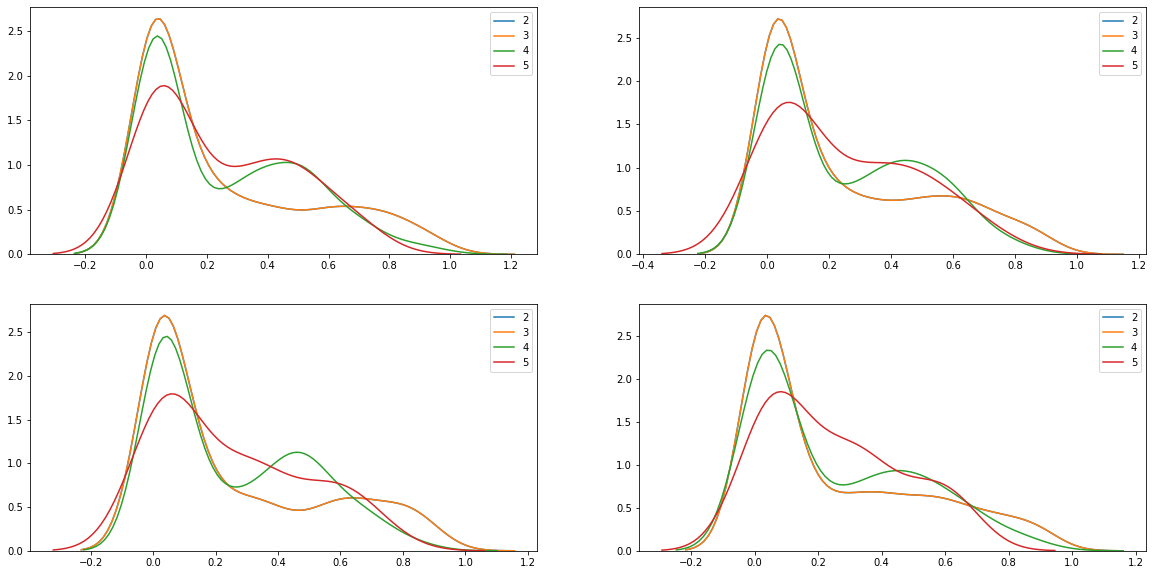

In [304]:
logistic_regression_multiclass(data.drop(columns='G1'),fiveG3, 4)

In [452]:
from collections import defaultdict
def DTC_multiclass(df, var, num_shuffles):
    kf = KFold(n_splits=num_shuffles, shuffle=True)
    
    reports = defaultdict(list)
    model = None
    for depth in range (2, 20, 2):
        for train_index, test_index in kf.split(df):
            x_train, x_test = df.iloc[train_index], df.iloc[test_index]
            y_train, y_test = var.iloc[train_index], var.iloc[test_index]
            model = DecisionTreeClassifier(max_depth = depth, min_samples_split = 10)
            model.fit(x_train, y_train)
            y_predicted = model.predict(x_test)
            cr = classification_report(y_test, y_predicted, output_dict = True)
            reports[depth].append(cr)
        
        if depth < 7:      
            f = plt.figure(figsize=(40,20))    
            plot_tree(model, filled=True, fontsize=16, proportion = True)
            plt.show()
        
    for depth, observations in reports.items():
        print("depth:", depth)
        
        df = pd.DataFrame(0.0, columns=['precision', 'recall', 'f1-score','support'], index=['2','3','4','5','macro avg','weighted avg'])
        for scorelists in observations:
            for score, info in scorelists.items():
                if isinstance(info, float):
                    continue
                    
                for prop, value in info.items():
                    df.loc[score, prop] += value
        display(df / len(observations))
        

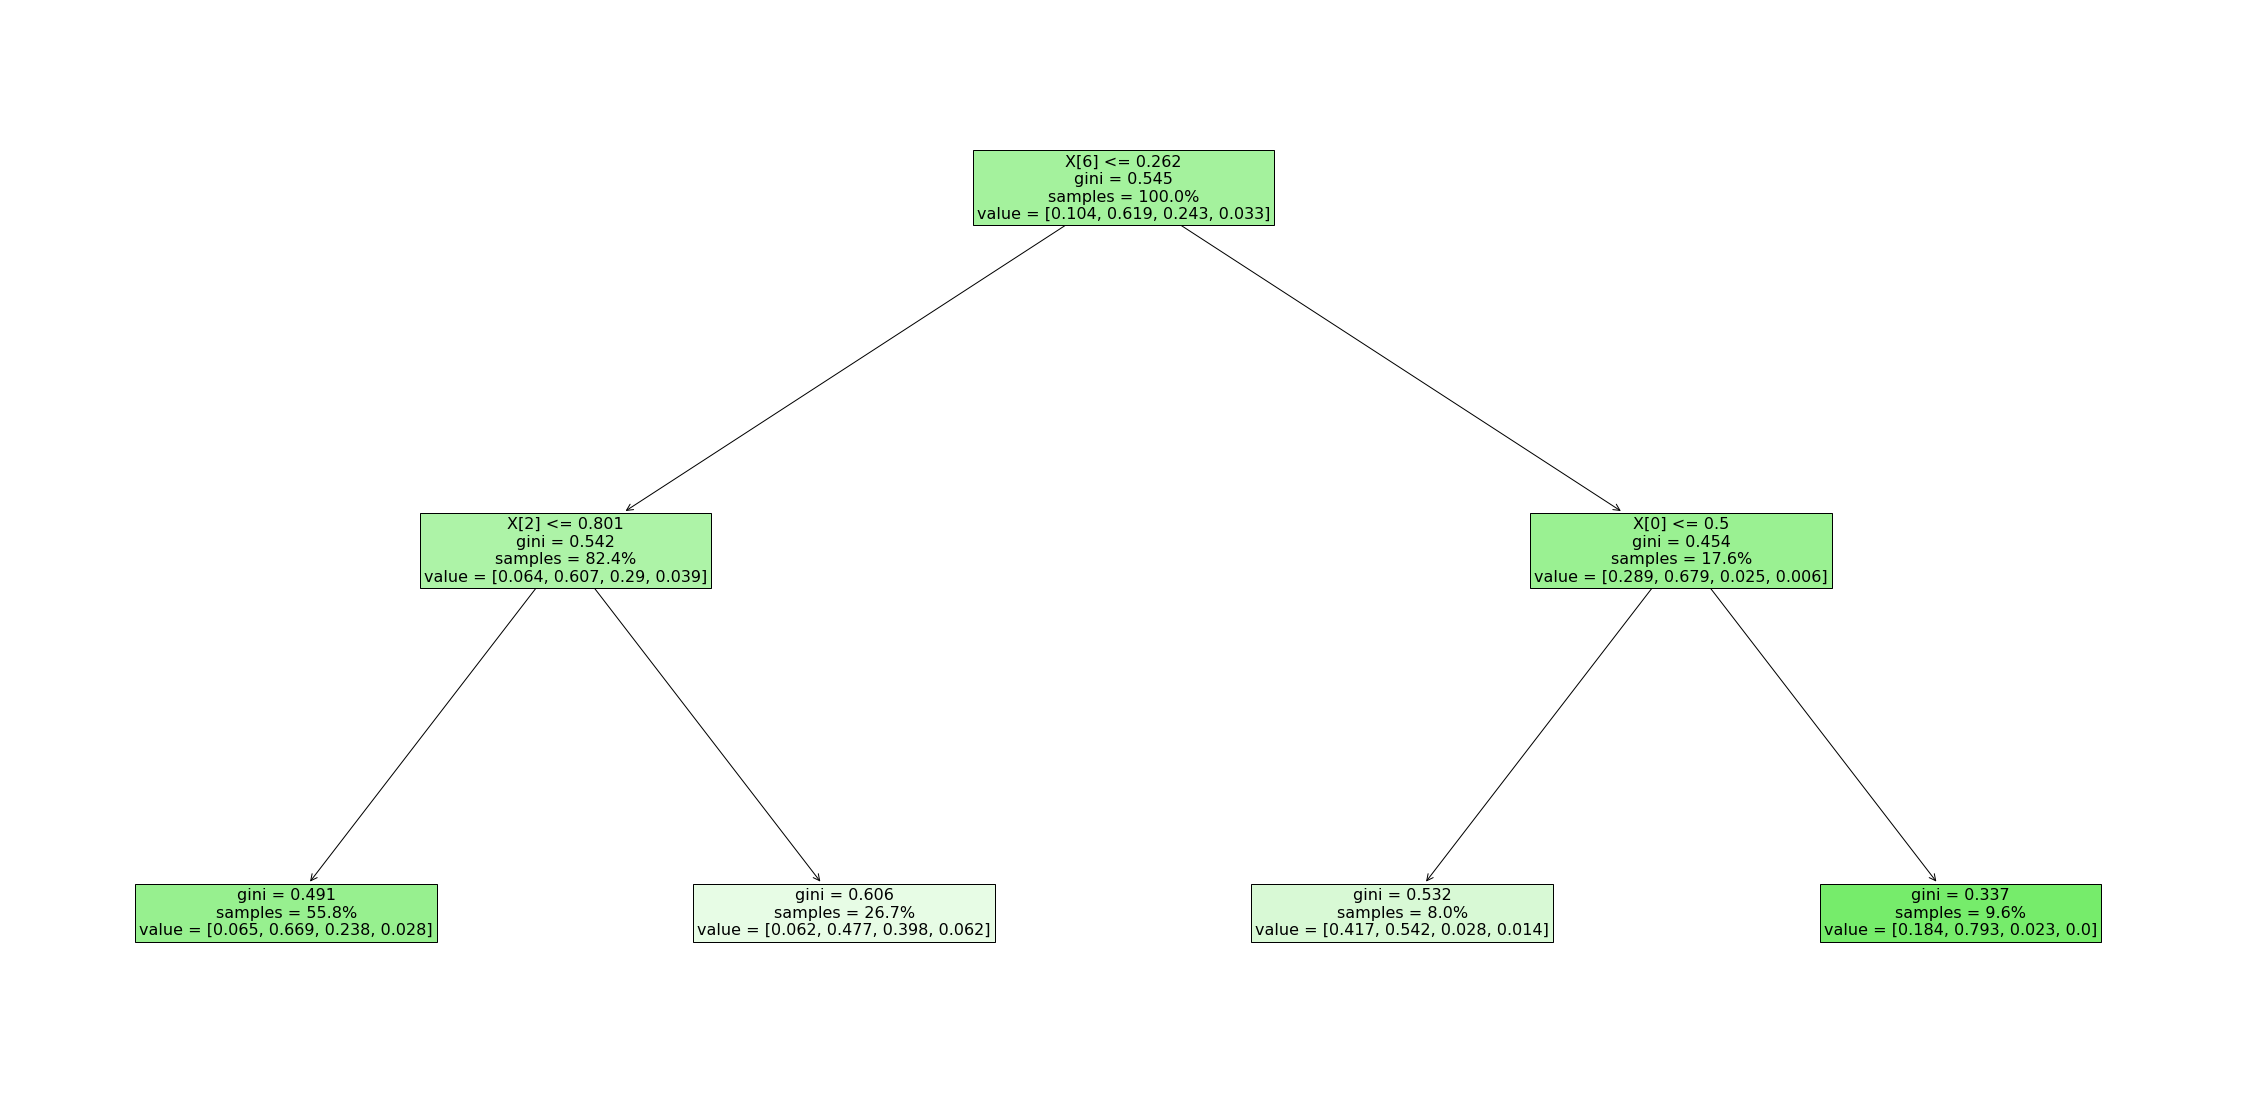

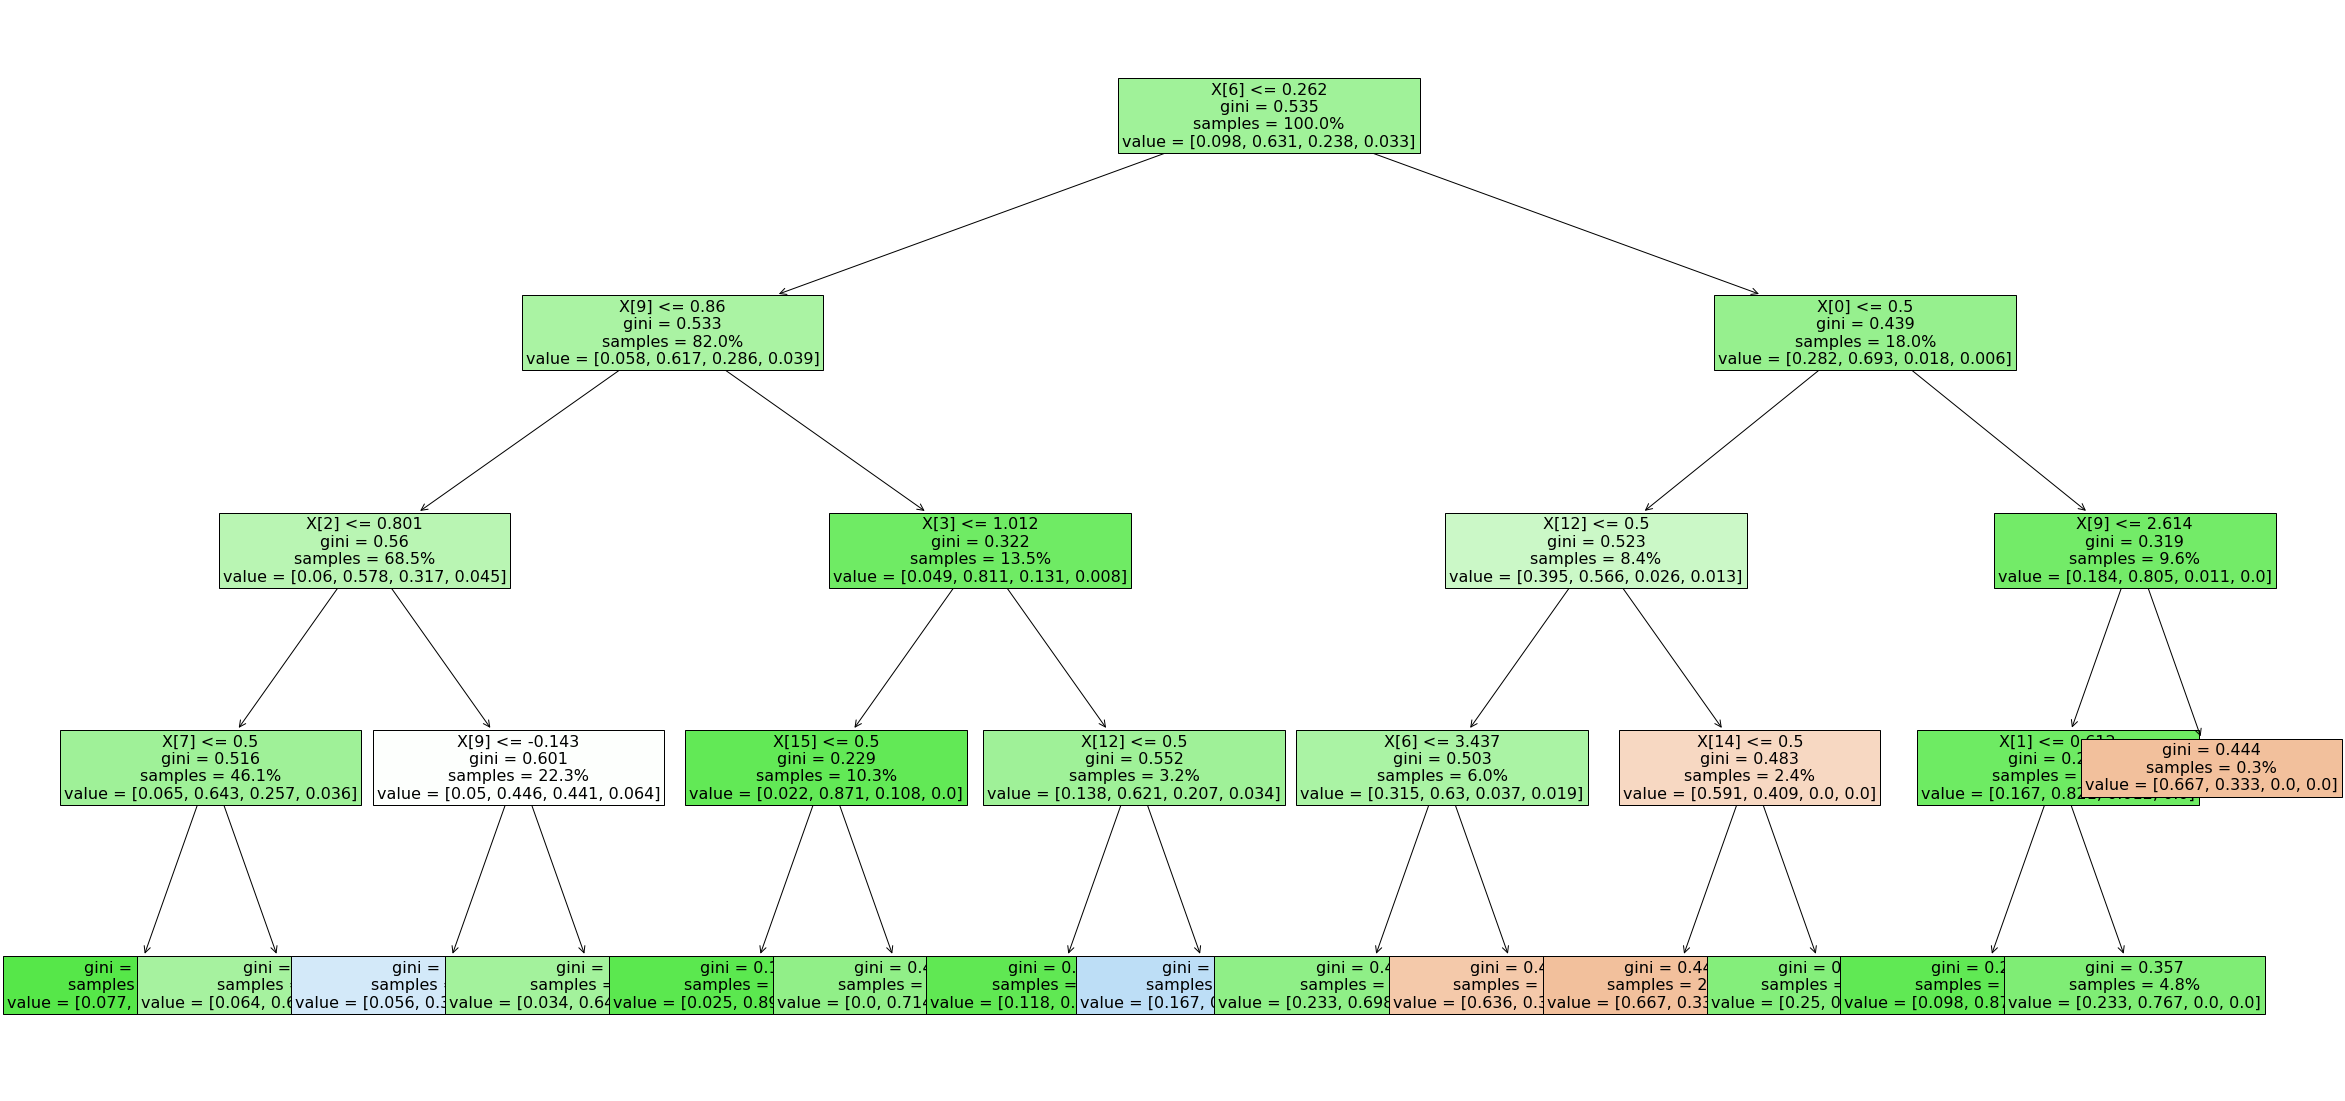

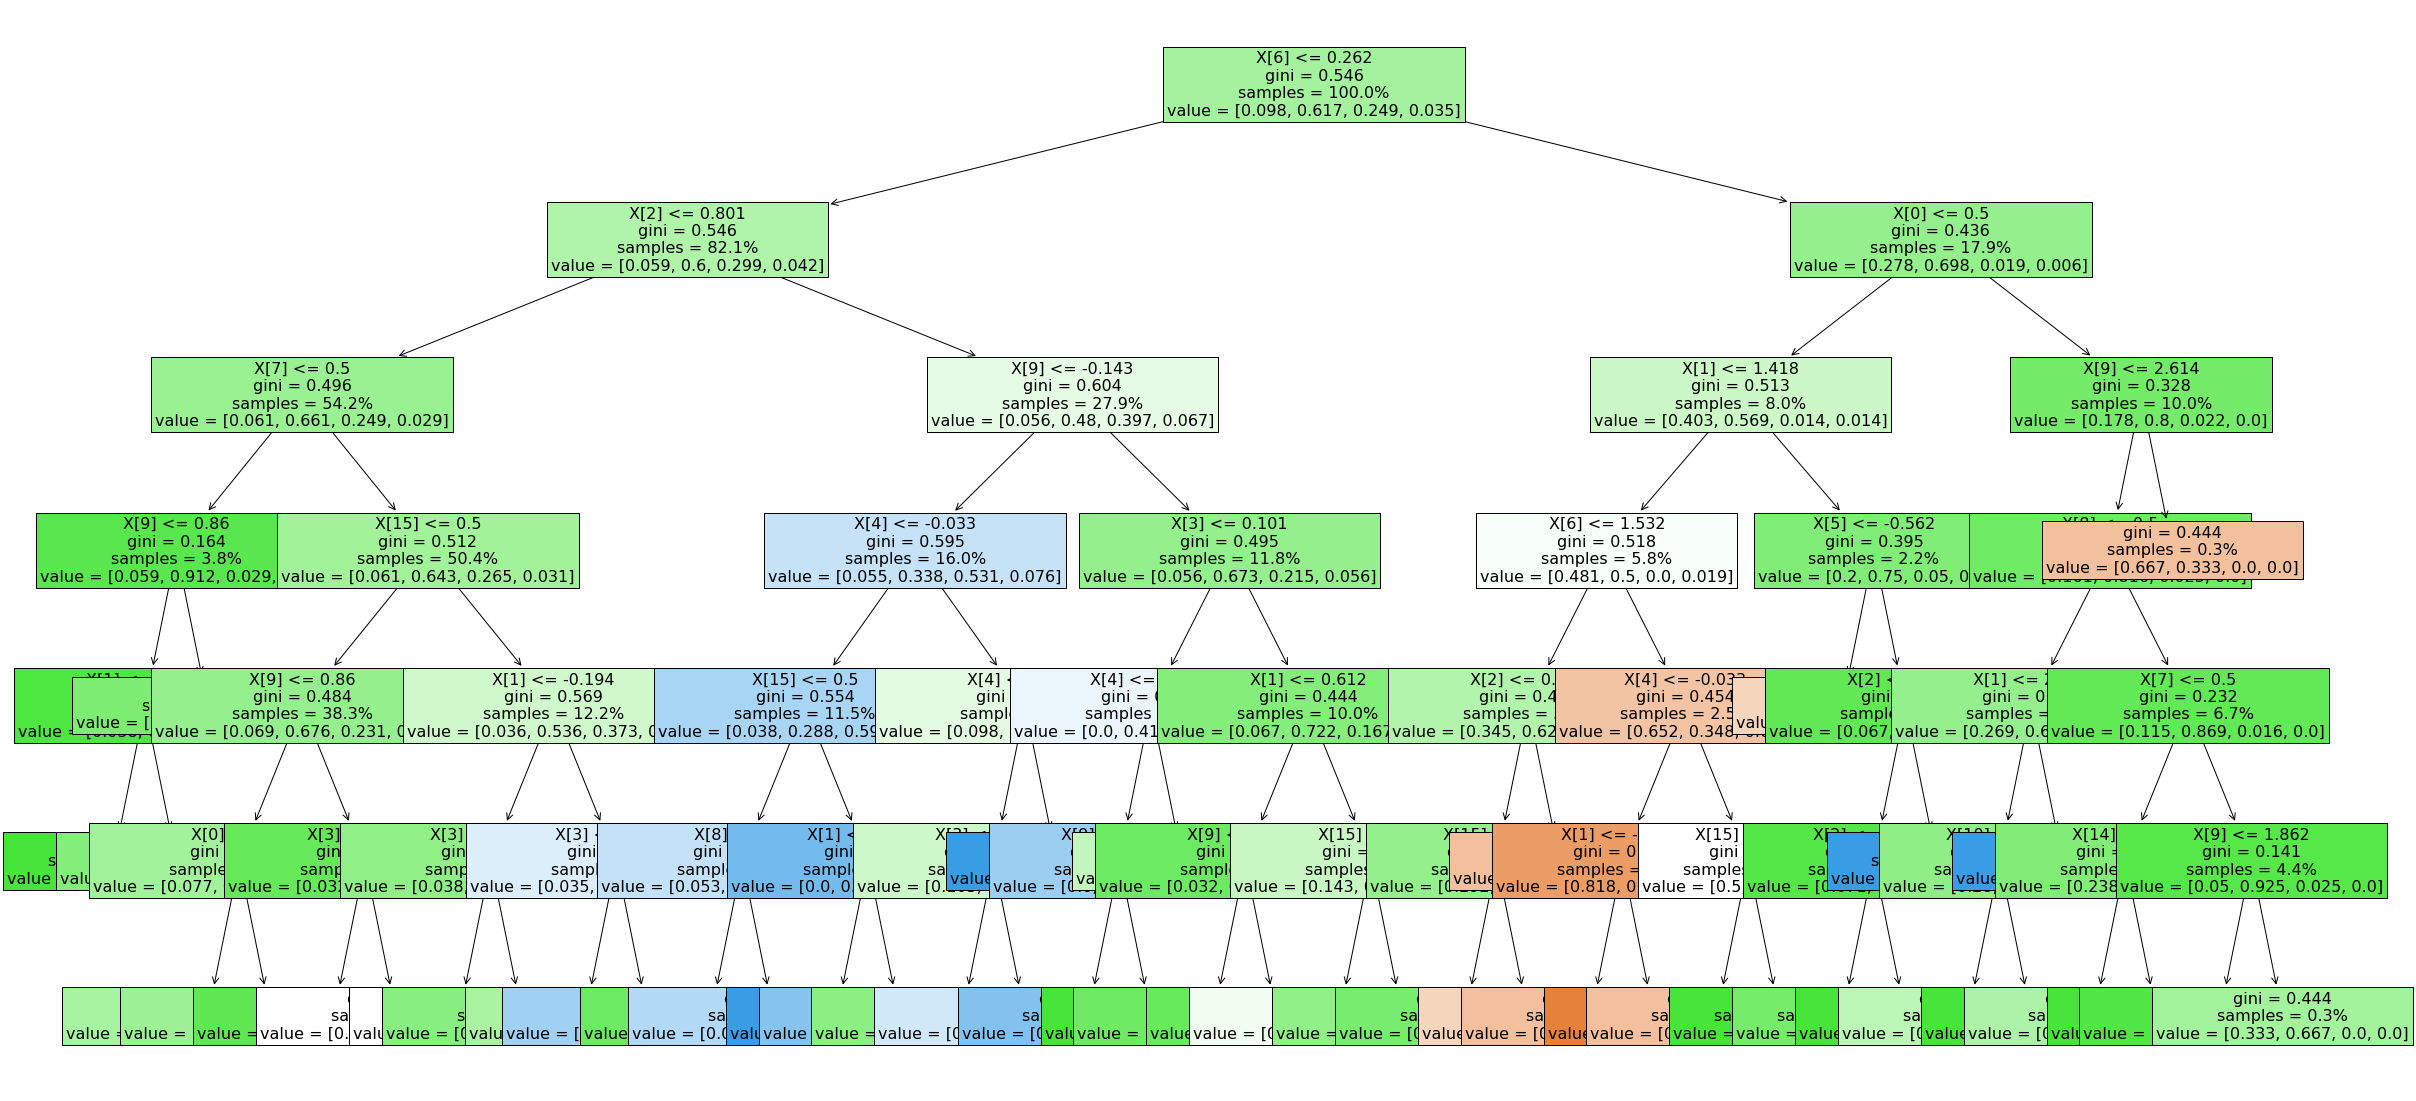

depth: 2


precision    recall  f1-score  support
2              0.000000  0.000000  0.000000      9.8
3              0.622347  1.000000  0.765847     62.5
4              0.000000  0.000000  0.000000     24.8
5              0.000000  0.000000  0.000000      3.3
macro avg      0.160420  0.258333  0.197580    100.4
weighted avg   0.390164  0.622347  0.478846    100.4

depth: 4


precision    recall  f1-score  support
2              0.278571  0.082427  0.124293      9.8
3              0.664264  0.865088  0.750721     62.5
4              0.506795  0.323301  0.386843     24.8
5              0.000000  0.000000  0.000000      3.3
macro avg      0.362408  0.317704  0.315464    100.4
weighted avg   0.573665  0.625327  0.576412    100.4

depth: 6


precision    recall  f1-score  support
2              0.211410  0.105587  0.134894      9.8
3              0.665791  0.824211  0.735791     62.5
4              0.521557  0.357666  0.421879     24.8
5              0.000000  0.000000  0.000000      3.3
macro avg      0.349689  0.321866  0.323141    100.4
weighted avg   0.568216  0.613594  0.578590    100.4

depth: 8


precision    recall  f1-score  support
2              0.229286  0.172364  0.191856      9.8
3              0.664926  0.783517  0.717311     62.5
4              0.523966  0.350312  0.406638     24.8
5              0.100000  0.033333  0.050000      3.3
macro avg      0.379544  0.334882  0.341451    100.4
weighted avg   0.577820  0.591723  0.570358    100.4

depth: 10


precision    recall  f1-score  support
2              0.212619  0.189762  0.190971      9.8
3              0.671672  0.771156  0.716196     62.5
4              0.465845  0.359550  0.398023     24.8
5              0.100000  0.025000  0.040000      3.3
macro avg      0.362534  0.336367  0.336298    100.4
weighted avg   0.562592  0.586683  0.565817    100.4

depth: 12


precision    recall  f1-score  support
2              0.208507  0.194574  0.193117      9.8
3              0.666524  0.727118  0.694662     62.5
4              0.460938  0.415289  0.432318     24.8
5              0.250000  0.066667  0.105000      3.3
macro avg      0.396492  0.350912  0.356274    100.4
weighted avg   0.563890  0.577634  0.564849    100.4

depth: 14


precision    recall  f1-score  support
2              0.158920  0.212527  0.166339      9.8
3              0.659561  0.717388  0.685358     62.5
4              0.462814  0.382636  0.404040     24.8
5              0.000000  0.000000  0.000000      3.3
macro avg      0.320324  0.328138  0.313934    100.4
weighted avg   0.549229  0.555772  0.543598    100.4

depth: 16


precision    recall  f1-score  support
2              0.213116  0.234243  0.205651      9.8
3              0.674771  0.726164  0.697967     62.5
4              0.438178  0.368006  0.394629     24.8
5              0.100000  0.011111  0.020000      3.3
macro avg      0.369044  0.346131  0.340976    100.4
weighted avg   0.565820  0.565802  0.557313    100.4

depth: 18


precision    recall  f1-score  support
2              0.167500  0.170819  0.161552      9.8
3              0.665104  0.714448  0.687257     62.5
4              0.493227  0.432840  0.454388     24.8
5              0.166667  0.103571  0.120794      3.3
macro avg      0.382835  0.365046  0.365633    100.4
weighted avg   0.568481  0.571683  0.564276    100.4

In [453]:
DTC_multiclass(data.drop(columns='G1'), fiveG3, 10)

Анализ показал, что с увеличением глубины дерева, начиная с 4 падает общая точность прогнозирования, однако увеличивается точность предсказаний малочисленных оценок, таких как 5 и 2.

In [470]:
def KNN_multiclass(df, var, num_shuffles):
    x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)
    kf = KFold(n_splits=5, shuffle=True)
    gsv = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1, 50, 1)} , cv=kf, scoring='f1_weighted')
    gsv.fit(df, var)
    
    model = KNeighborsClassifier(n_neighbors=gsv.best_params_.get("n_neighbors"))
    
    model.fit(x_train, y_train)
    
    y_predicted = model.predict(x_test)

    display(pd.DataFrame(confusion_matrix(y_test, y_predicted)))
    print(classification_report(y_test, y_predicted))
    
    

In [471]:
KNN_multiclass(data.drop(columns='G1'), fiveG3, 10)

0    1   2  3
0  2   29   1  0
1  2  166  16  0
2  0   52  26  0
3  0    6   2  0

              precision    recall  f1-score   support

           2       0.50      0.06      0.11        32
           3       0.66      0.90      0.76       184
           4       0.58      0.33      0.42        78
           5       0.00      0.00      0.00         8

    accuracy                           0.64       302
   macro avg       0.43      0.32      0.32       302
weighted avg       0.60      0.64      0.58       302



In [480]:
def RNN_multiclass(df, var, num_shuffles):
    x_train, x_test, y_train, y_test = train_test_split(df, var, test_size=0.3, shuffle = True)
    
    kf = KFold(n_splits=num_shuffles, shuffle=True)
    gsv = GridSearchCV(RadiusNeighborsClassifier(), {'radius': np.arange(40, 100, 1)/10} , cv=kf, scoring='f1_weighted')
    gsv.fit(x_train, y_train)
    
    print(gsv.best_params_.get("radius"))
    model = RadiusNeighborsClassifier(radius=gsv.best_params_.get("radius"))
    
    model.fit(x_train, y_train)

    y_predicted = model.predict(x_test)

    display(pd.DataFrame(confusion_matrix(y_test, y_predicted)))
    print(classification_report(y_test, y_predicted))

In [481]:
RNN_multiclass(data.drop(columns='G1'), fiveG3, 10)

4.1


0    1  2  3
0  2   33  0  0
1  2  189  0  0
2  0   69  0  0
3  0    7  0  0

              precision    recall  f1-score   support

           2       0.50      0.06      0.10        35
           3       0.63      0.99      0.77       191
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00         7

    accuracy                           0.63       302
   macro avg       0.28      0.26      0.22       302
weighted avg       0.46      0.63      0.50       302



## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.